<h4>Criação de Modelo como parte da avaliação do curso da Formação Cientista de Dados da Data Science Academy
Prevendo o Nível de Satisfação dos Clientes do Santander 
Fonte dos dados: https://www.kaggle.com/c/santander-customer-satisfaction/data

In [1]:
#Importação do pandas e bibliotecas de visualização para analise e exploração de dados
from pandas import read_csv, concat
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Fazendo a leitura e carregamento dos dados e verificando suas dimenões 
dados_treino = read_csv('santander-customer-satisfaction/train.csv')
#dados_teste = read_csv('santander-customer-satisfaction/test.csv')
#print('Dimensões dados de treino (linhas, colunas):', dados_treino.shape, '\nDimensões dados de teste (linhas, colunas):',  dados_teste.shape)
print('Dimensões dados de treino (linhas, colunas):', dados_treino.shape)

Dimensões dados de treino (linhas, colunas): (76020, 371)


In [3]:
#Conhecendo a estrutura dos dados
dados_treino.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [4]:
#Tipos dos dados
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
#Função para remover coluna
def removeVariavel(df, cols):
    return df.drop(cols, axis=1)

In [6]:
#Removendo a coluna ID para não ocasionar overfitting
dados_treino = removeVariavel(dados_treino, 'ID')

In [7]:
dados_treino.shape

(76020, 370)

In [8]:
#Listando as colunas do dataset
dados_treino.columns.values

array(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3',
       'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3',
       'imp_op_var41_ult1', 'imp_op_var39_efect_ult1',
       'imp_op_var39_efect_ult3', 'imp_op_var39_ult1',
       'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0',
       'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6',
       'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12',
       'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto',
       'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0',
       'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14',
       'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18',
       'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var2

In [9]:
#Resumo de como os dados estão distribuídos
dados_treino.describe()

var3         var15  imp_ent_var16_ult1  \
count   76020.000000  76020.000000        76020.000000   
mean    -1523.199277     33.212865           86.208265   
std     39033.462364     12.956486         1614.757313   
min   -999999.000000      5.000000            0.000000   
25%         2.000000     23.000000            0.000000   
50%         2.000000     28.000000            0.000000   
75%         2.000000     40.000000            0.000000   
max       238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  \
count             76020.000000             76020.000000       76020.000000   
mean                  0.412946                 0.567352           3.160715   
std                  30.604864                36.513513          95.268204   
min                   0.000000                 0.000000           0.000000   
25%                   0.000000                 0.000000           0.000000   
50%                   0.000000                 0.000000           0.000000   
75%                   0.000000                 0.000000           0.000000   
max                6600.000000              6600.000000        8237.820000   

       ...  saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count  ...             76020.000000             76020.000000   
mean   ...                 7.935824                 1.365146   
std    ...               455.887218               113.959637   
min    ...                 0.000000                 0.000000   
25%    ...                 0.000000                 0.000000   
50%    ...                 0.000000                 0.000000   
75%    ...                 0.000000                 0.000000   
max    ...             50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000   

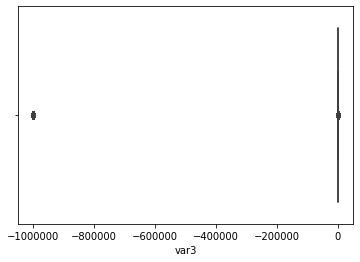

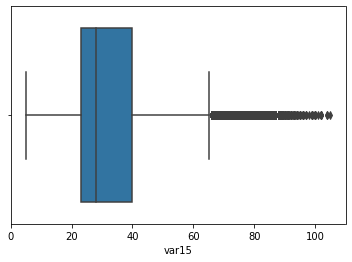

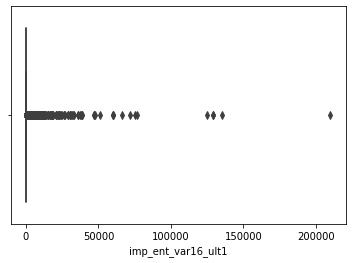

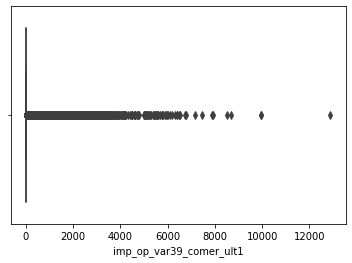

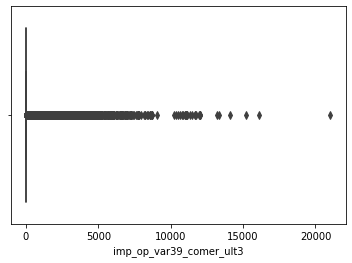

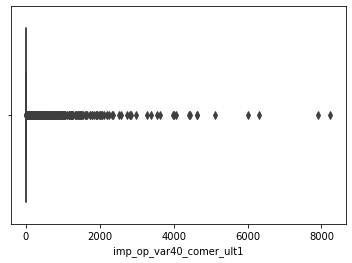

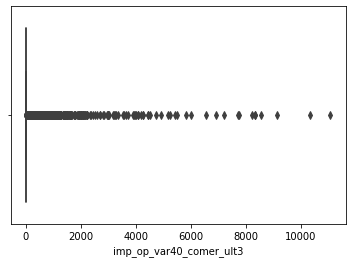

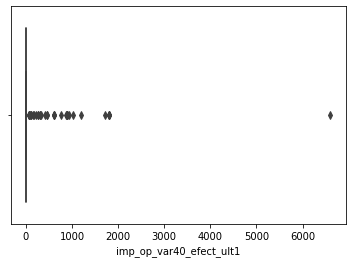

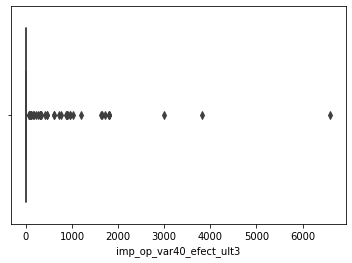

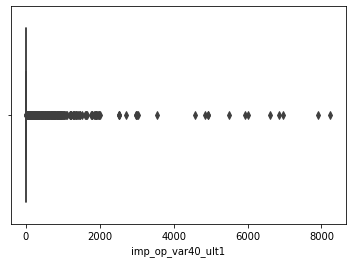

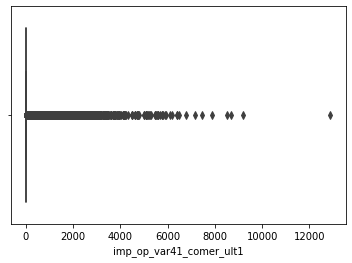

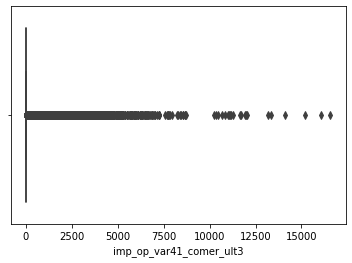

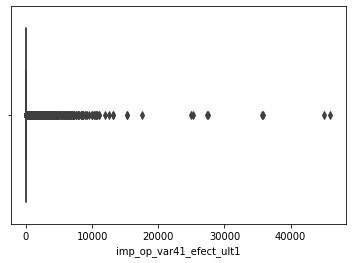

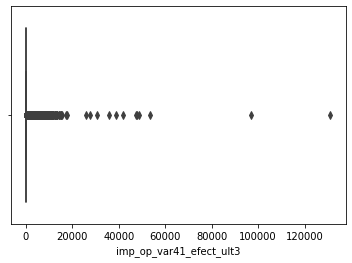

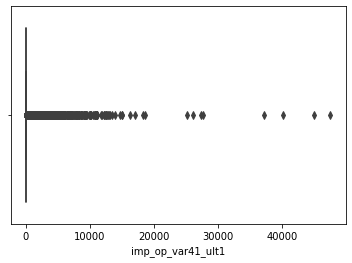

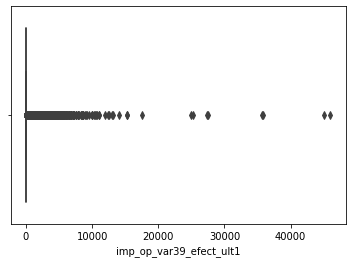

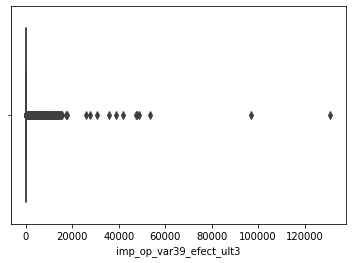

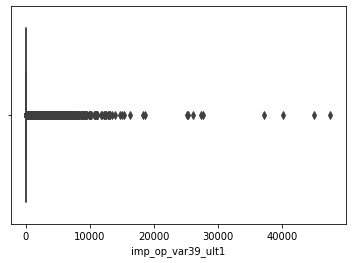

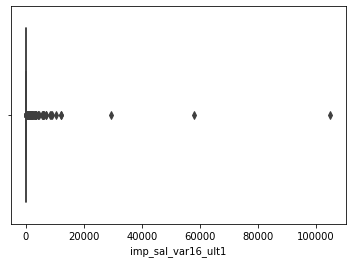

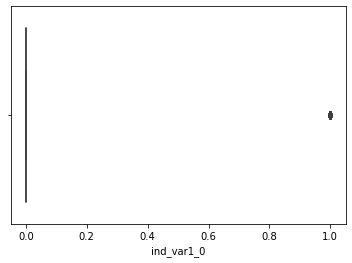

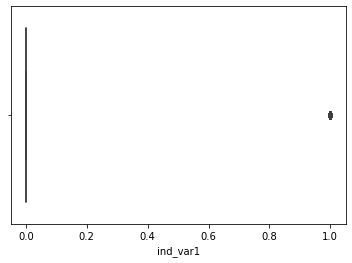

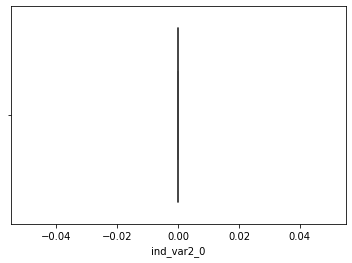

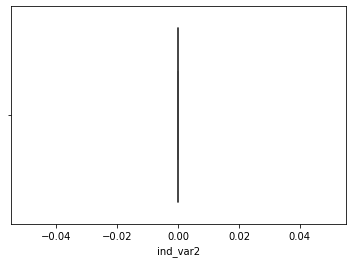

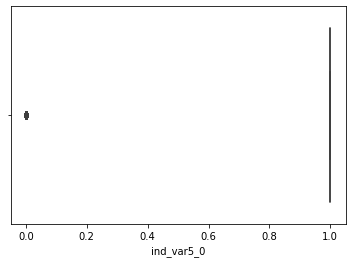

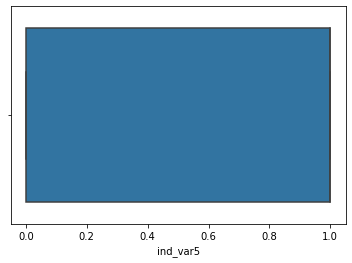

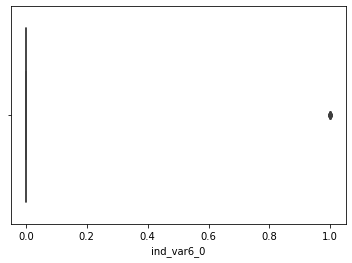

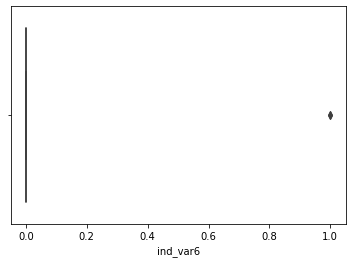

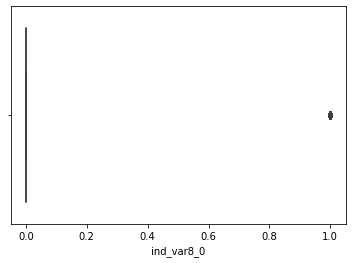

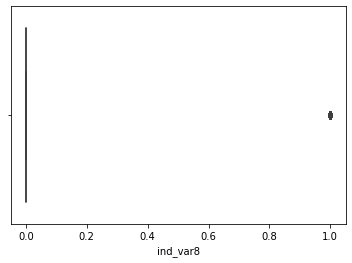

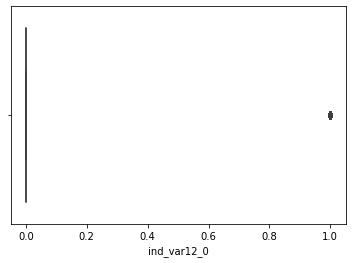

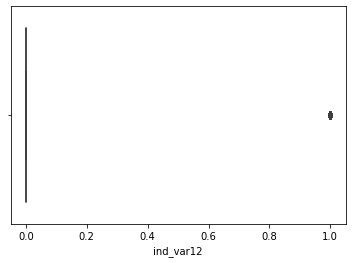

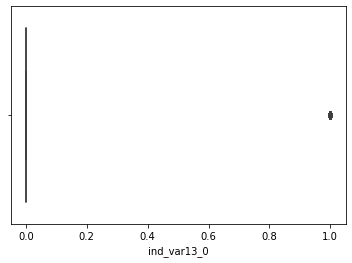

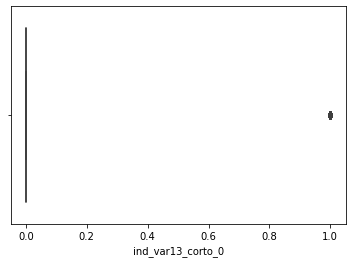

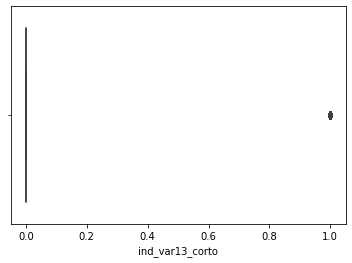

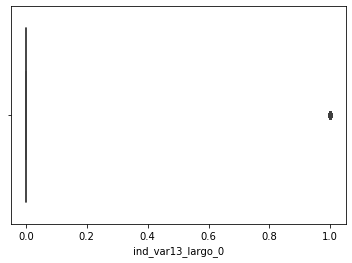

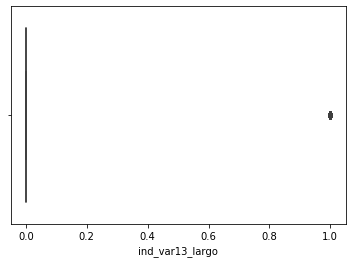

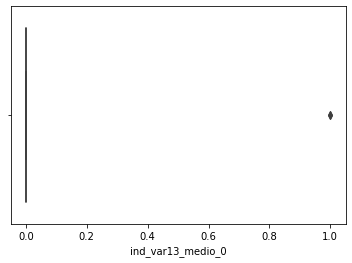

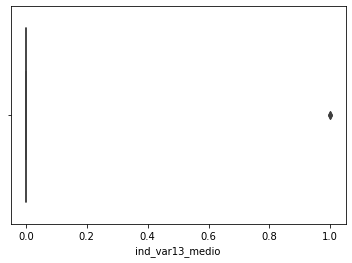

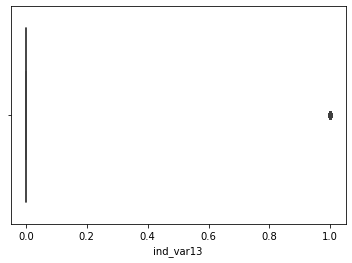

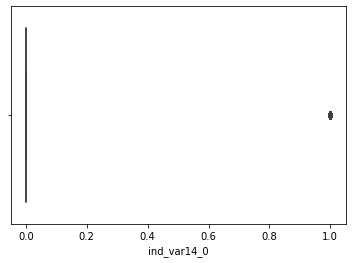

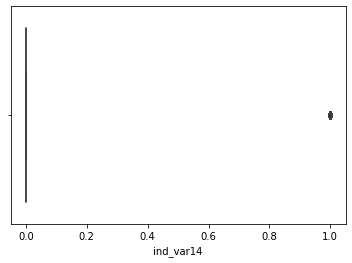

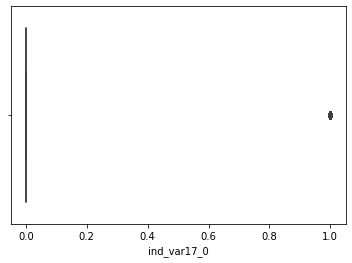

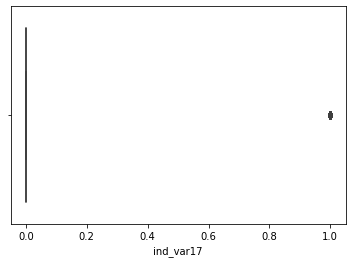

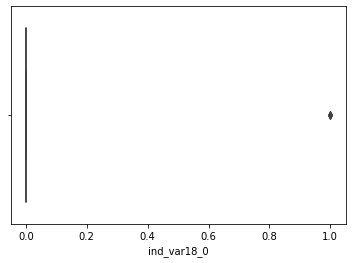

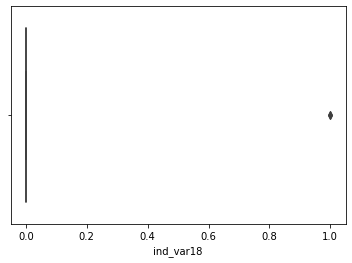

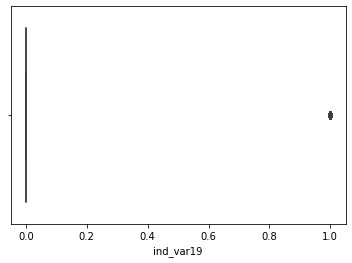

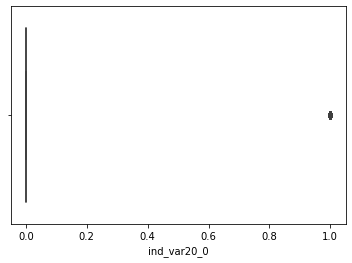

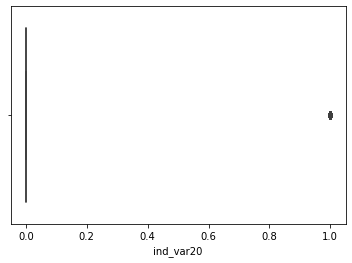

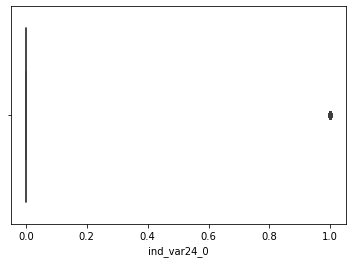

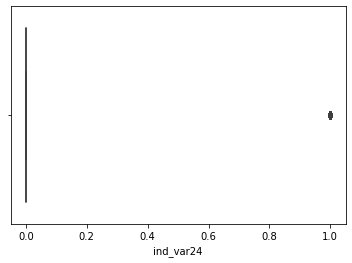

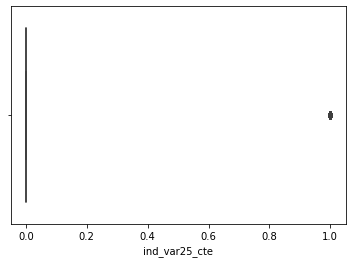

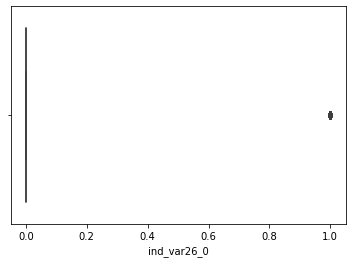

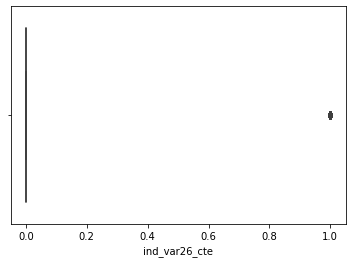

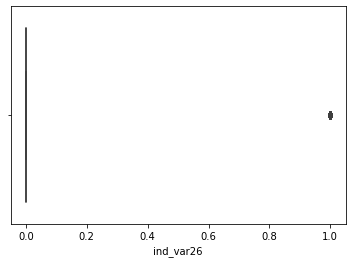

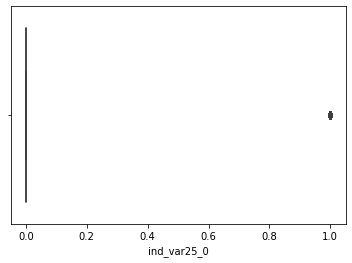

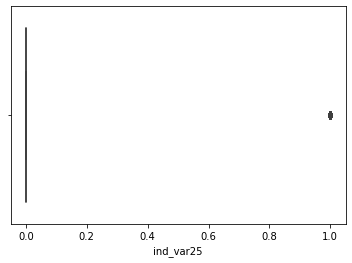

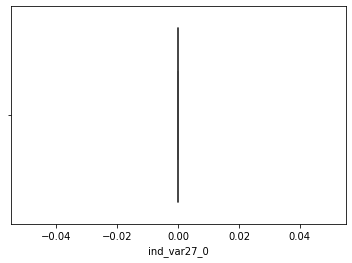

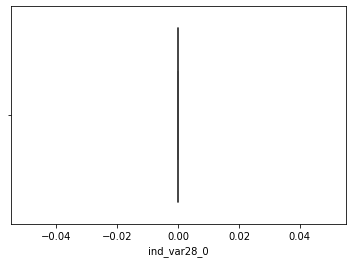

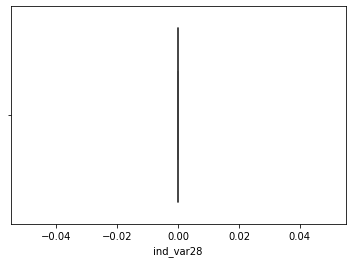

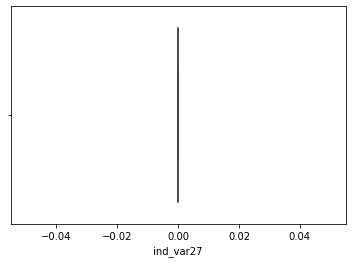

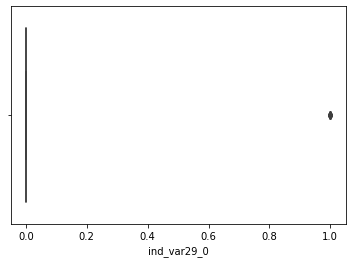

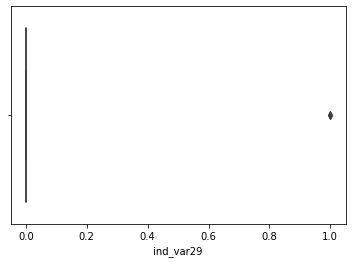

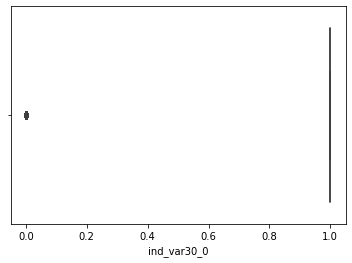

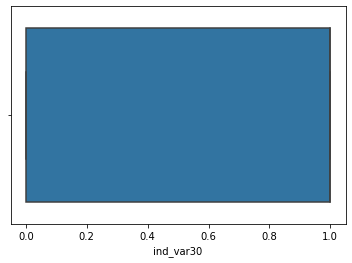

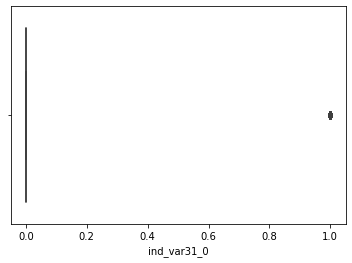

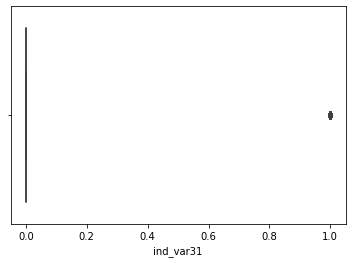

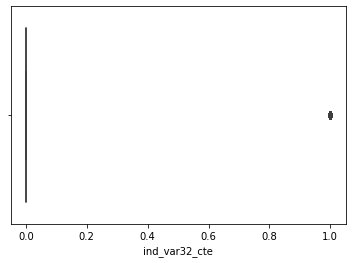

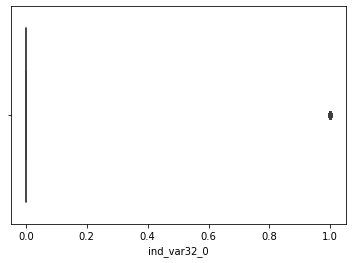

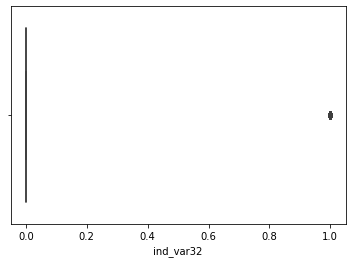

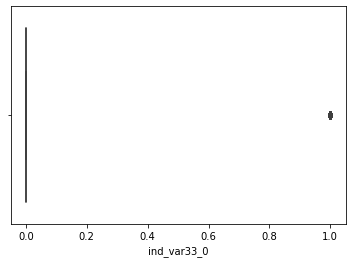

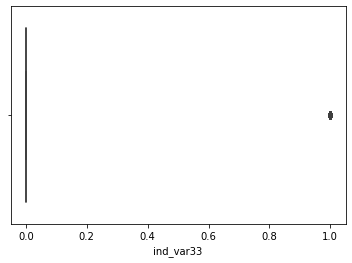

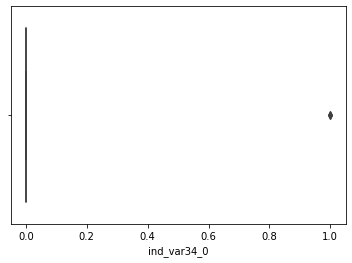

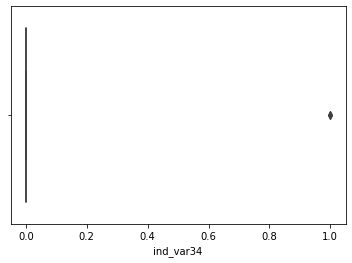

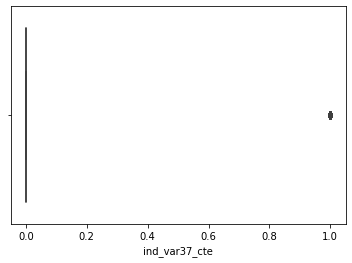

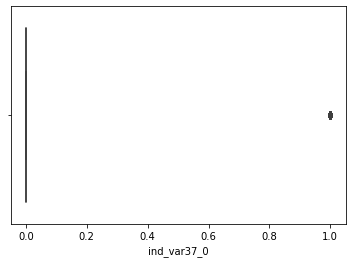

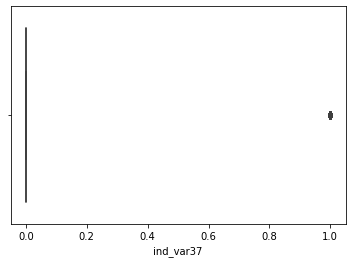

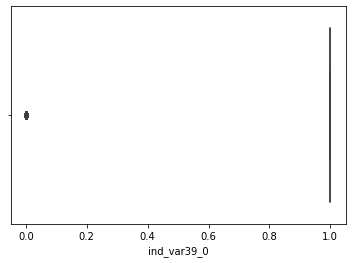

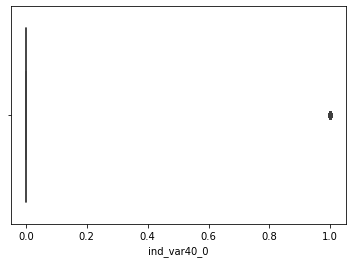

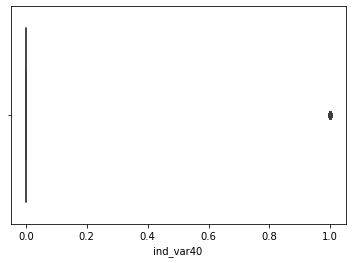

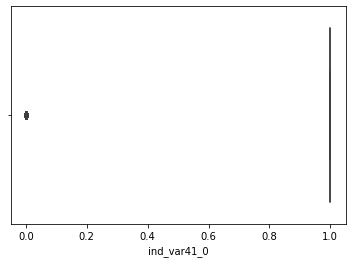

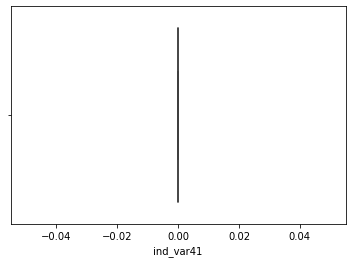

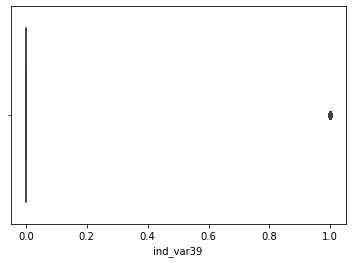

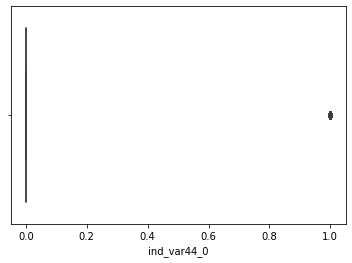

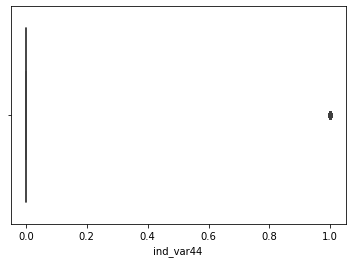

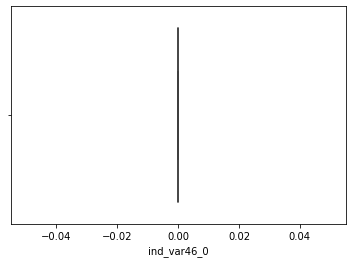

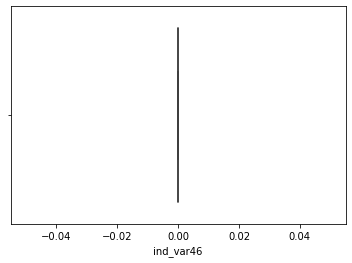

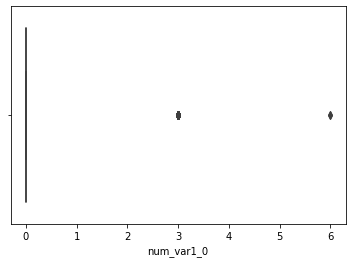

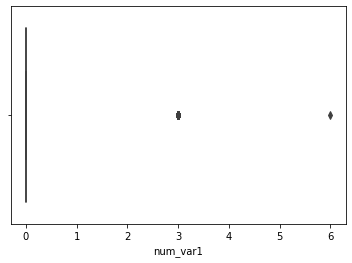

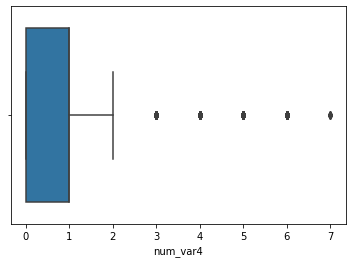

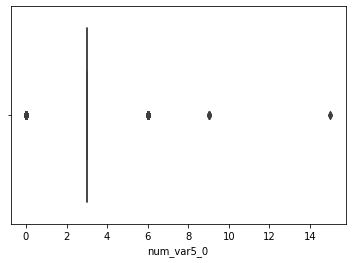

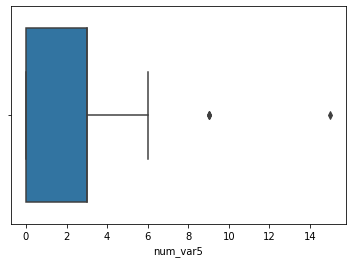

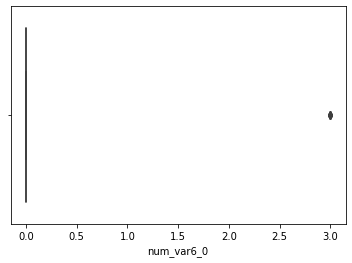

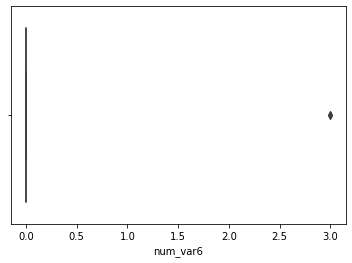

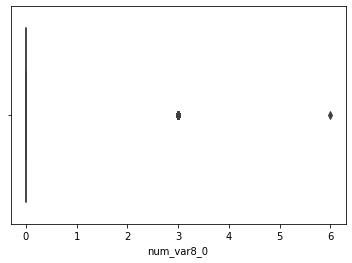

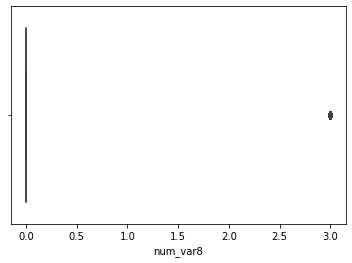

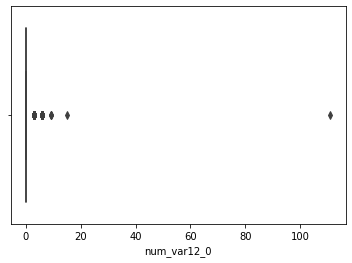

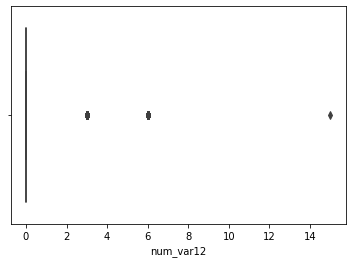

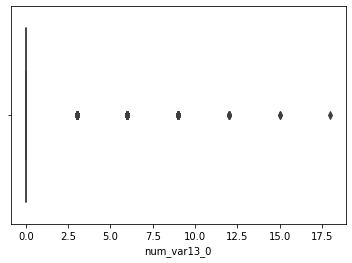

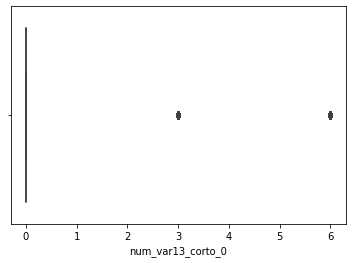

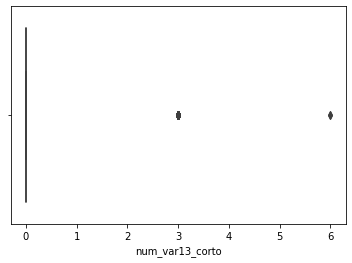

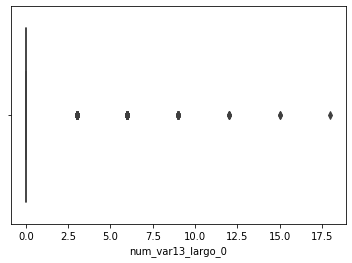

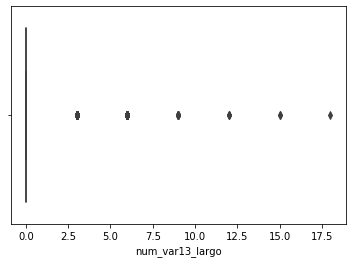

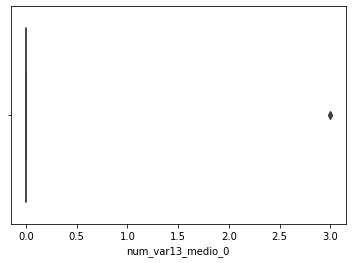

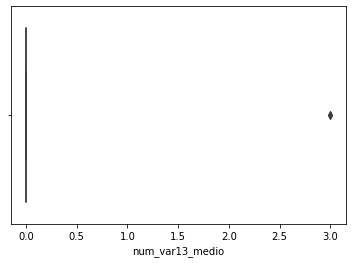

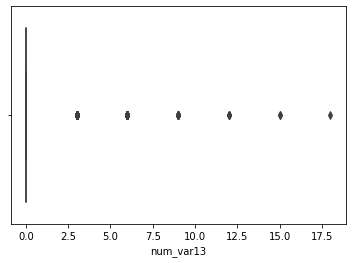

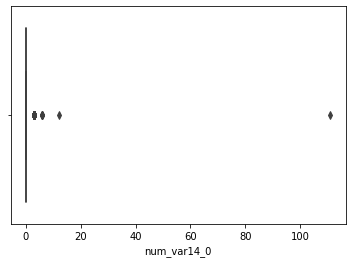

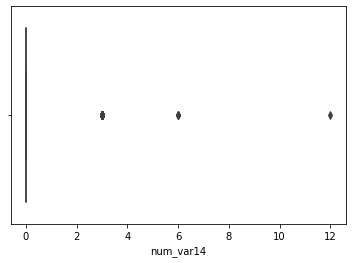

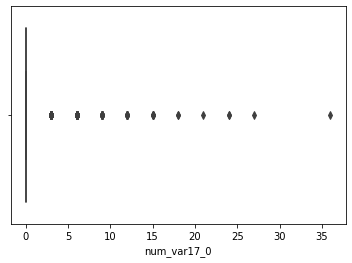

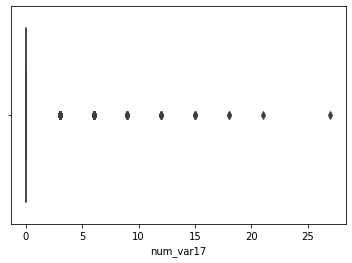

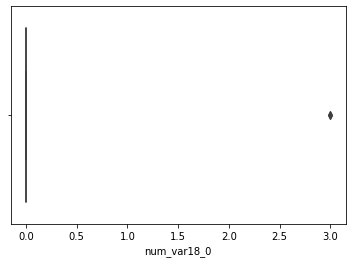

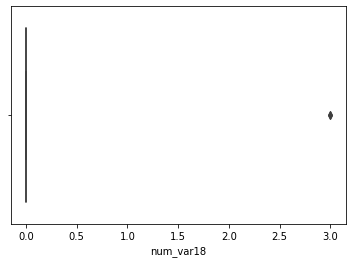

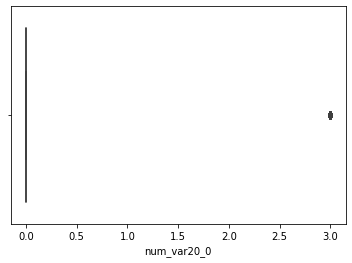

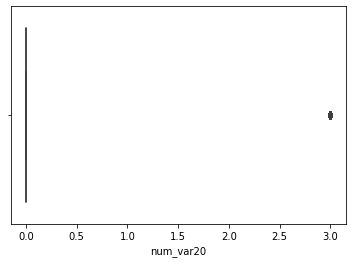

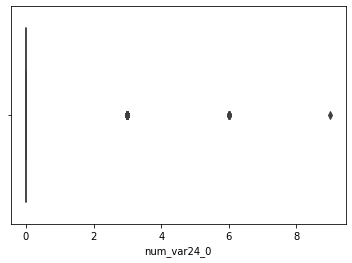

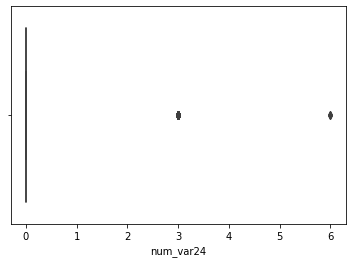

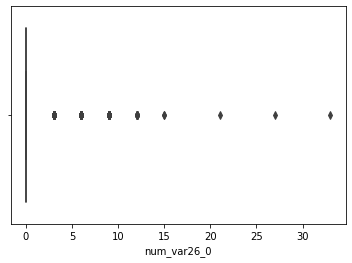

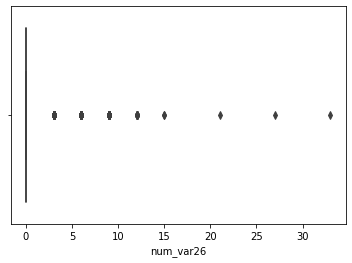

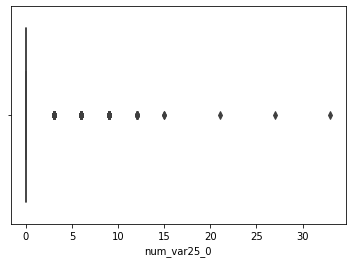

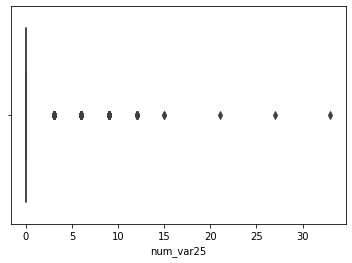

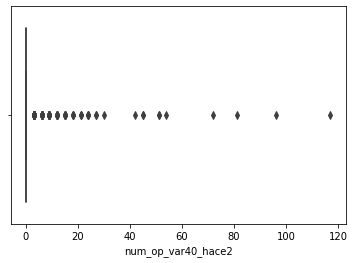

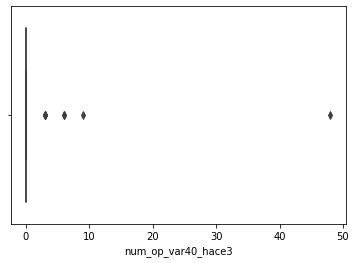

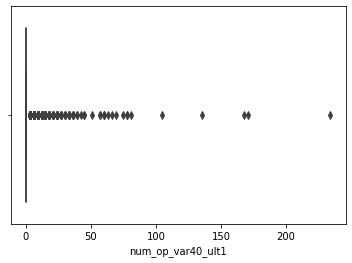

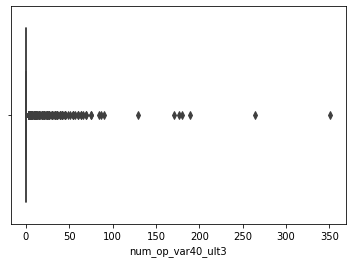

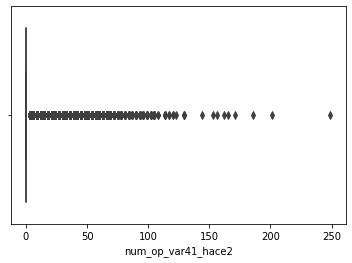

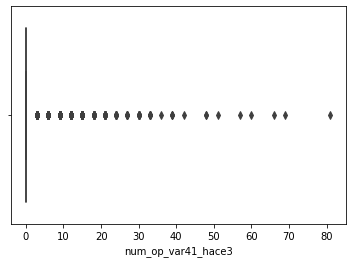

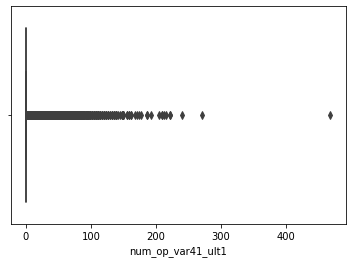

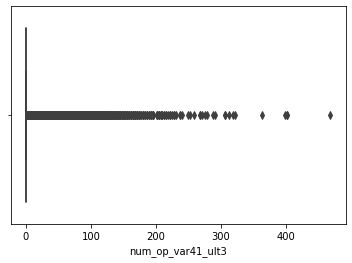

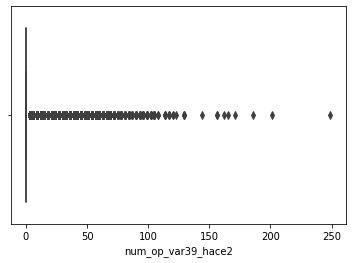

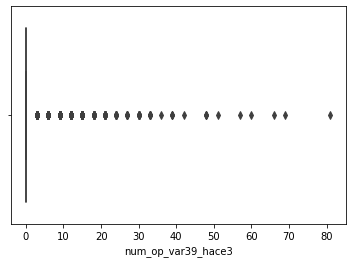

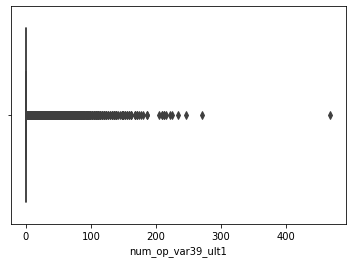

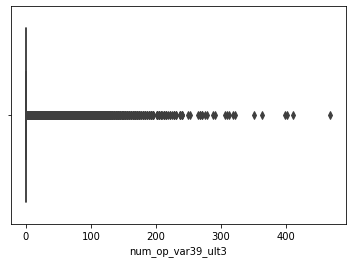

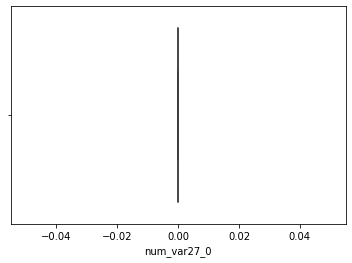

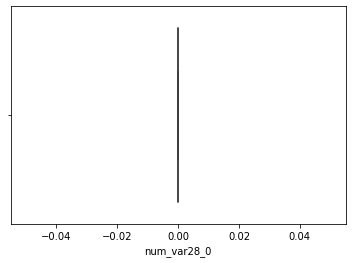

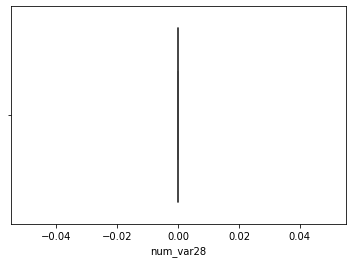

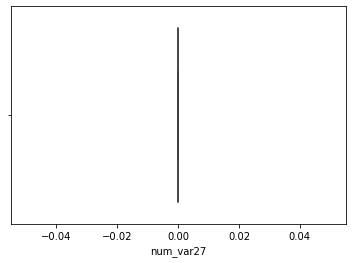

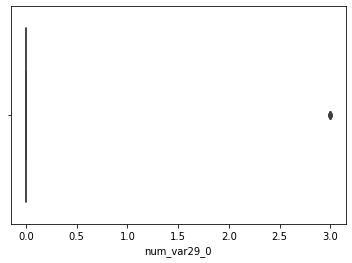

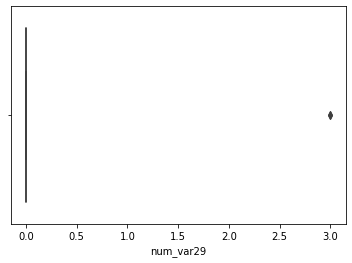

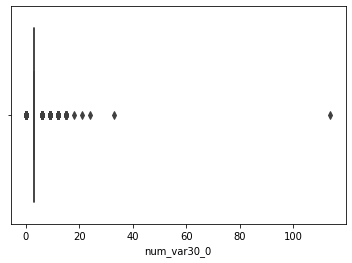

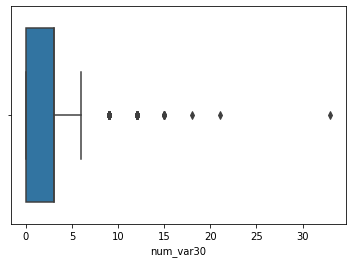

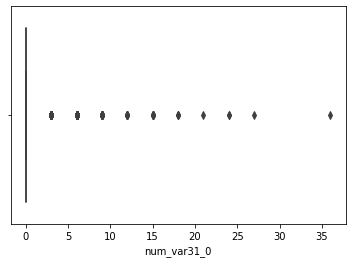

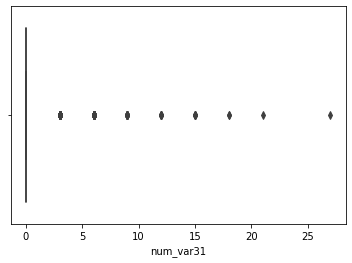

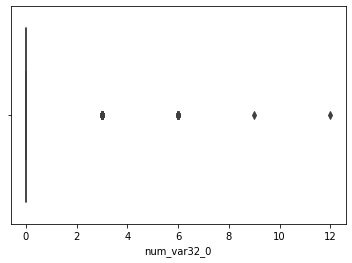

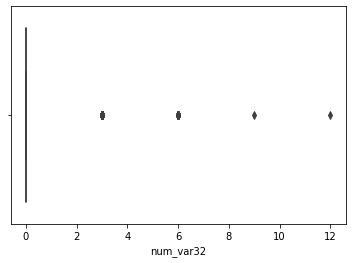

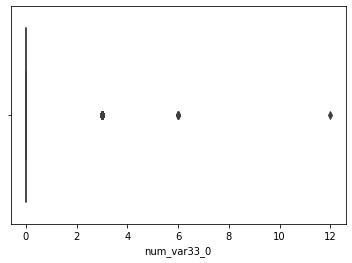

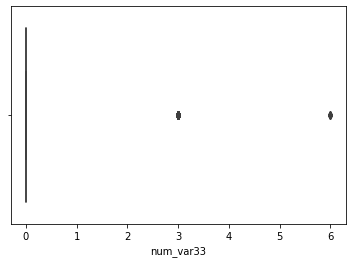

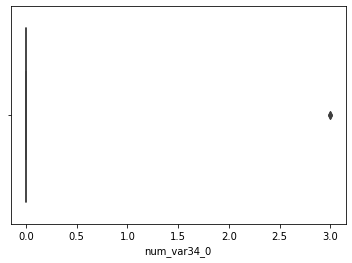

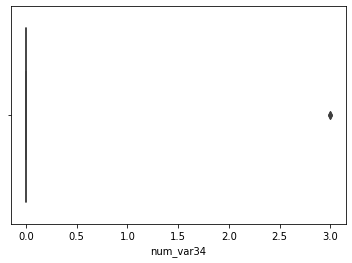

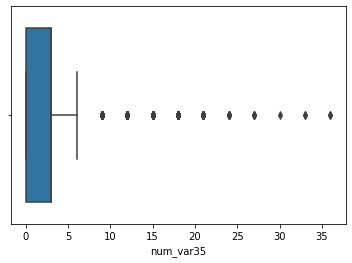

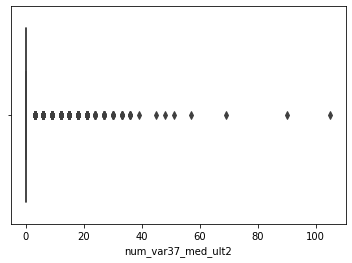

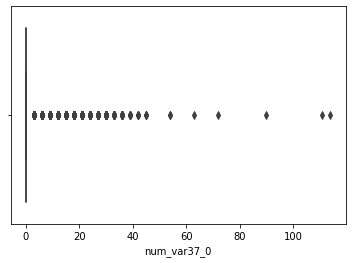

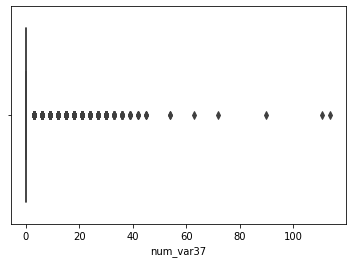

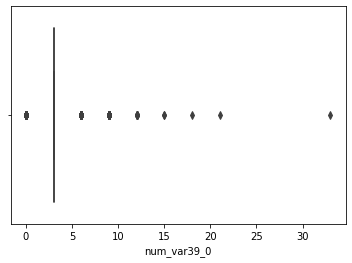

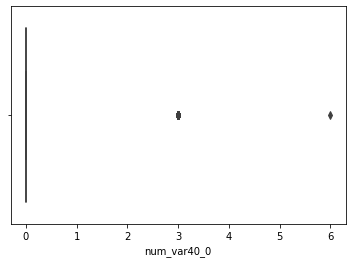

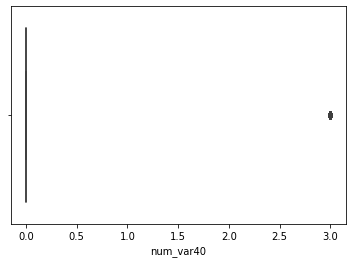

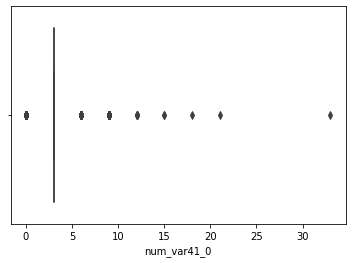

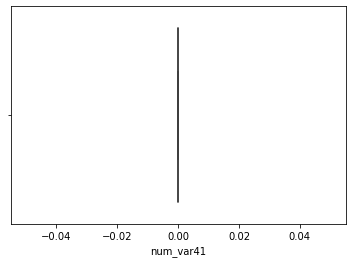

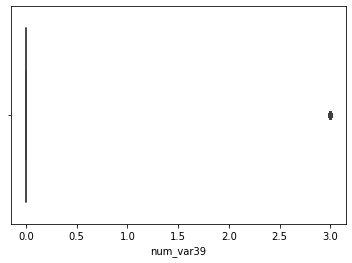

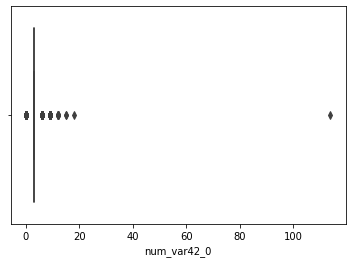

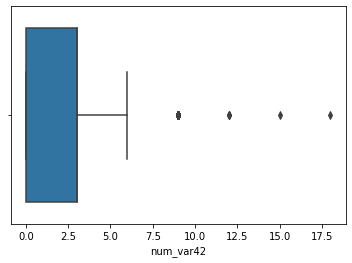

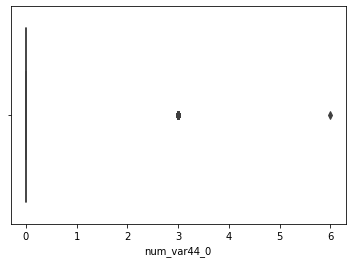

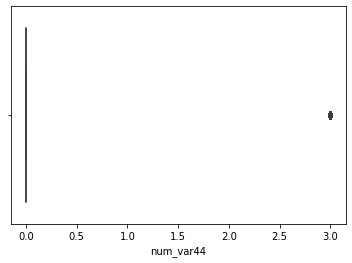

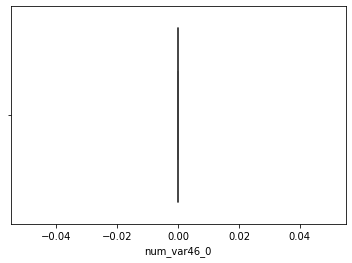

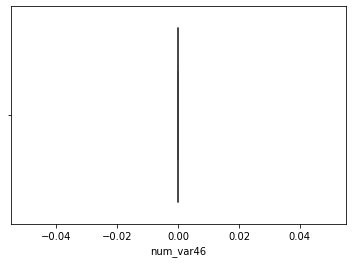

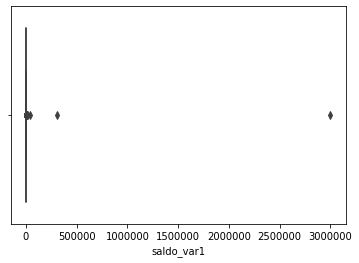

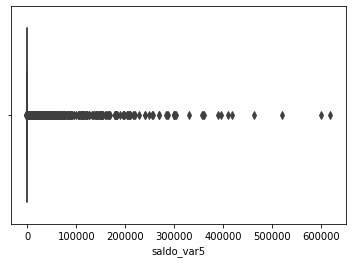

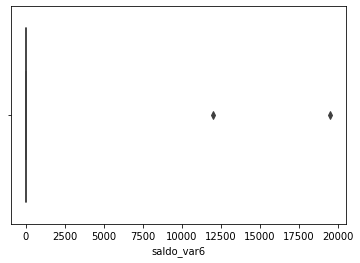

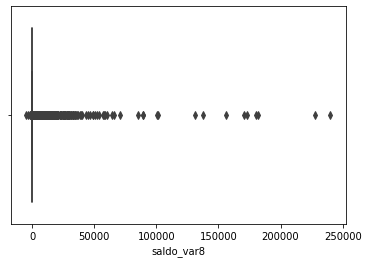

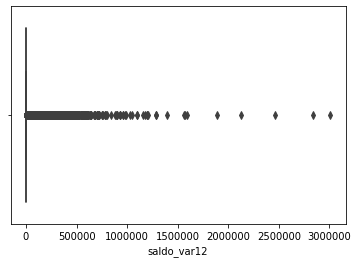

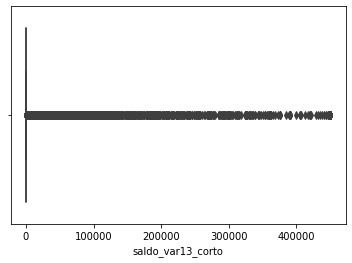

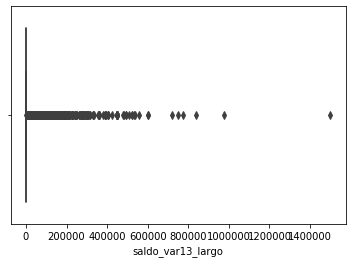

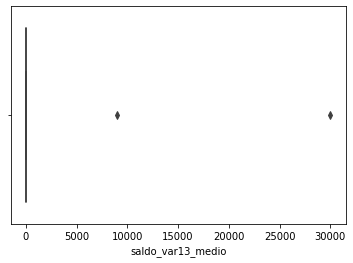

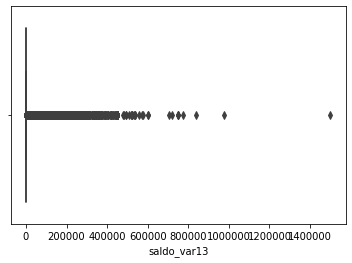

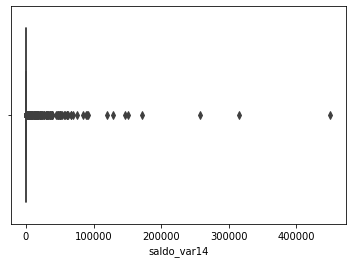

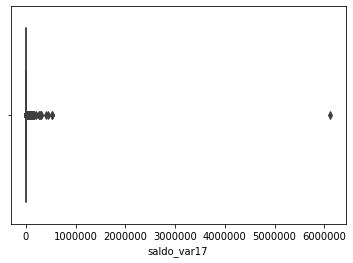

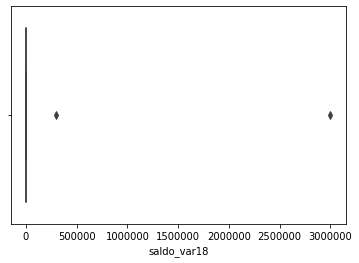

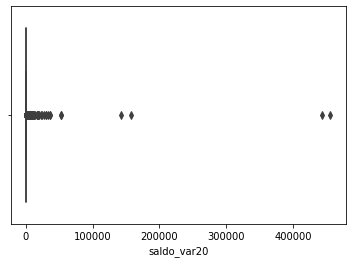

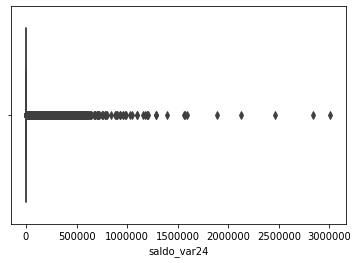

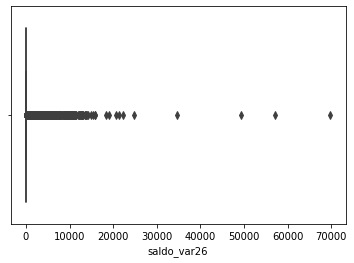

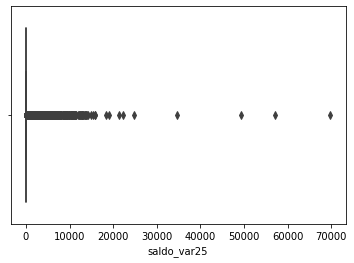

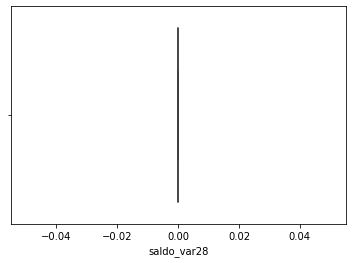

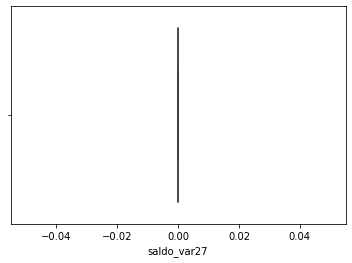

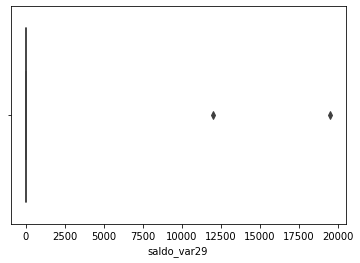

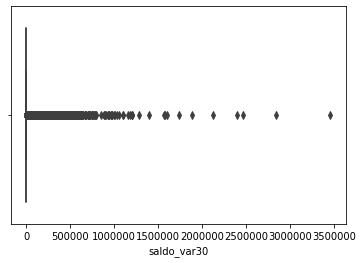

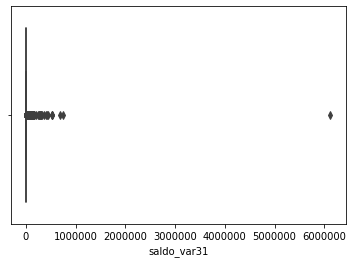

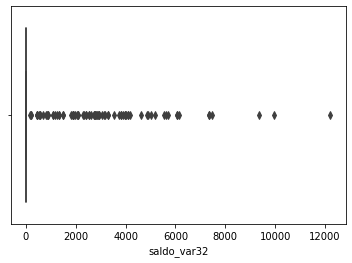

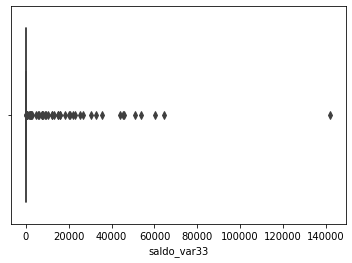

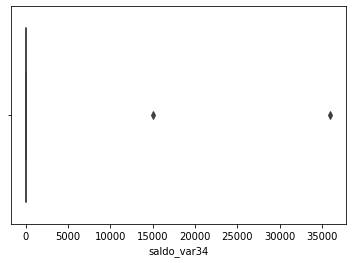

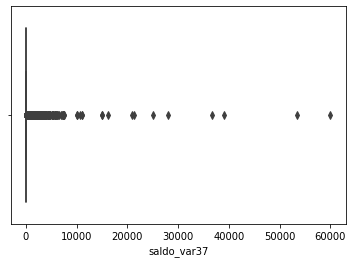

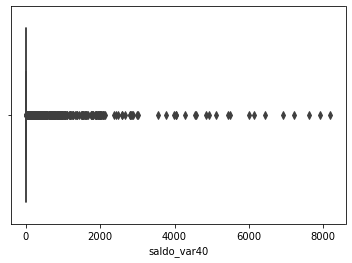

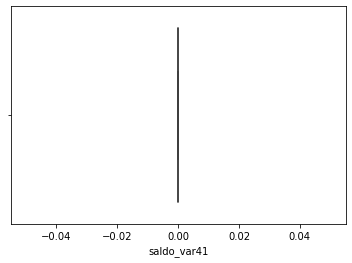

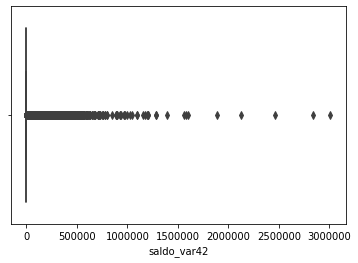

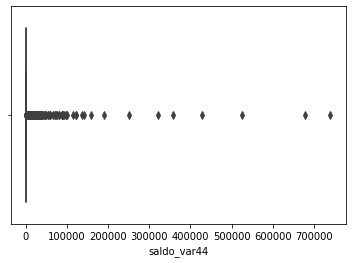

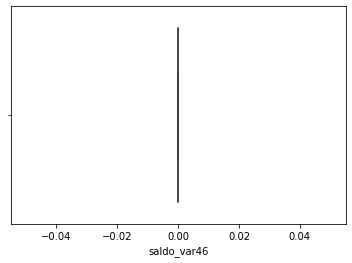

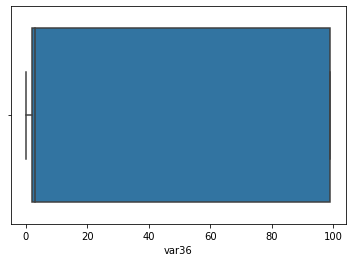

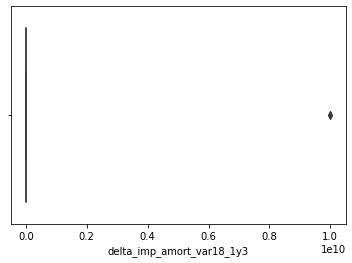

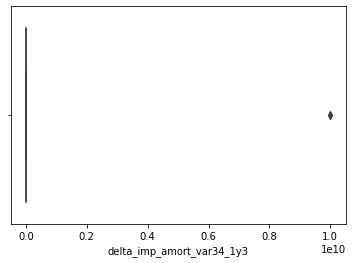

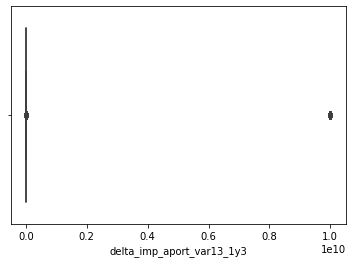

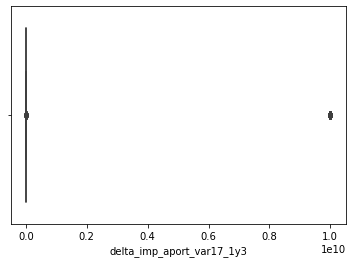

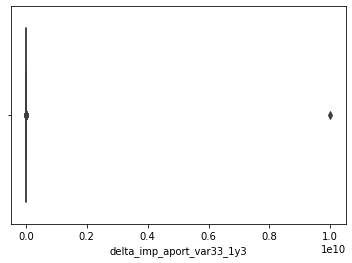

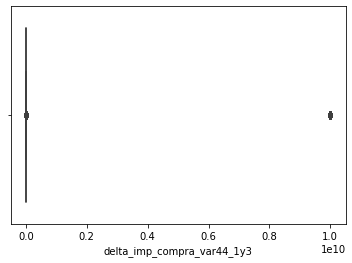

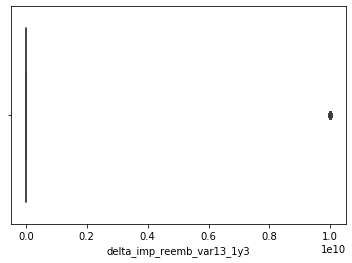

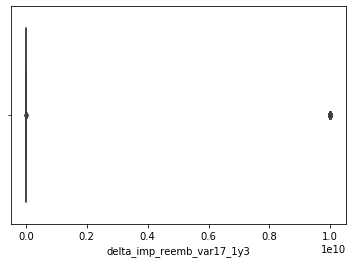

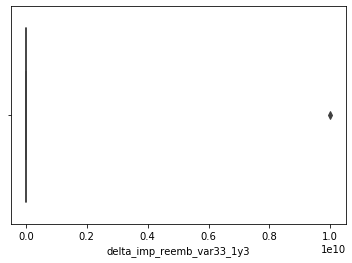

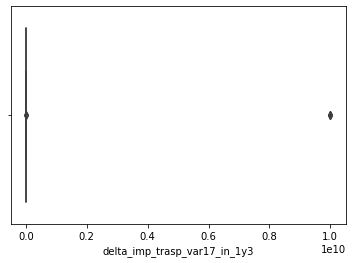

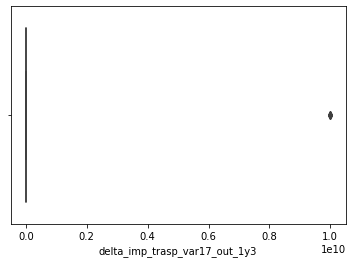

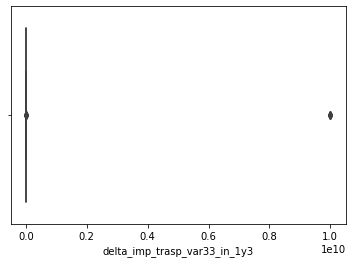

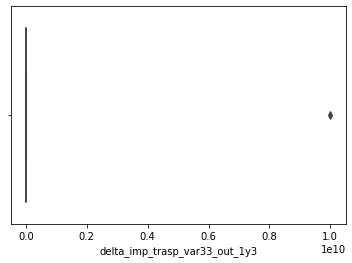

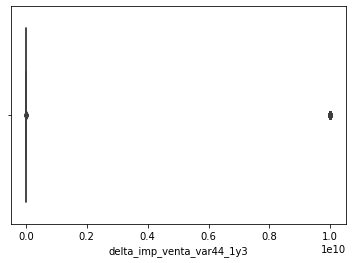

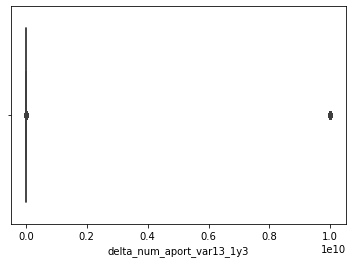

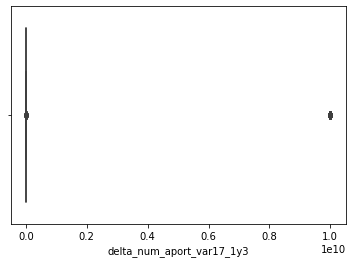

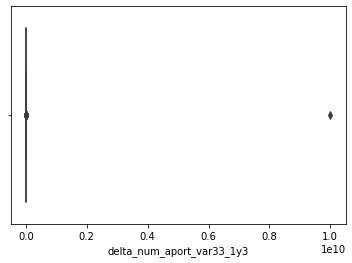

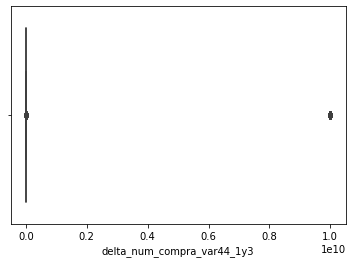

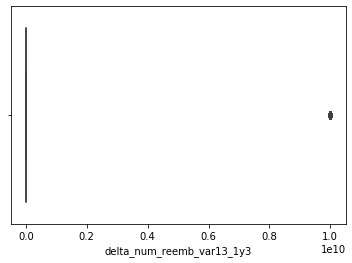

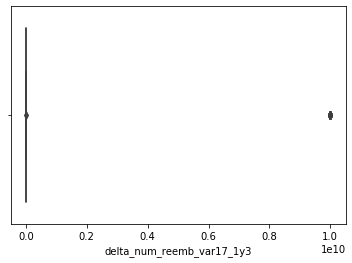

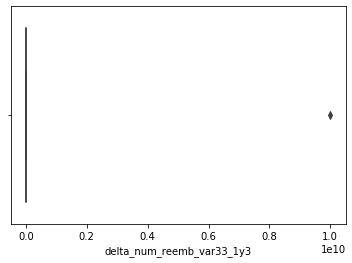

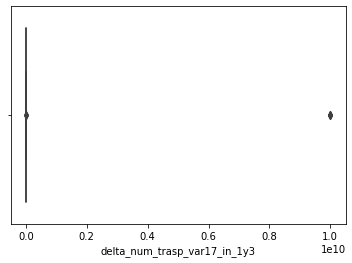

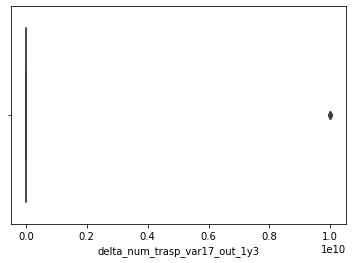

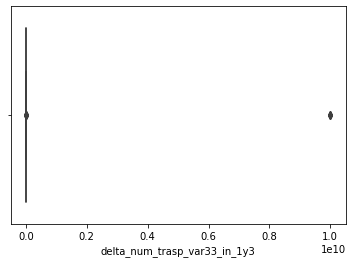

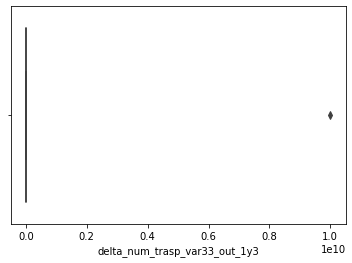

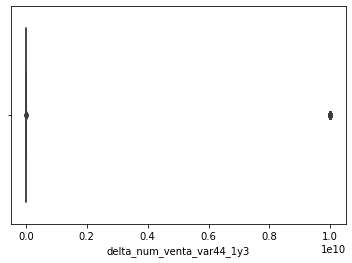

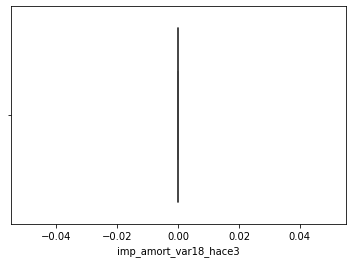

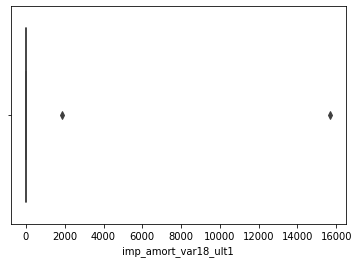

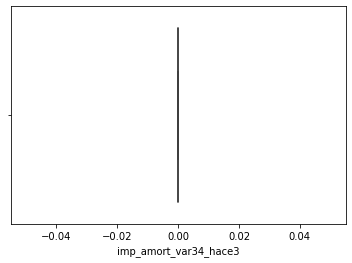

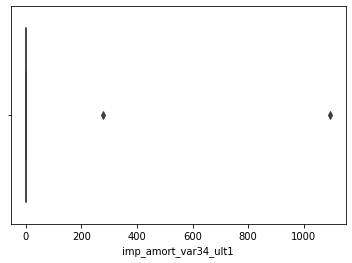

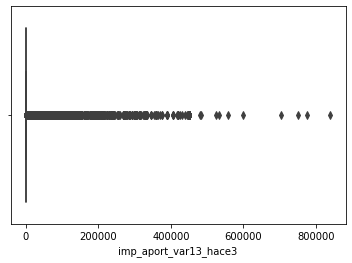

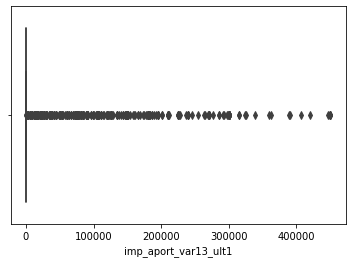

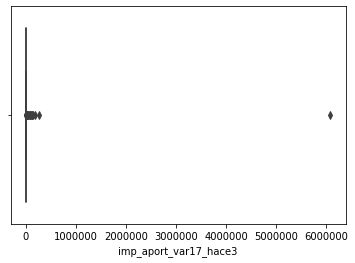

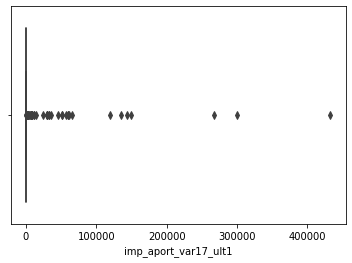

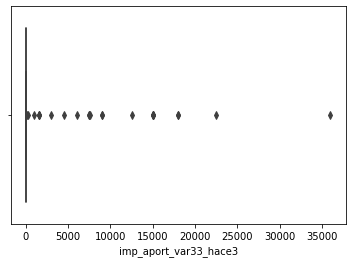

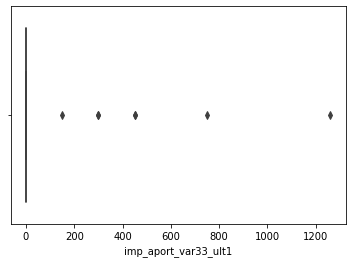

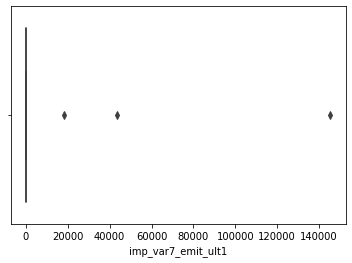

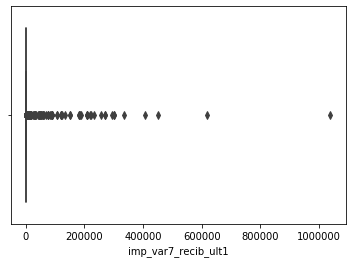

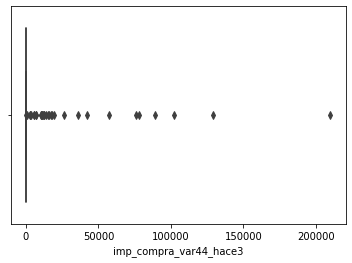

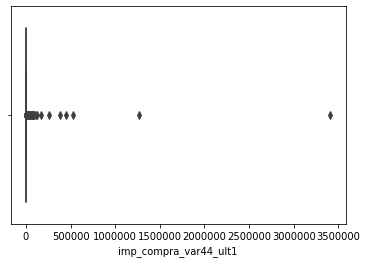

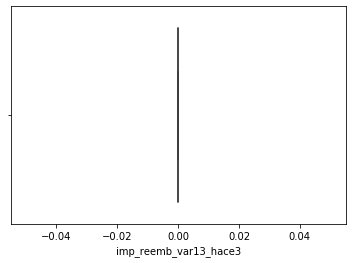

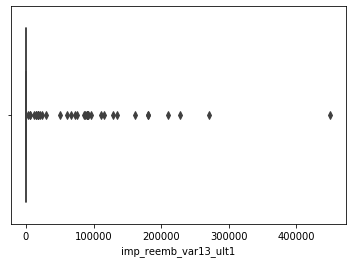

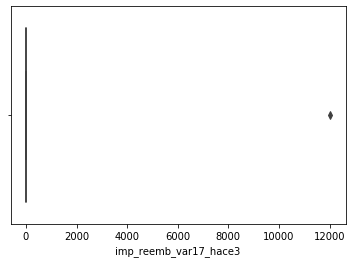

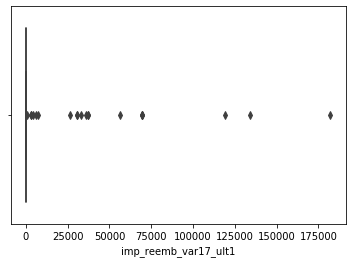

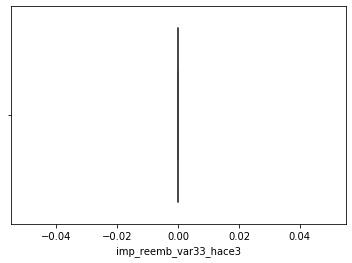

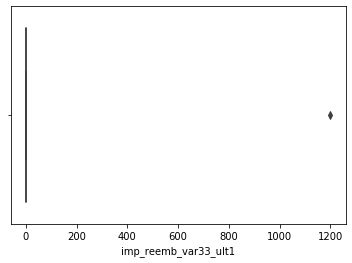

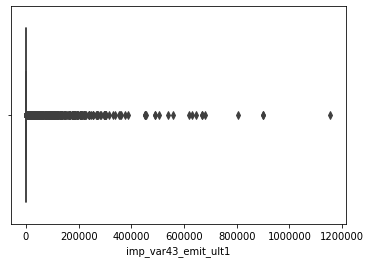

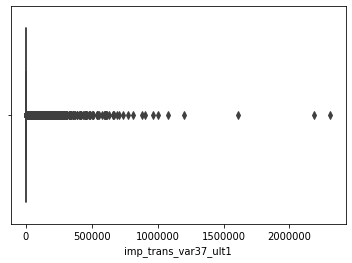

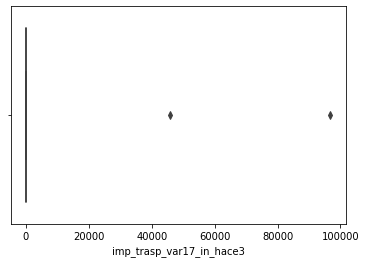

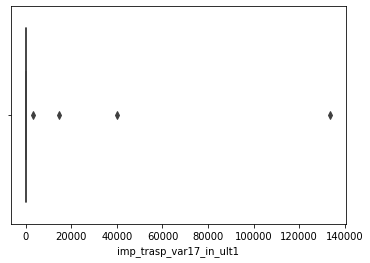

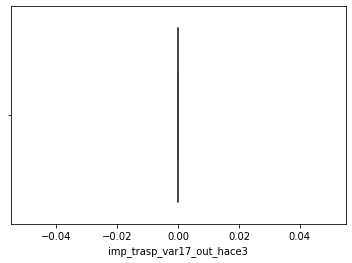

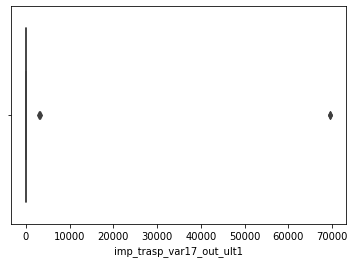

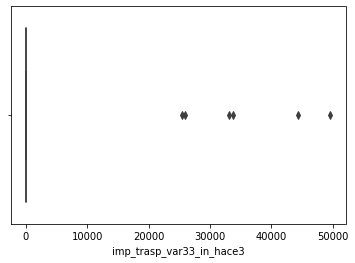

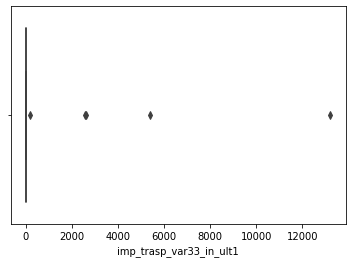

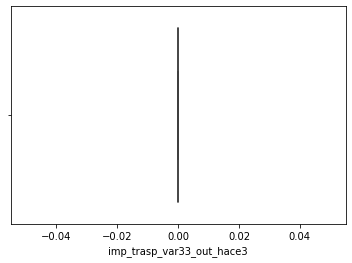

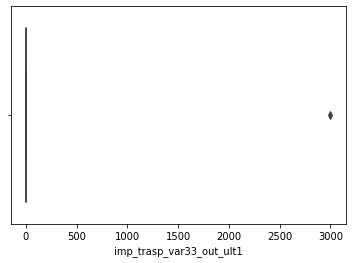

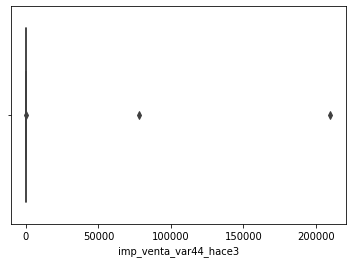

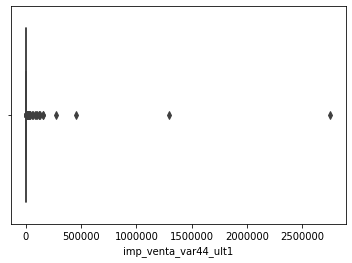

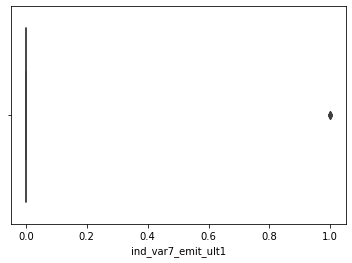

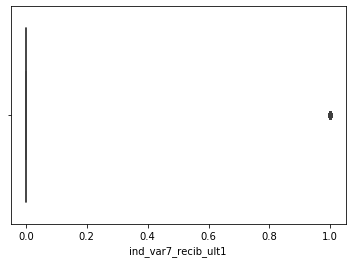

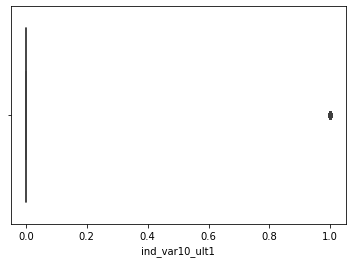

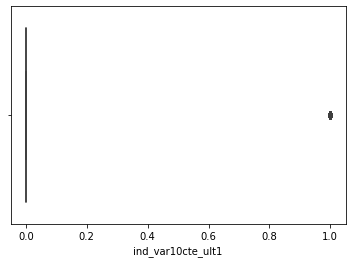

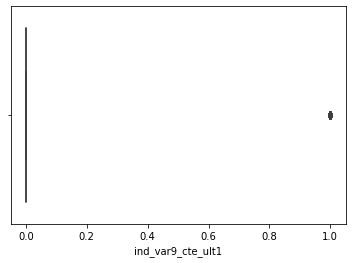

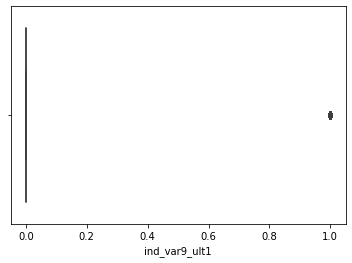

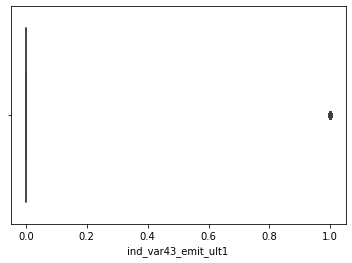

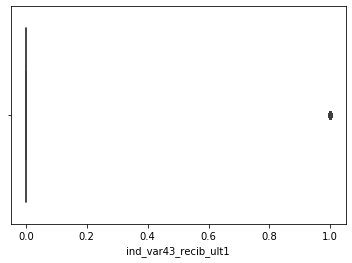

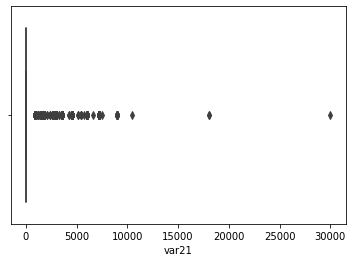

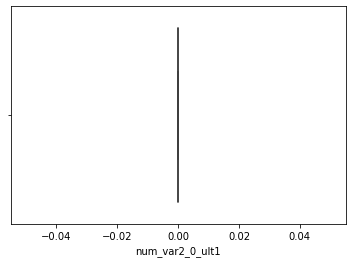

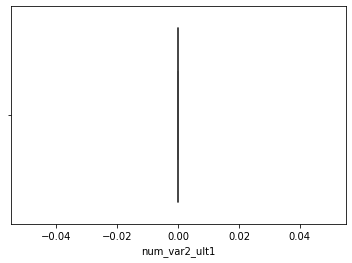

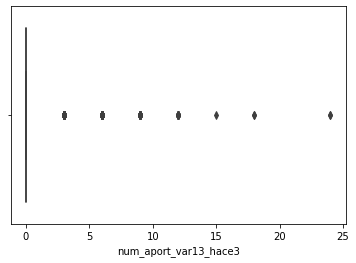

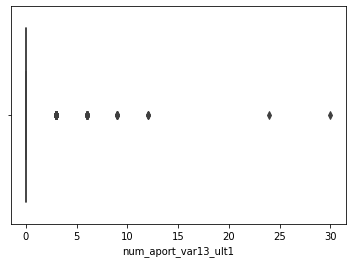

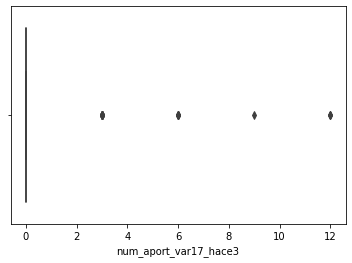

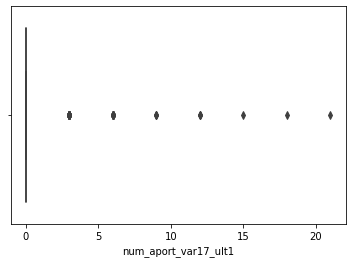

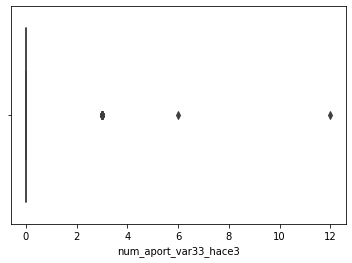

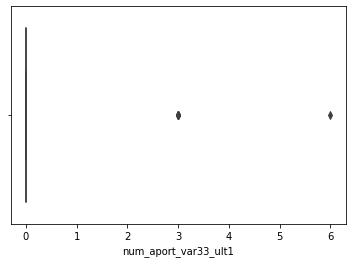

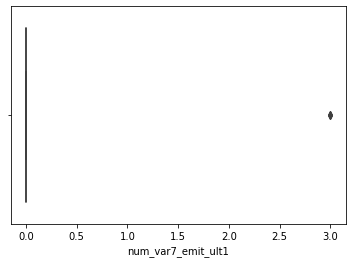

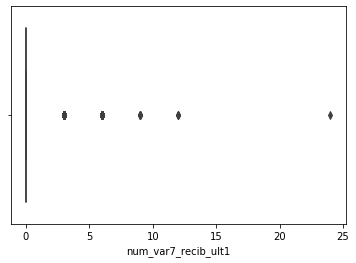

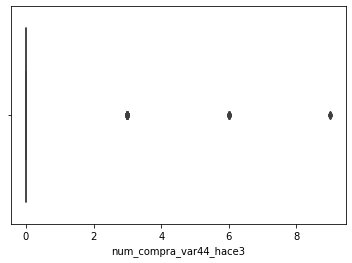

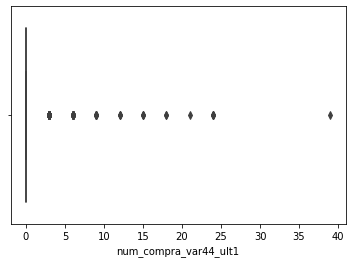

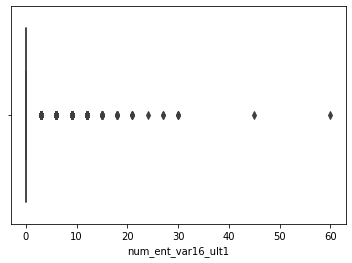

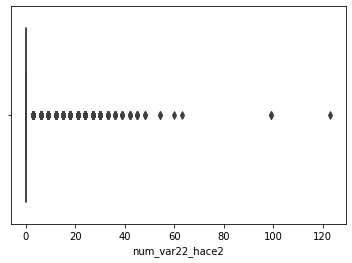

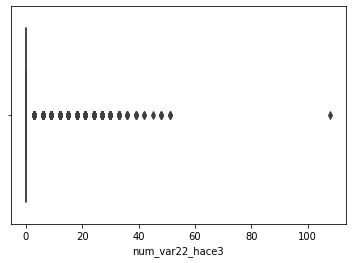

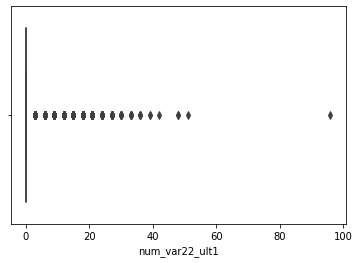

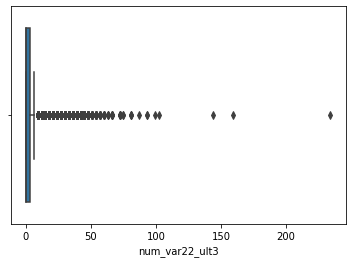

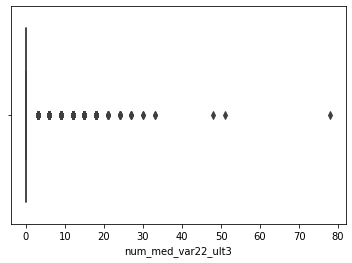

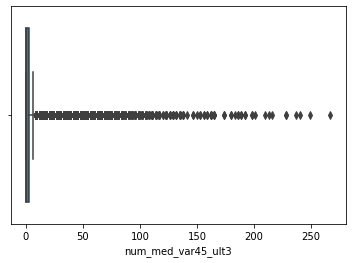

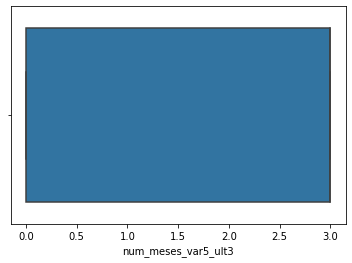

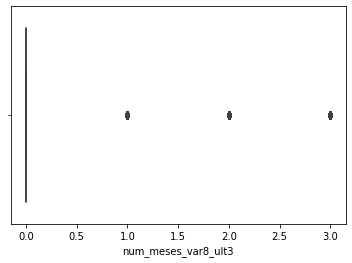

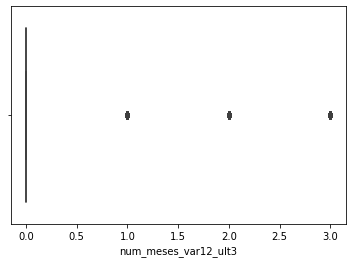

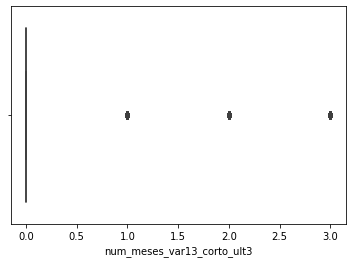

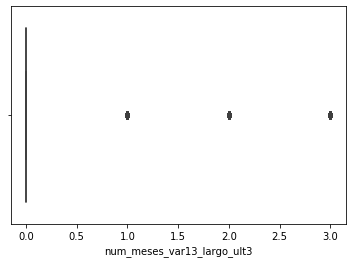

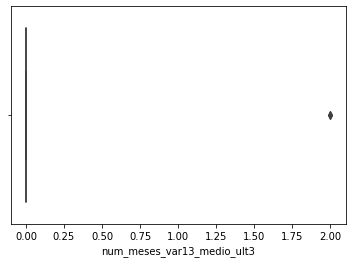

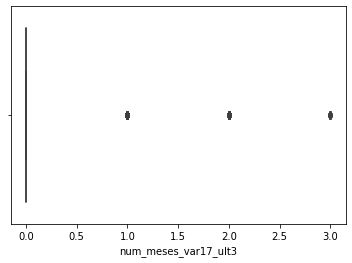

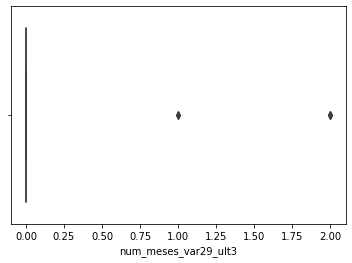

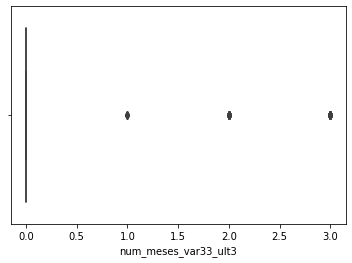

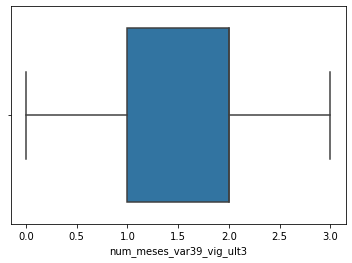

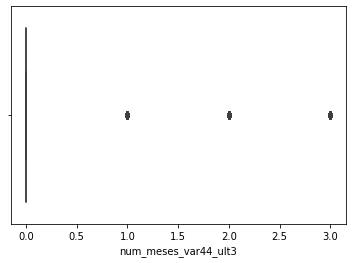

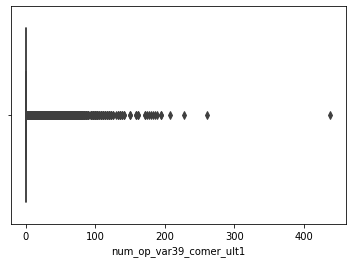

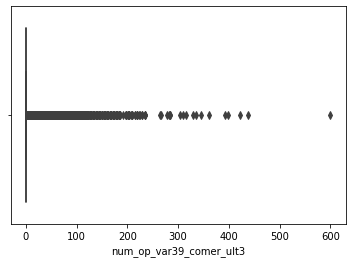

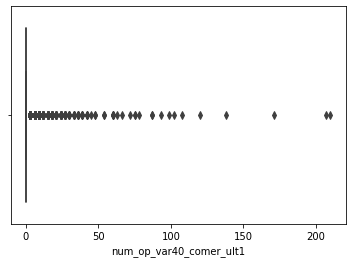

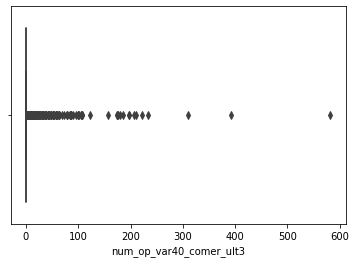

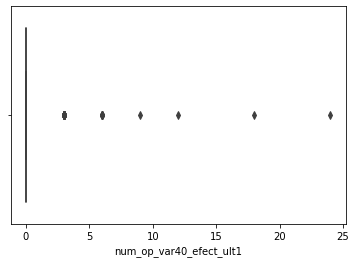

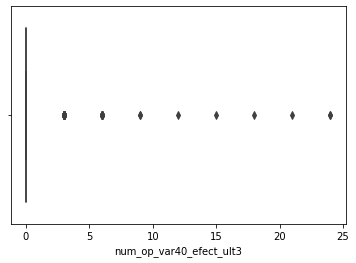

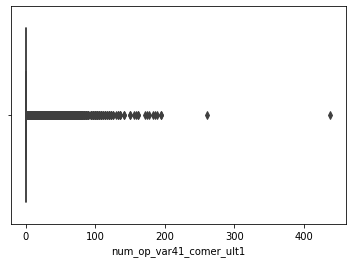

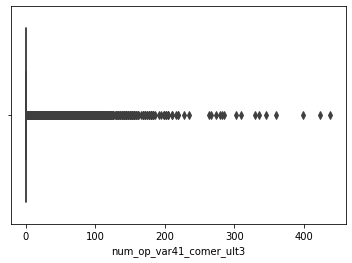

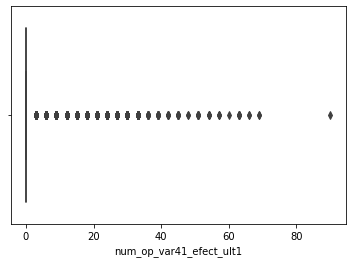

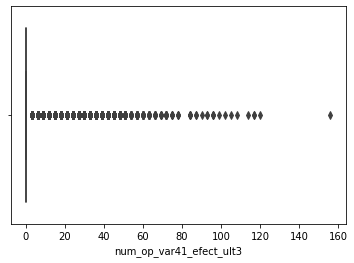

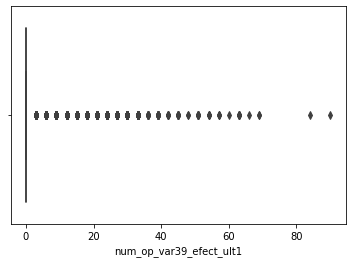

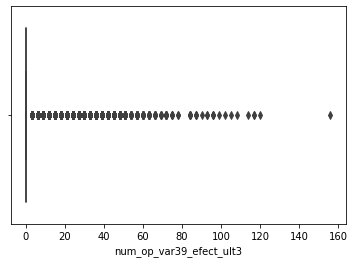

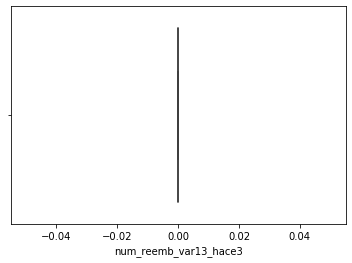

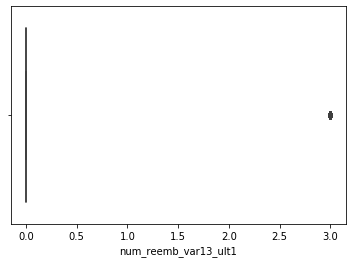

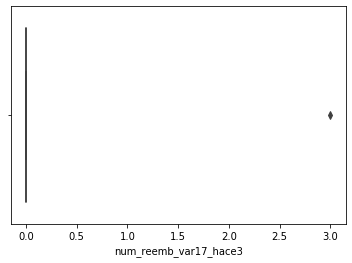

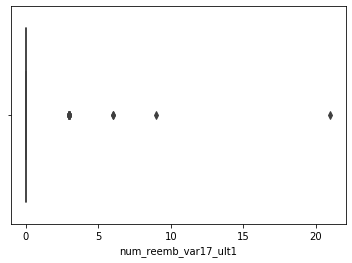

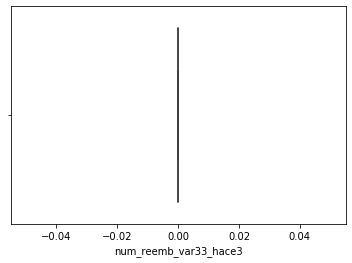

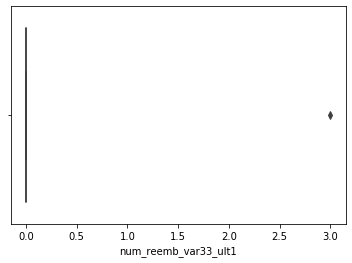

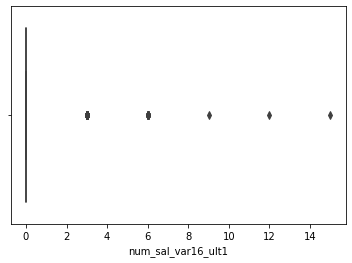

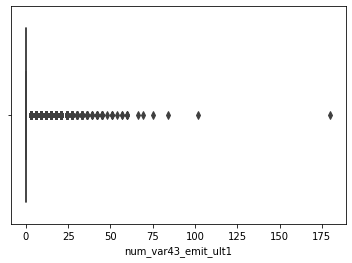

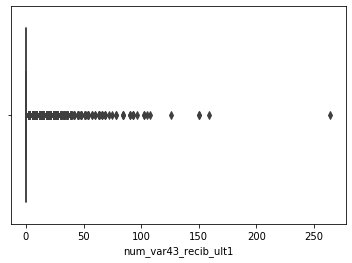

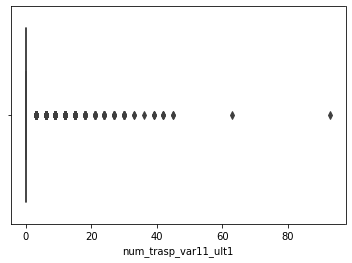

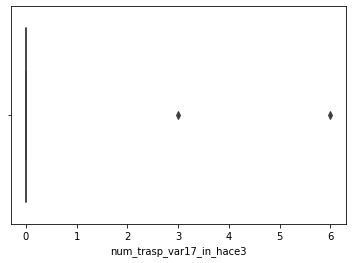

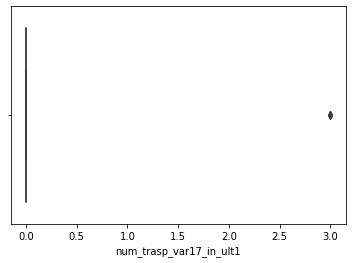

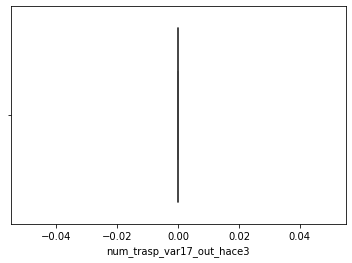

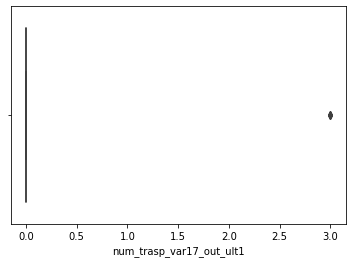

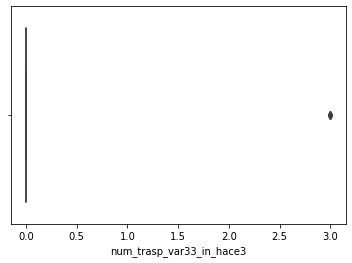

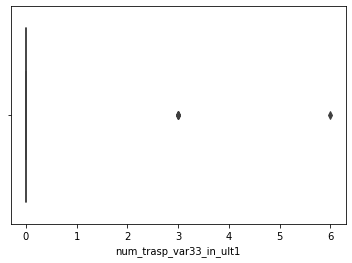

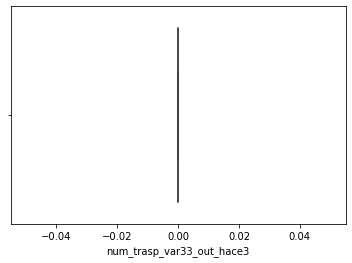

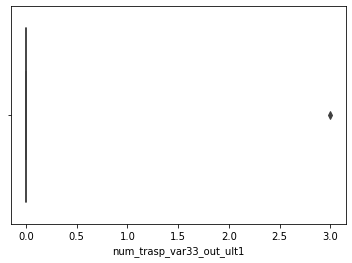

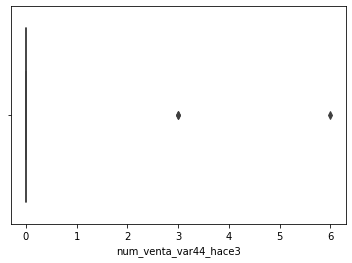

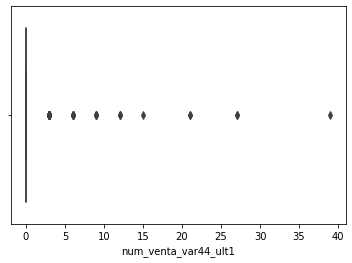

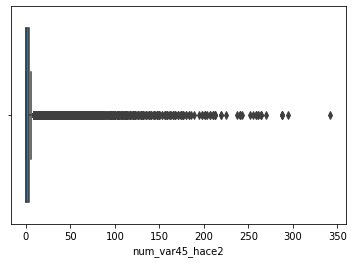

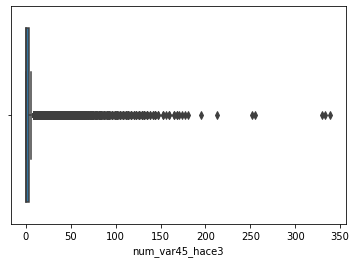

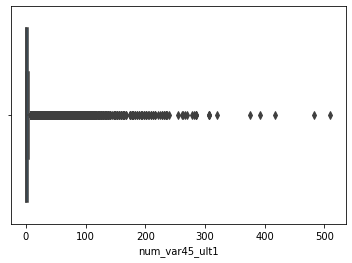

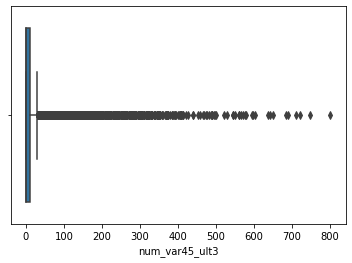

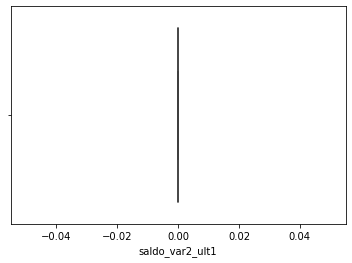

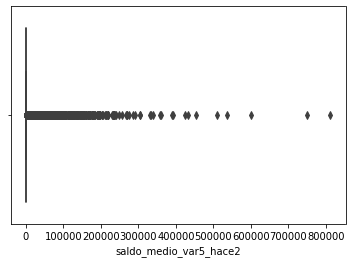

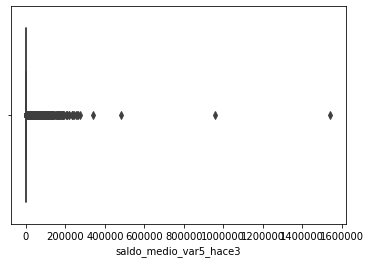

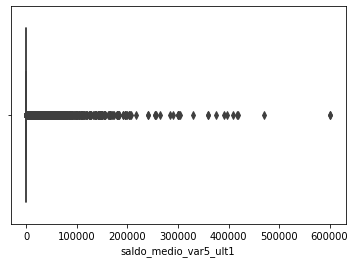

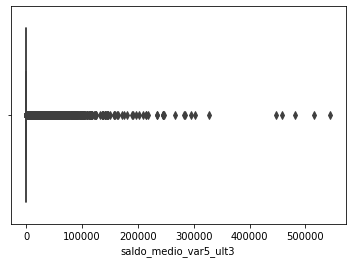

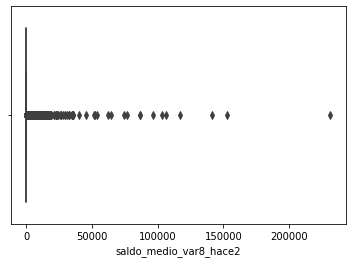

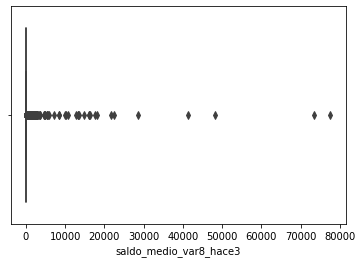

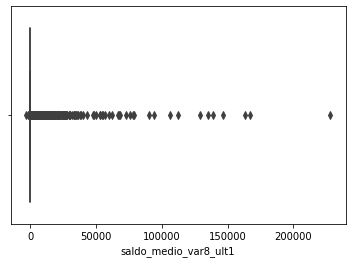

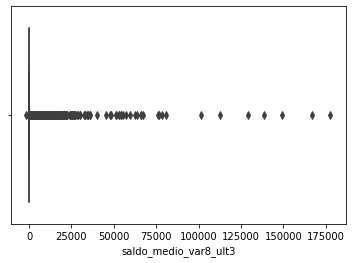

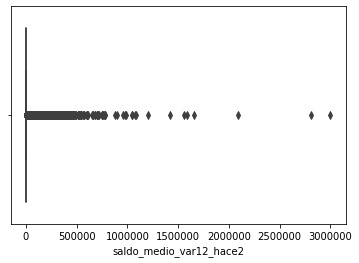

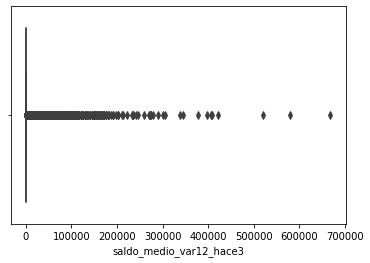

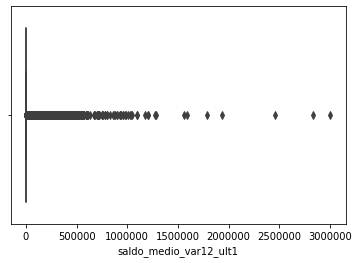

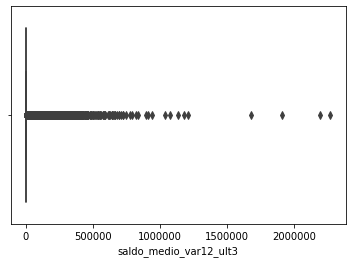

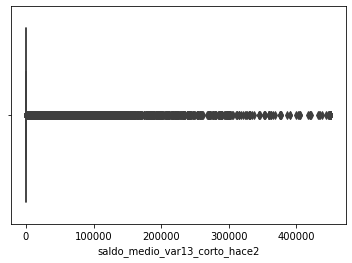

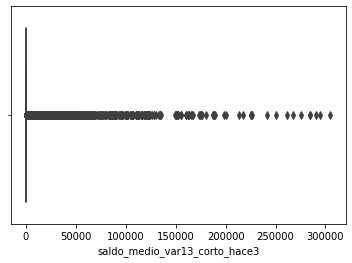

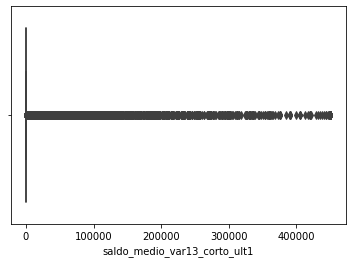

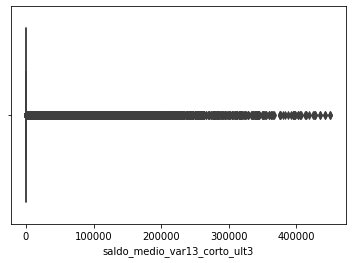

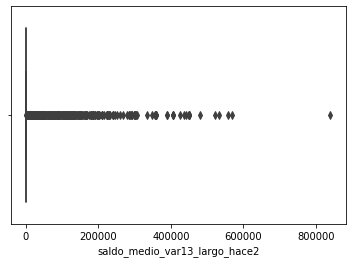

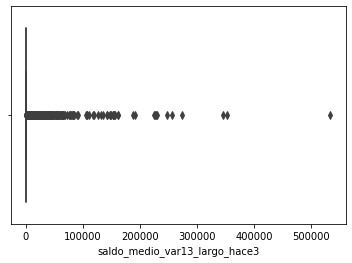

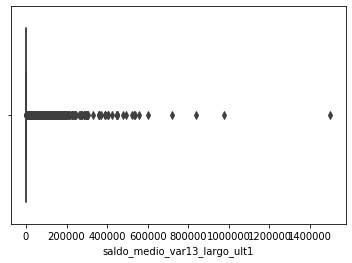

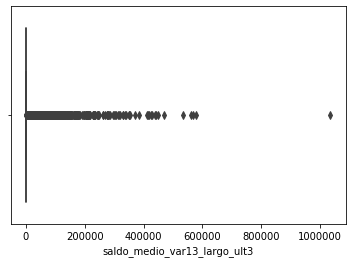

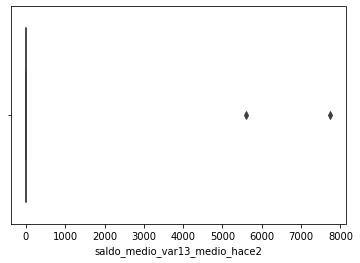

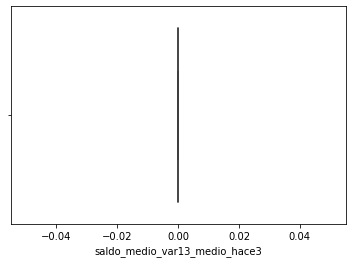

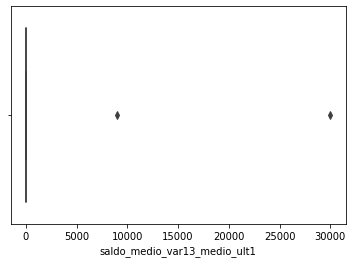

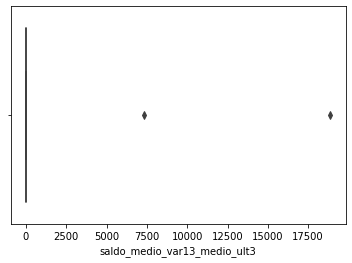

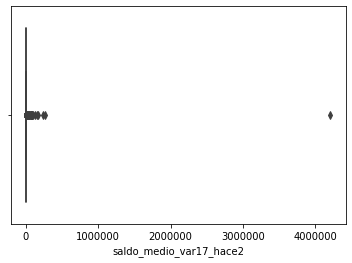

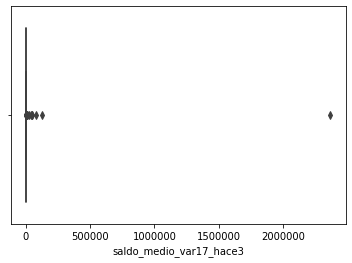

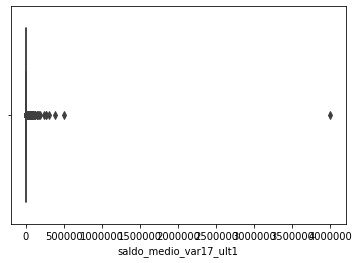

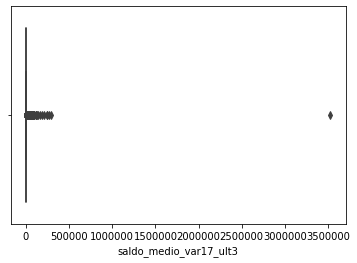

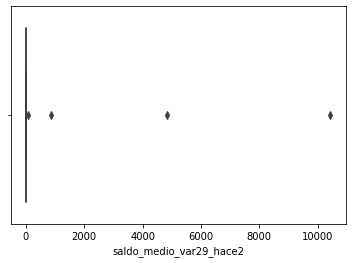

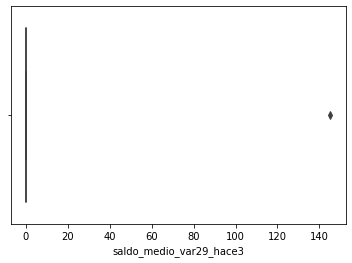

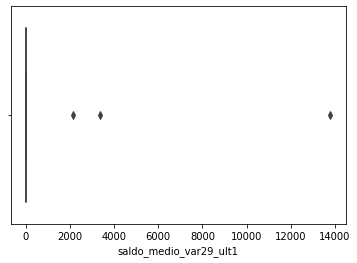

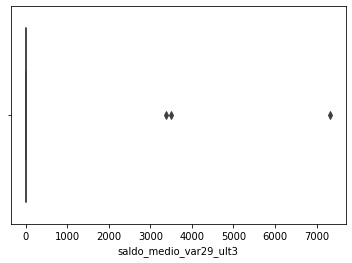

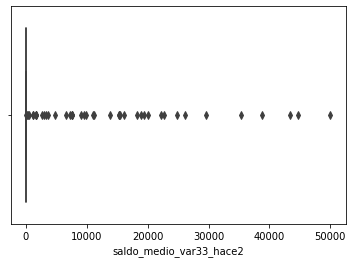

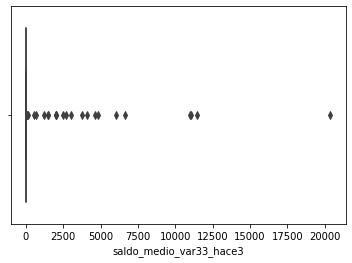

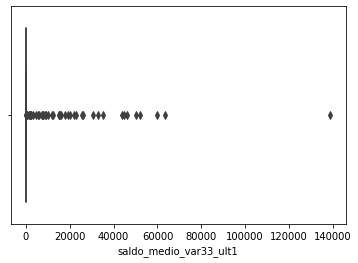

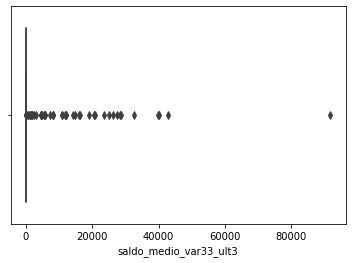

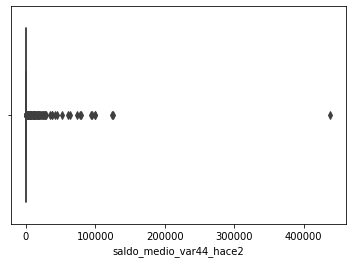

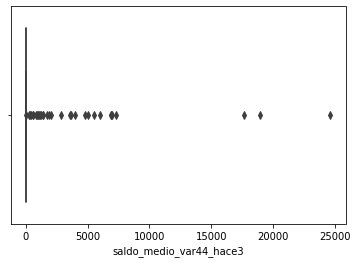

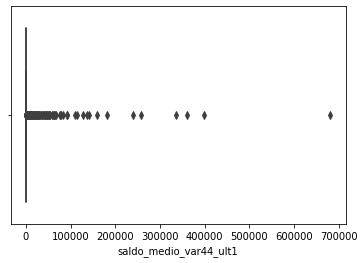

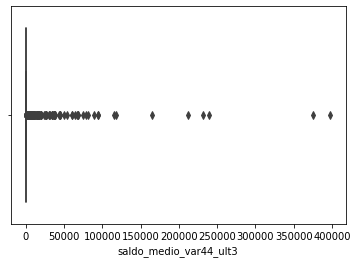

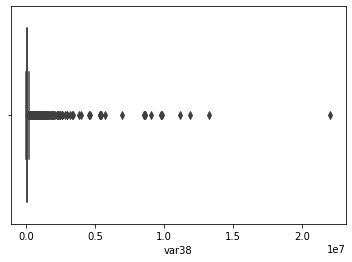

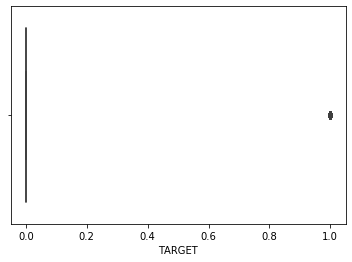

In [47]:
#Visualizando a distribuição de cada variável
for col in dados_treino.columns:
    sns.boxplot(dados_treino[col])
    plt.show()

In [10]:
#Verificando por colunas com dados missing
print('Dados nulos: ', dados_treino.columns[dados_treino.isnull().any()].tolist())

Dados nulos:  []


In [11]:
#Verificando as colunas que possuem 100% dos valores zerados
colunas_zeradas=[]
for col in dados_treino.columns:
    if len(dados_treino[dados_treino[col]==0])/len(dados_treino)*100==100:
        colunas_zeradas.append(col)

In [12]:
#Quantidade de colunas zeradas
print(len(colunas_zeradas))

34


In [13]:
#Removendo as colunas com todos os valores zerados do dataset
dados_treino.drop(colunas_zeradas, axis=1, inplace=True)

In [15]:
#Quantidade de colunas que ficaram
print(len(dados_treino.columns))

336


In [90]:
#Verificando valores unicos para conhecer melhor os valores de cada variavel. 
#Aqui somente trazendo 10 possíveis valores unicos
for col in dados_treino.columns:
    print(col , dados_treino[col].unique()[0:10])


var3 [  2 229 178   0   8   3   4  10 110   7]
var15 [23 34 37 39 27 26 45 25 42 51]
imp_ent_var16_ult1 [   0.  600.  525. 3000.   24.   30.  450.  120.    3.  300.]
imp_op_var39_comer_ult1 [   0.    195.   1086.48   55.2   117.75 1658.37   55.05   59.7    59.1
  477.06]
imp_op_var39_comer_ult3 [   0.    195.   1952.91   70.95  122.25 5722.77  127.44   59.7    59.1
  618.36]
imp_op_var40_comer_ult1 [   0.    247.56  828.18  746.1   383.85  224.07 2061.45  401.4    75.12
  721.5 ]
imp_op_var40_comer_ult3 [   0.    835.86 2320.65  284.82  746.1   383.85 1958.55 2061.45  521.4
  255.27]
imp_op_var40_efect_ult1 [   0.  750.  600.  210. 1800. 1710. 1020.  870.  450. 6600.]
imp_op_var40_efect_ult3 [   0.  960.  600.  210. 1800. 1710. 3000.  870.  450. 6600.]
imp_op_var40_ult1 [   0.   1585.86  828.18  383.85  670.35 1749.63  521.4  1846.5   199.53
   17.94]
imp_op_var41_comer_ult1 [   0.    195.   1086.48   55.2   117.75 1410.81   55.05   59.7    59.1
  477.06]
imp_op_var41_comer_ult3 [   0.

saldo_medio_var13_corto_ult3 [0.0000000e+00 2.4075000e+02 2.0700000e+04 7.7581050e+04 9.1612890e+04
 2.4999999e+05 6.7741950e+04 4.0645230e+04 1.6100001e+05 5.8065000e+02]
saldo_medio_var13_largo_hace2 [     0.    27000.    74516.13  93000.   120000.    75000.   134709.66
  18000.    71048.46  56659.98]
saldo_medio_var13_largo_hace3 [     0.    18000.    15000.03  42580.65   7258.08    580.65 160714.32
   9600.     7200.    37838.73]
saldo_medio_var13_largo_ult1 [     0.    27000.   105000.    93000.   120000.    75000.   174000.
  18000.   104703.    91285.53]
saldo_medio_var13_largo_ult3 [     0.    24000.    89758.08  67000.02  94193.55  52419.36 154354.83
  12193.56  87875.73  73972.77]
saldo_medio_var13_medio_hace2 [   0.   7741.95 5586.21]
saldo_medio_var13_medio_ult1 [    0 30000  9000]
saldo_medio_var13_medio_ult3 [    0.   18870.99  7293.12]
saldo_medio_var17_hace2 [    0.     514.8  33081.39  3999.75  2198.67 30117.39  5996.58  1079.97
  4080.48 37036.44]
saldo_medio_var17_ha

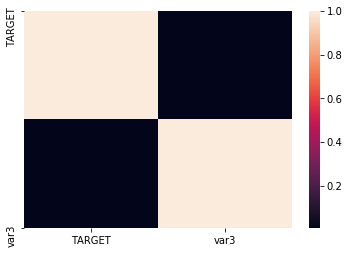

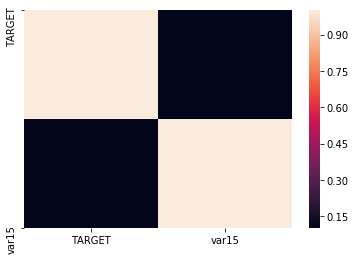

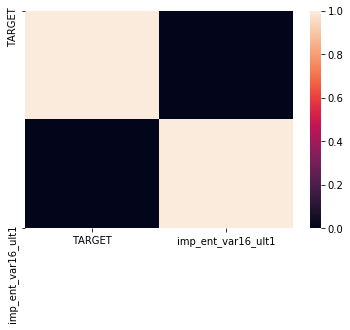

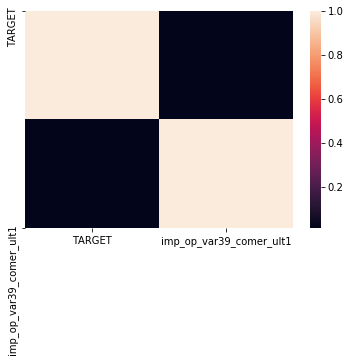

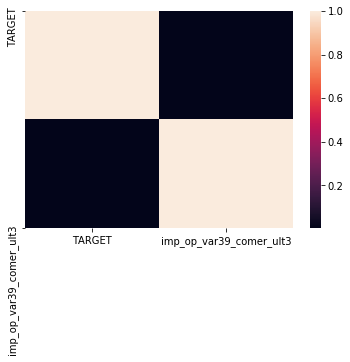

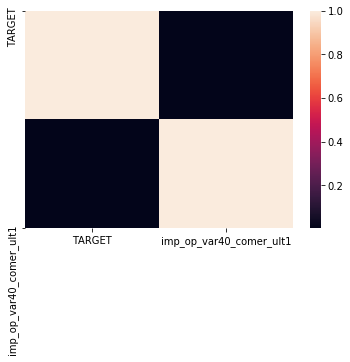

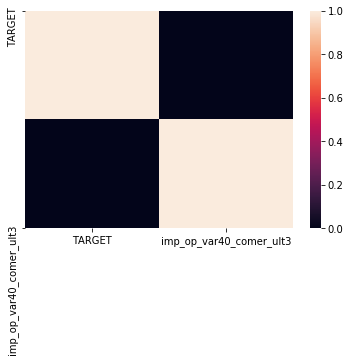

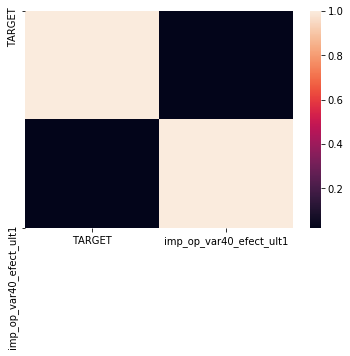

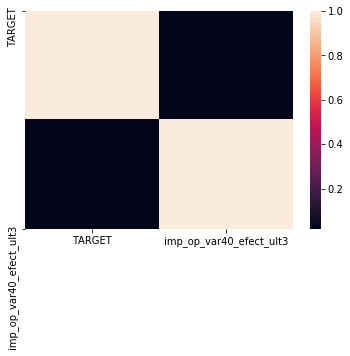

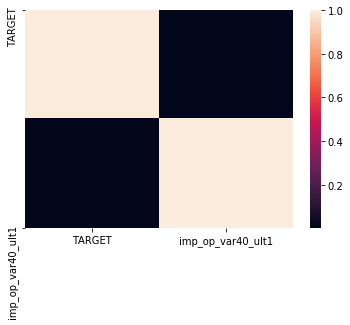

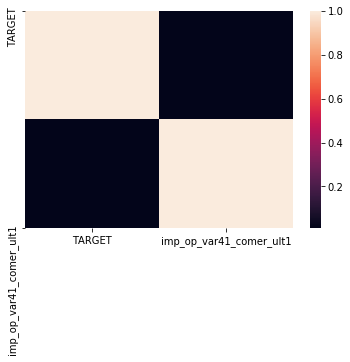

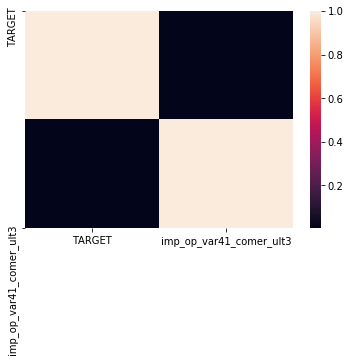

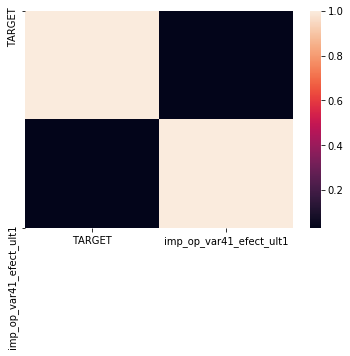

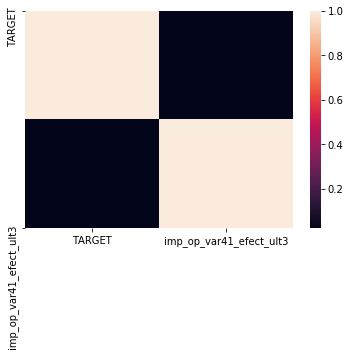

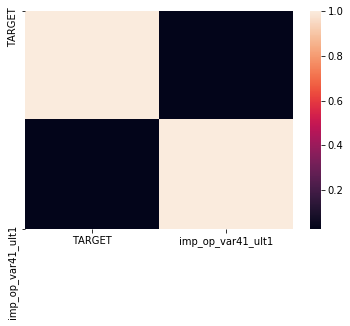

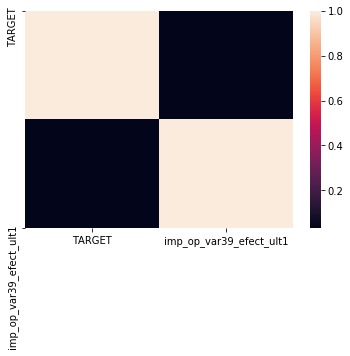

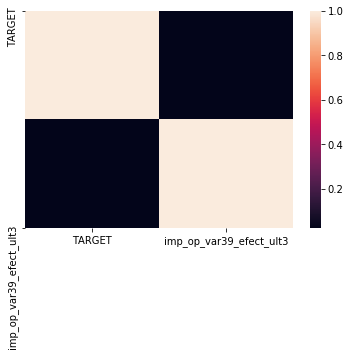

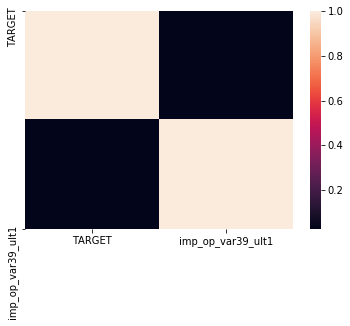

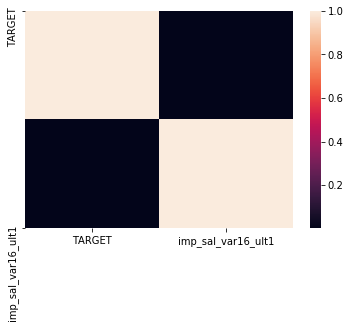

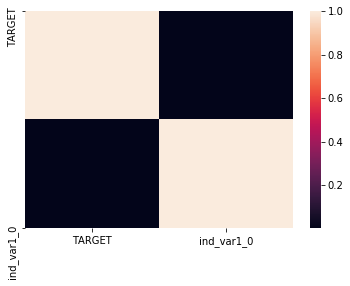

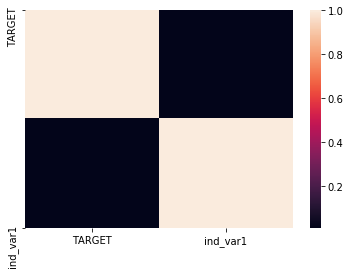

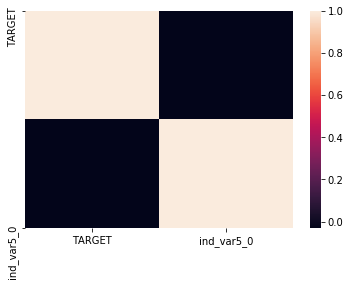

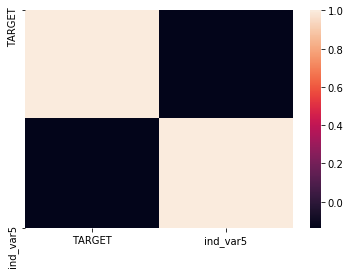

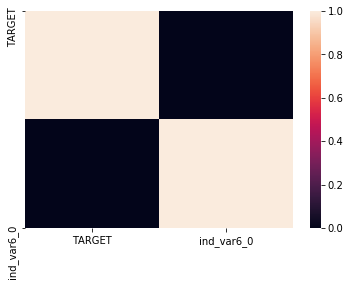

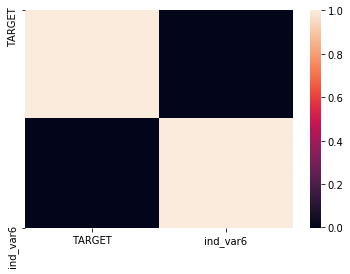

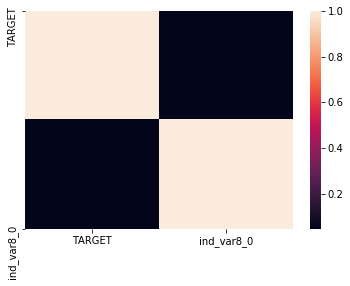

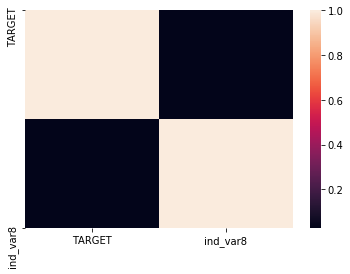

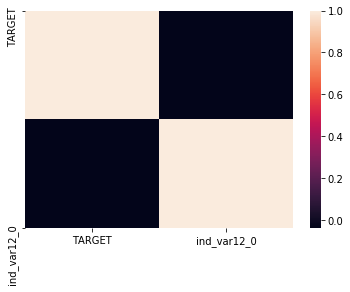

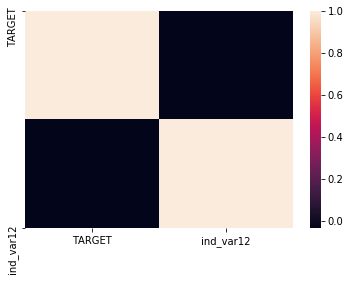

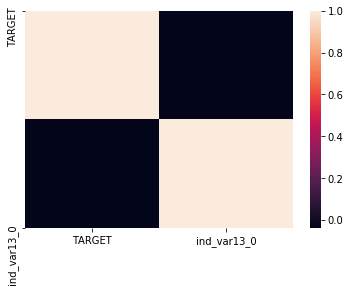

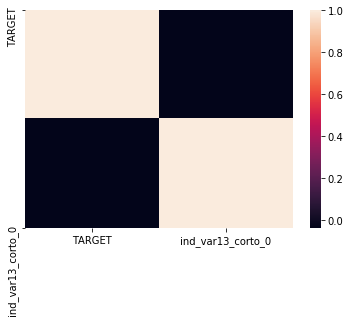

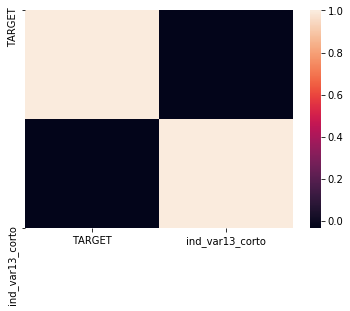

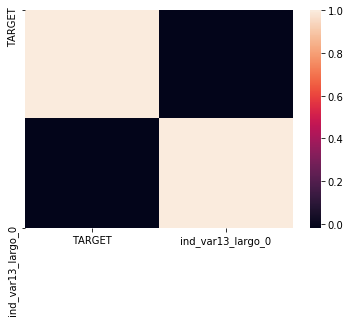

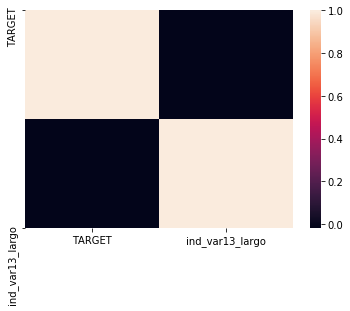

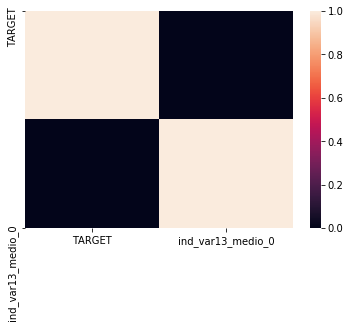

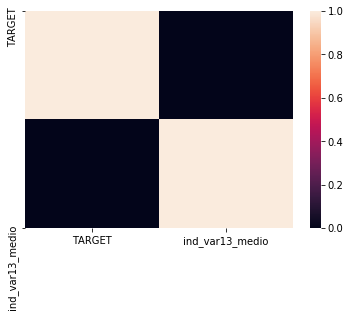

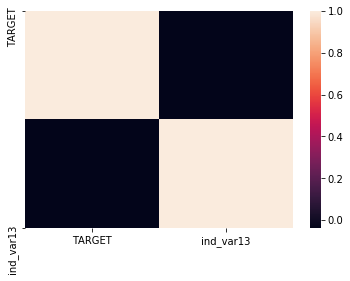

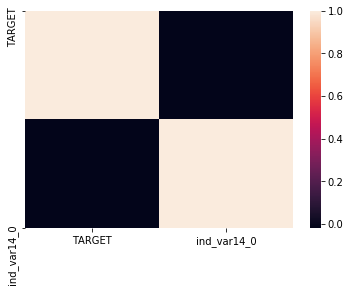

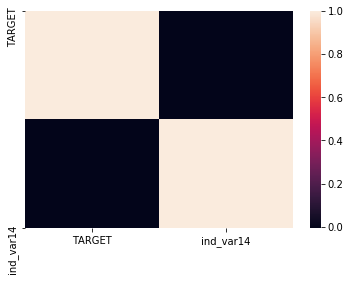

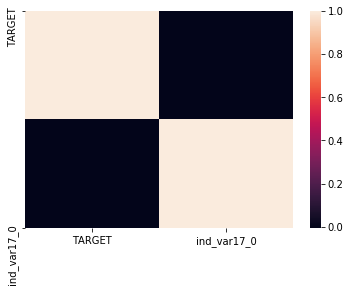

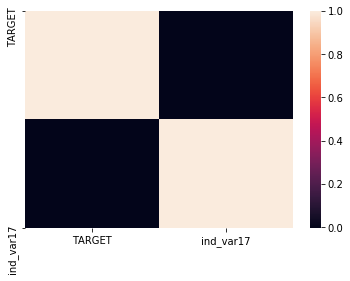

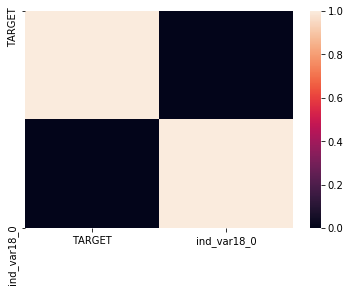

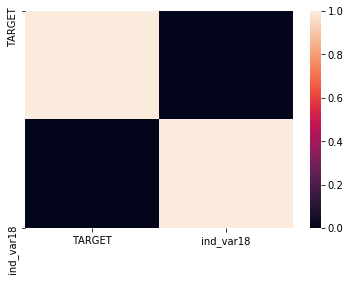

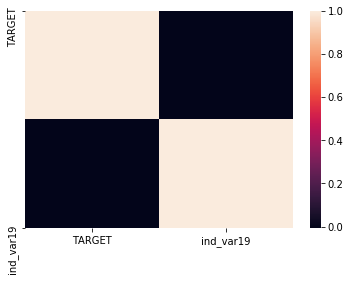

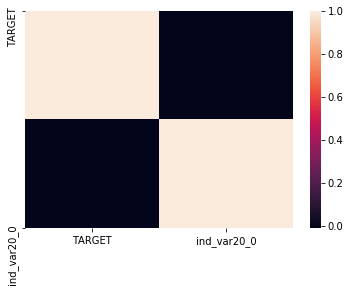

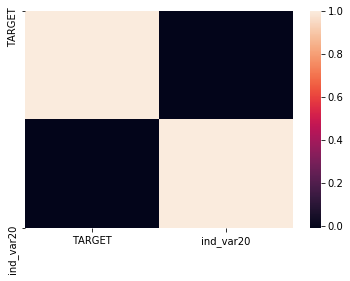

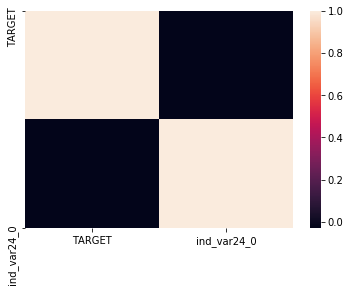

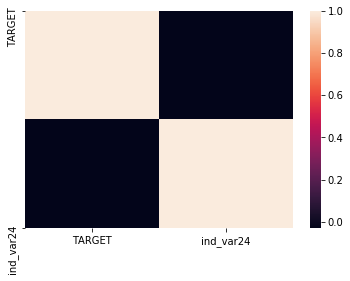

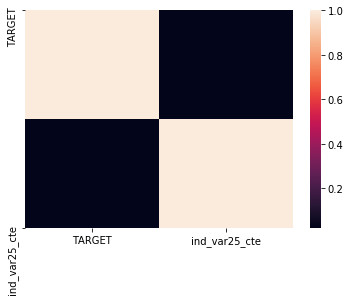

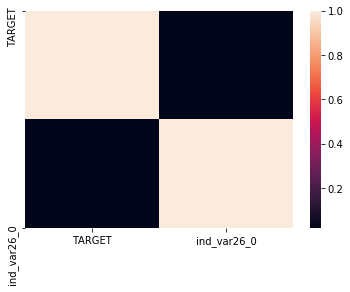

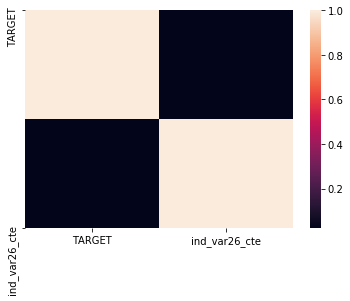

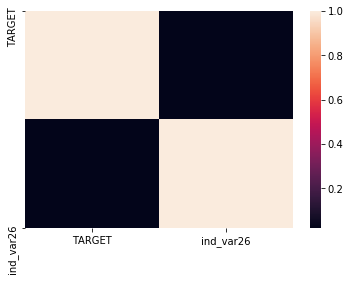

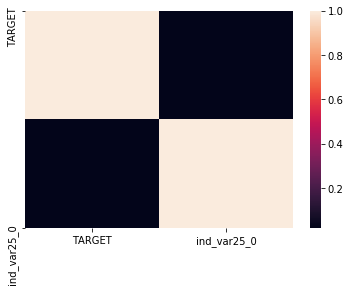

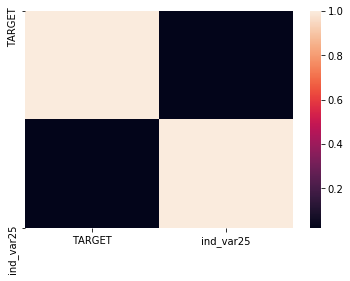

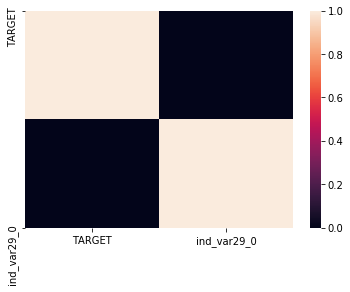

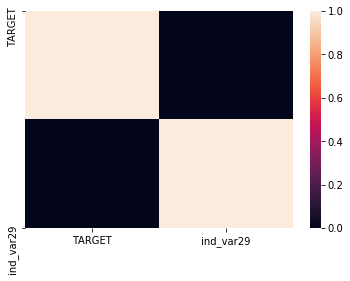

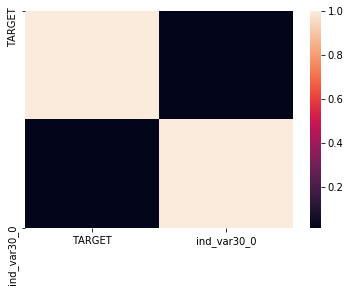

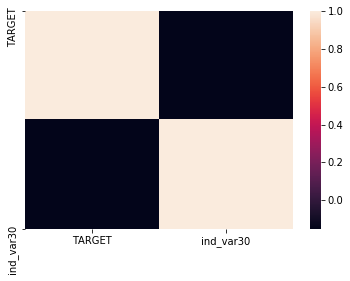

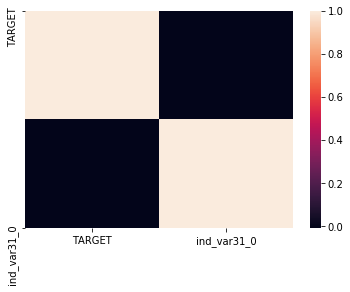

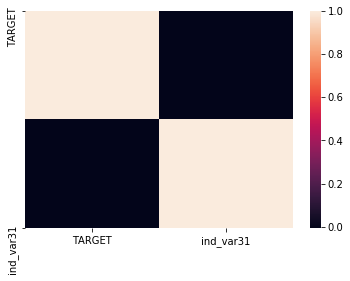

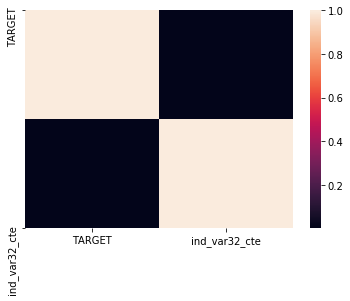

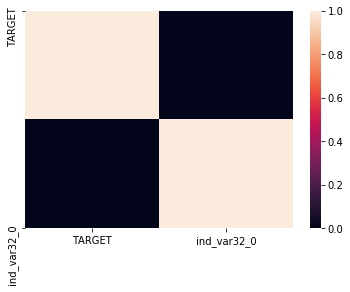

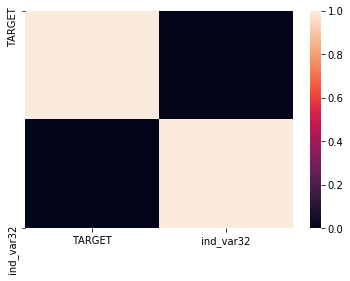

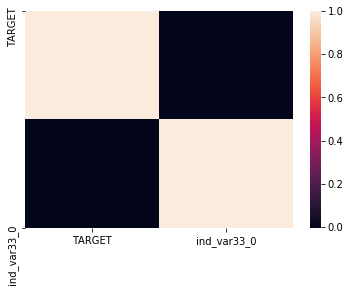

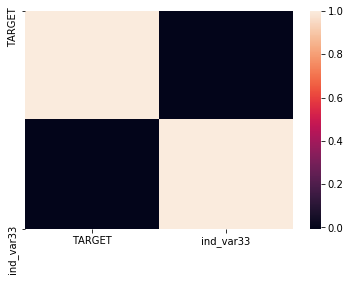

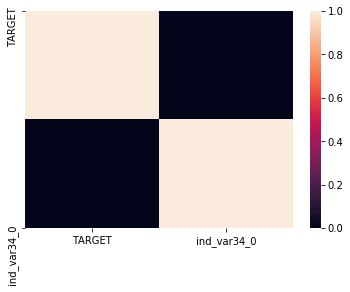

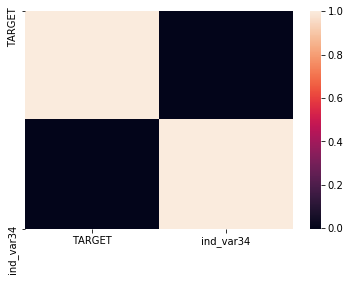

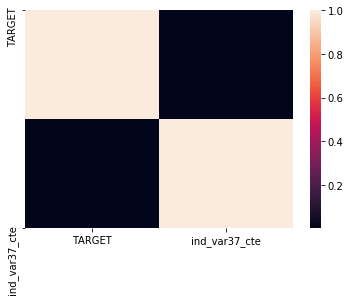

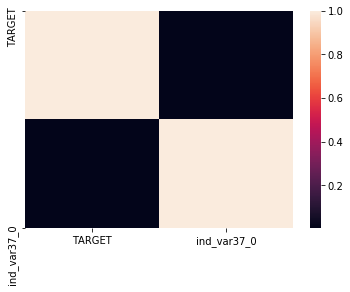

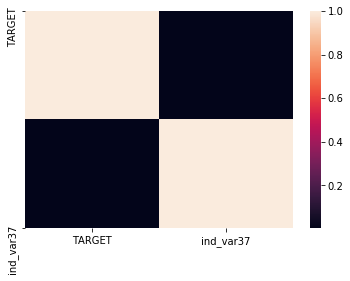

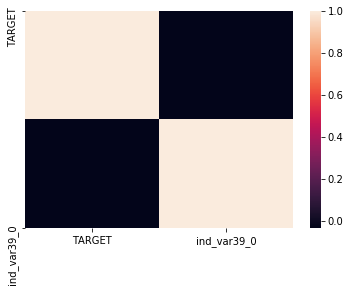

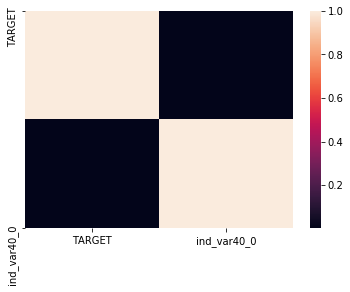

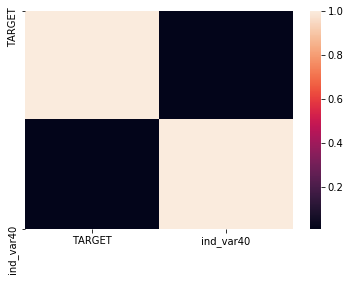

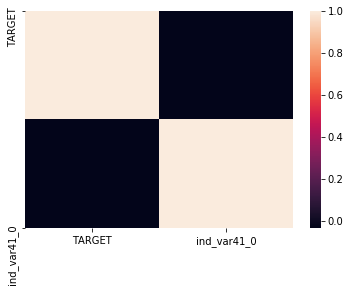

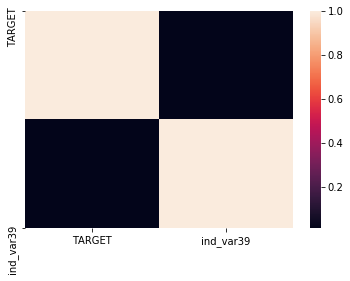

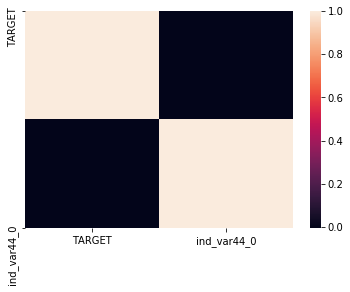

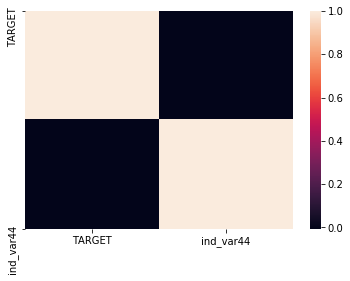

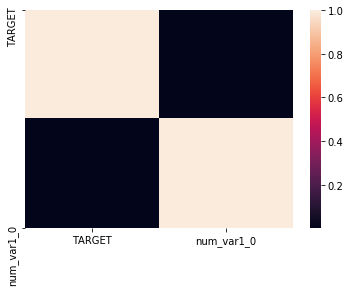

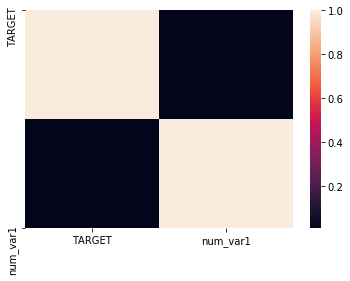

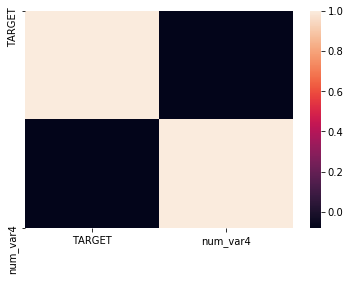

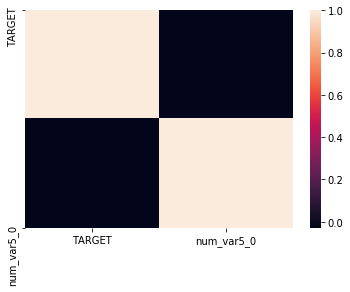

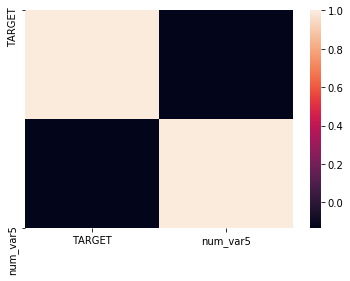

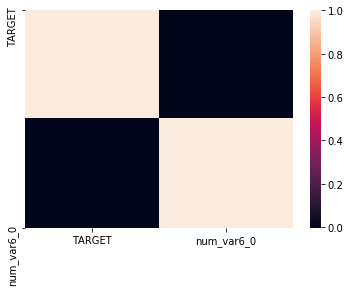

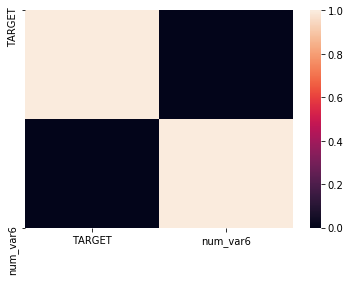

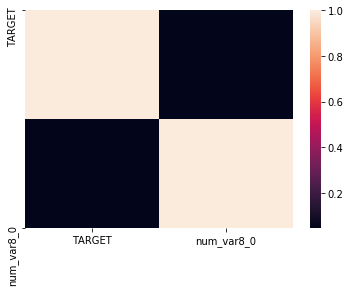

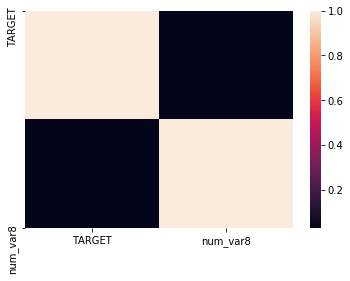

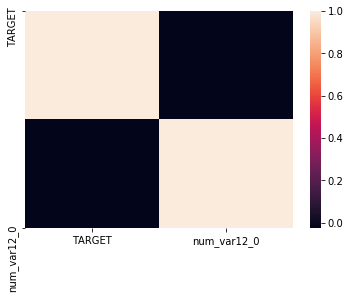

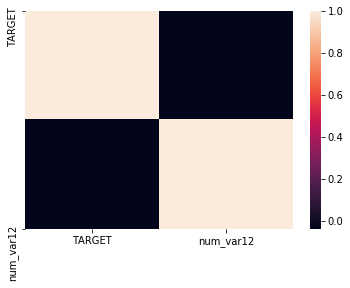

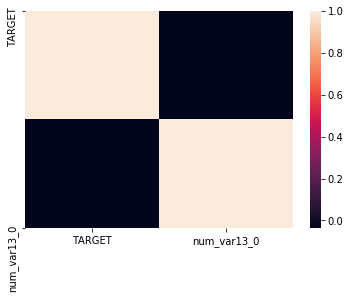

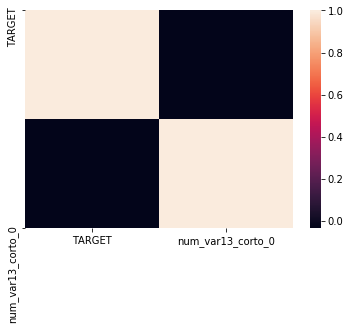

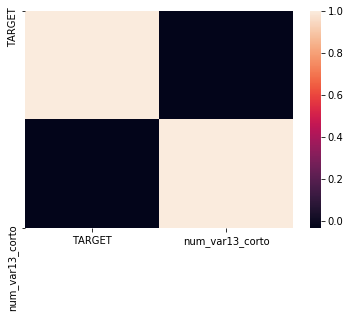

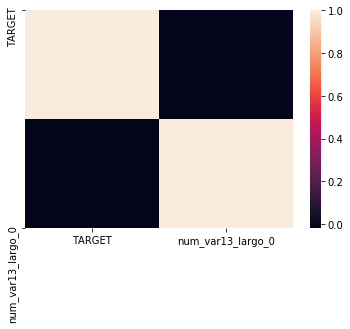

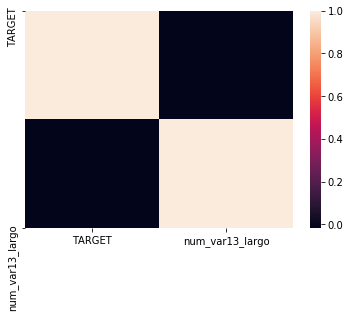

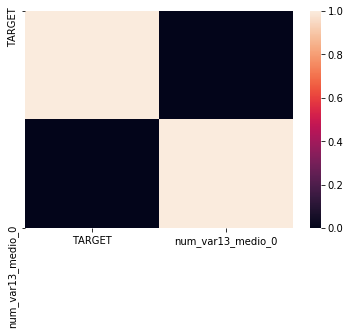

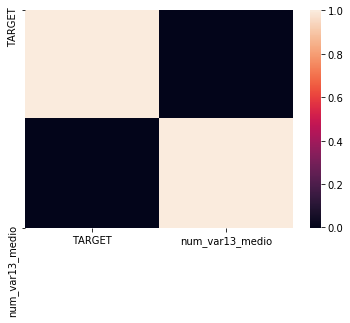

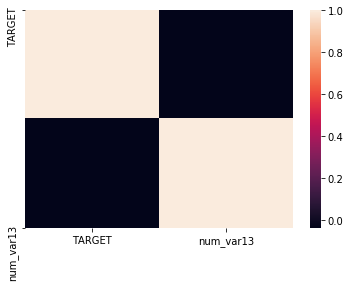

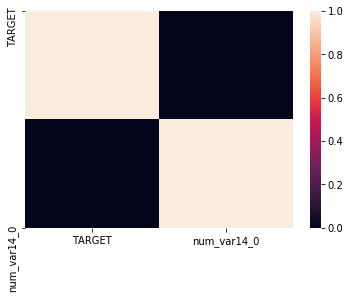

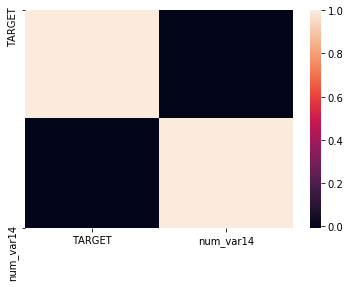

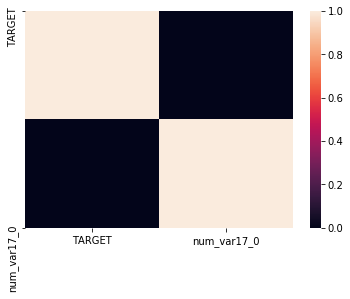

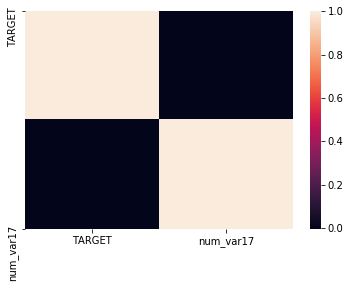

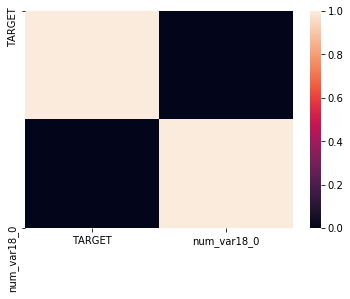

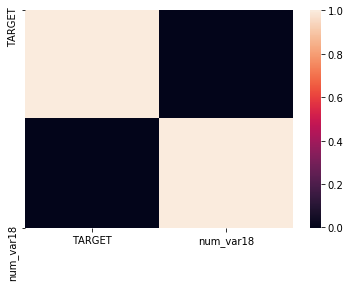

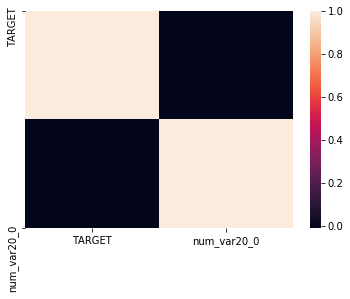

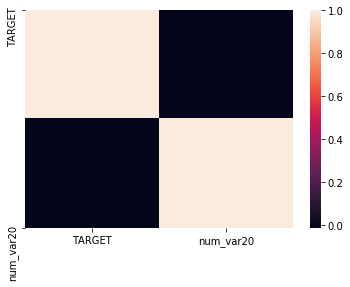

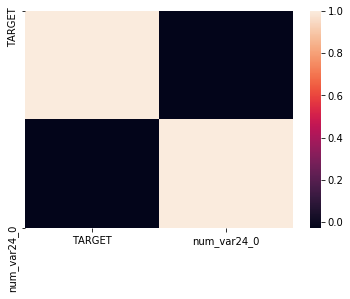

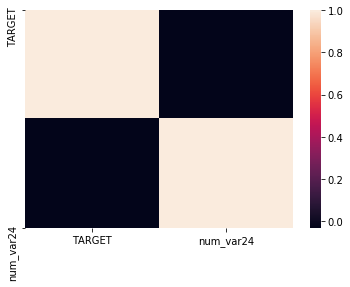

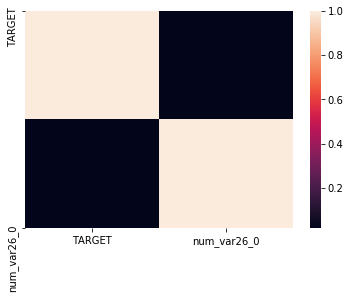

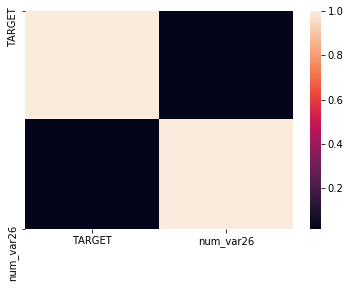

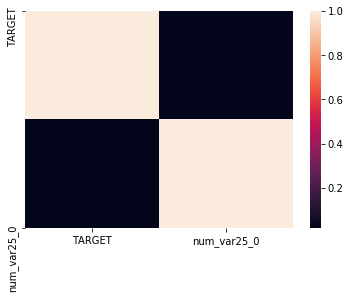

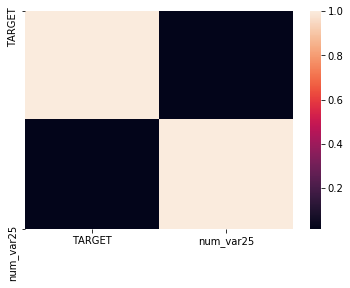

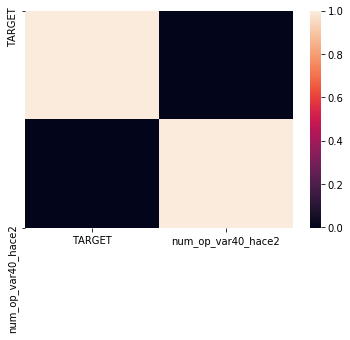

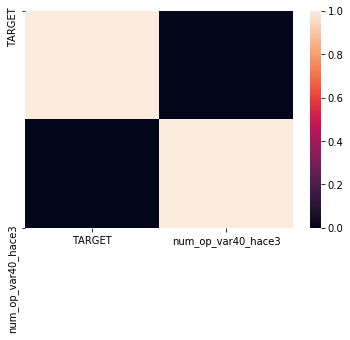

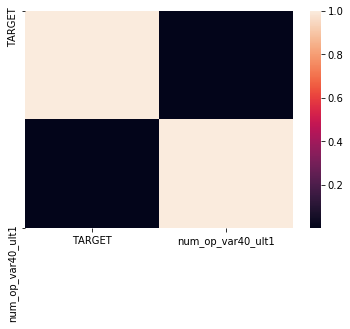

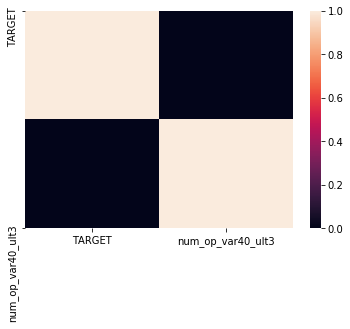

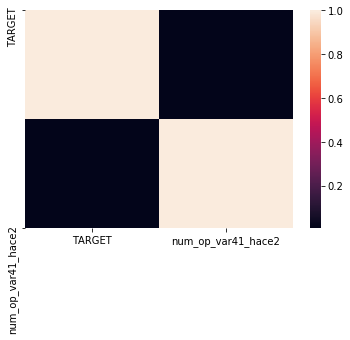

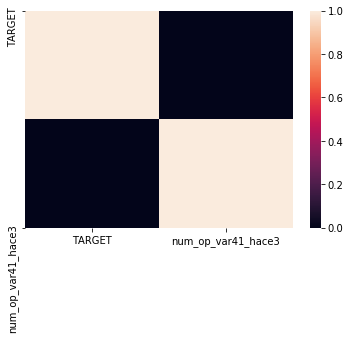

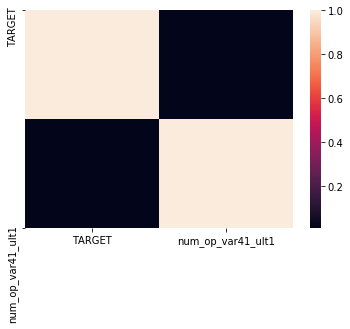

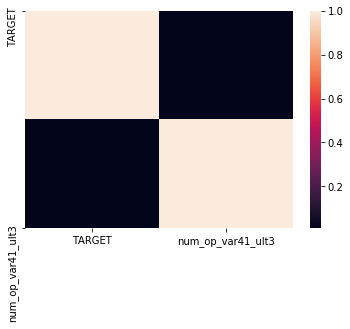

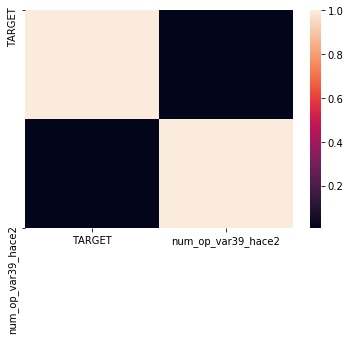

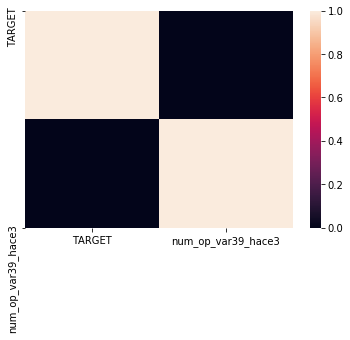

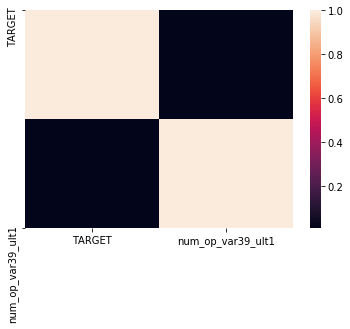

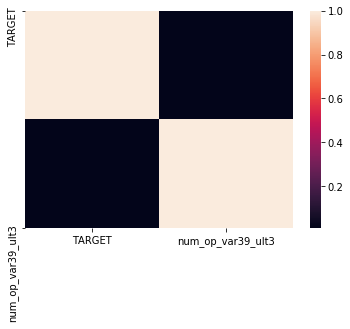

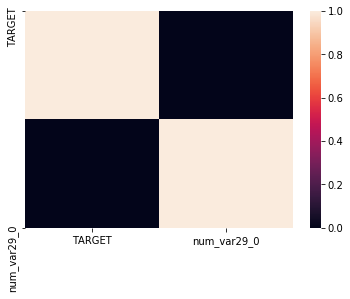

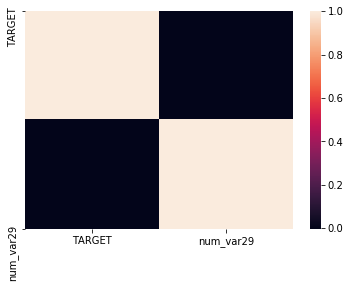

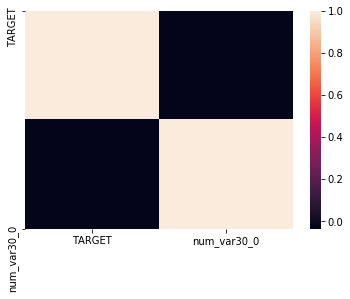

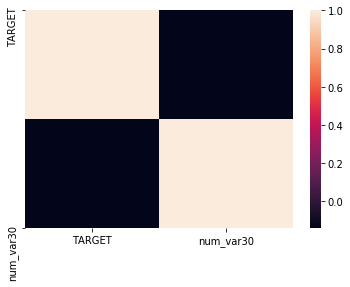

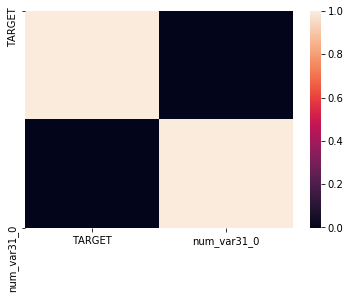

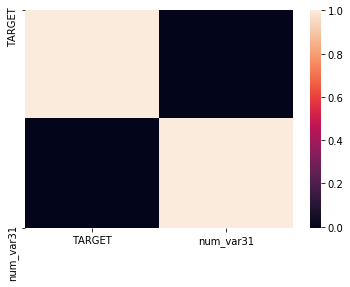

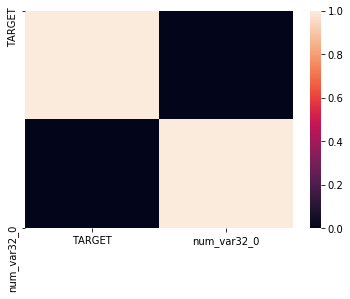

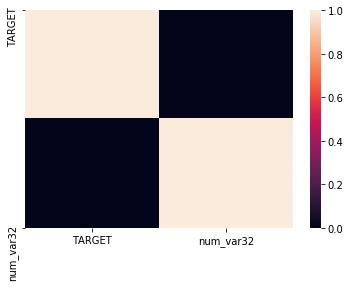

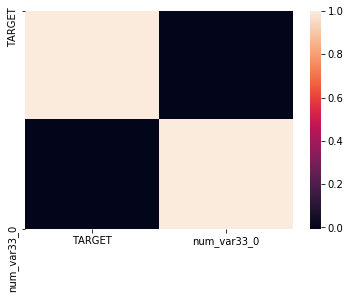

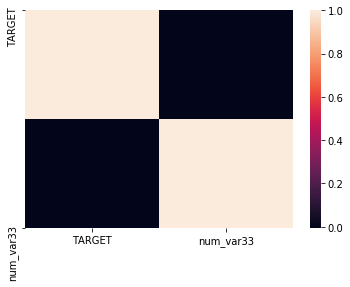

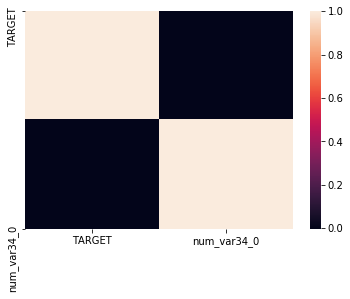

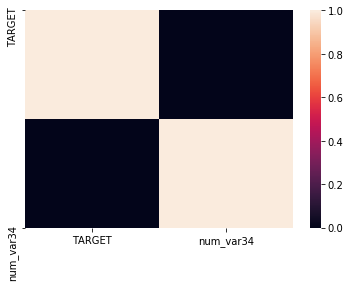

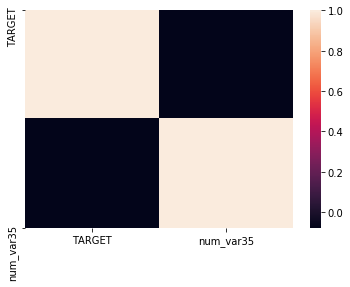

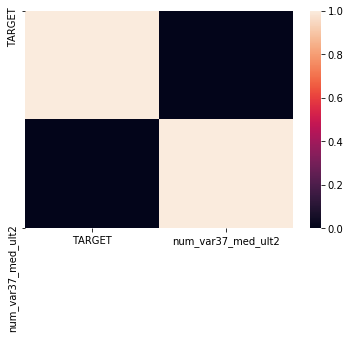

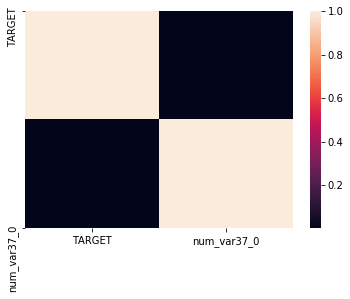

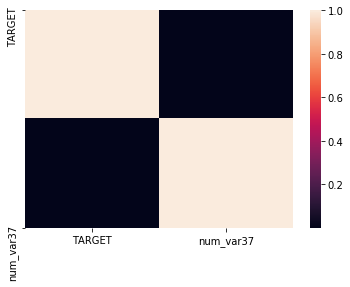

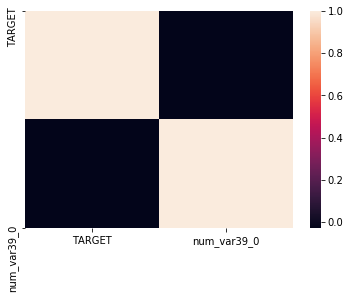

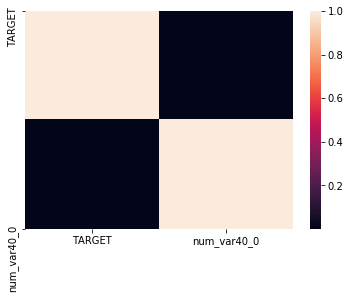

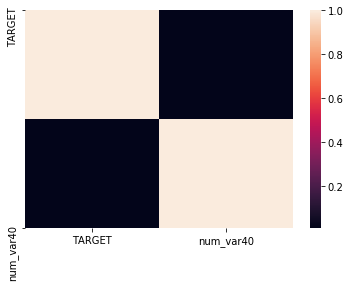

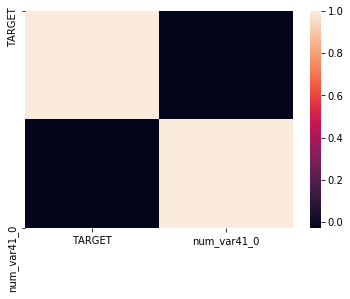

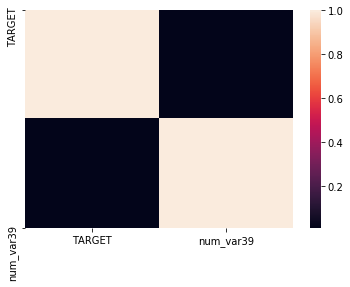

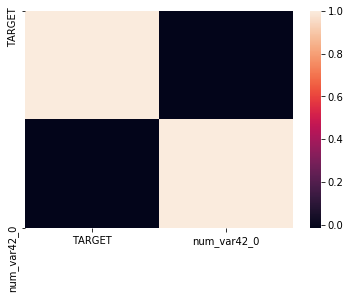

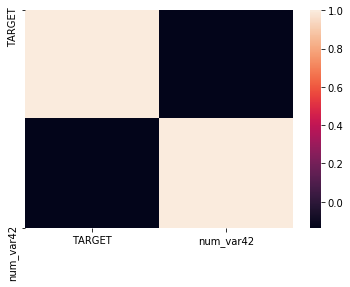

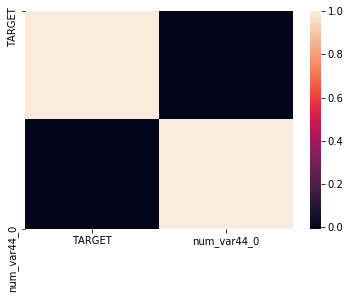

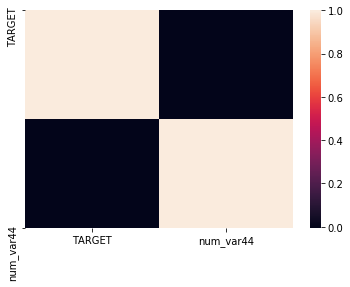

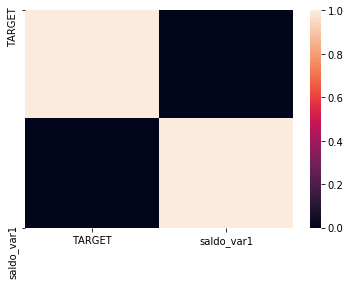

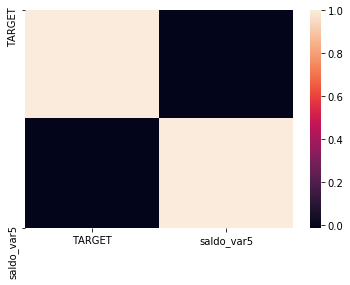

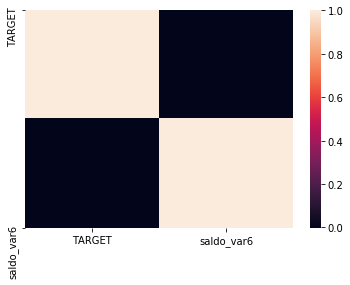

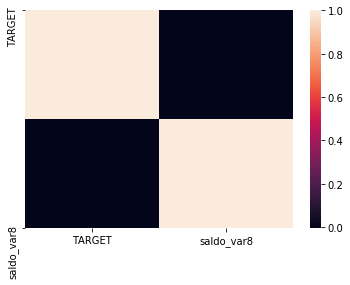

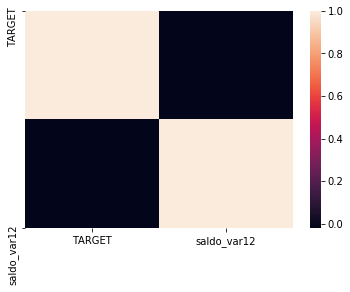

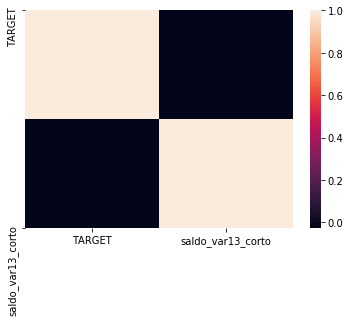

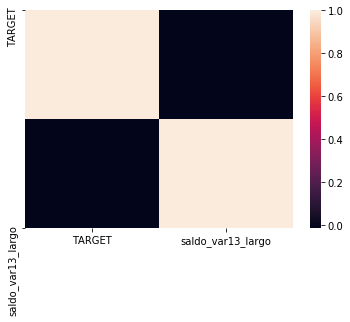

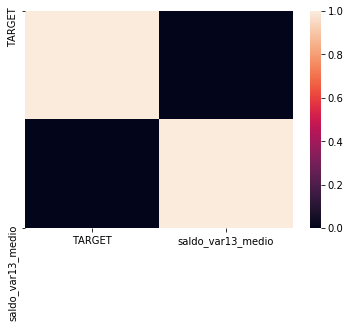

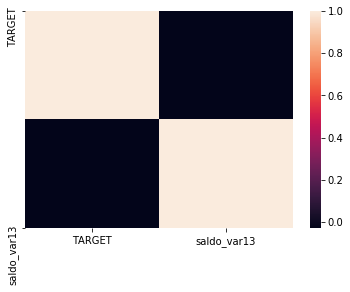

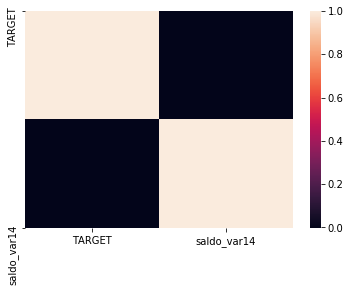

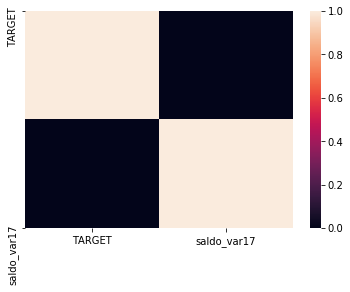

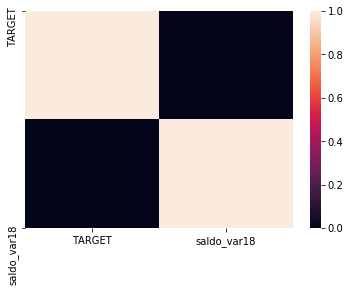

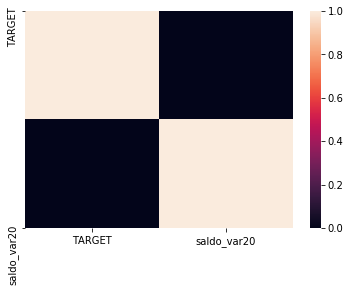

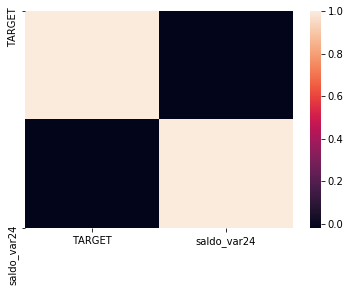

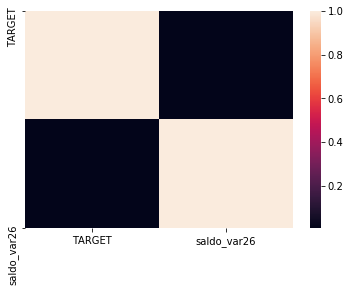

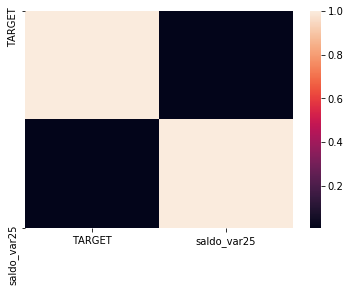

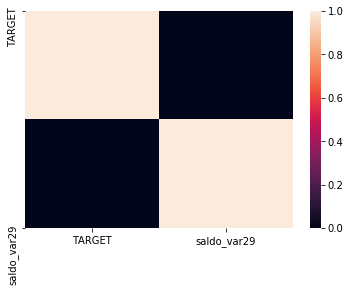

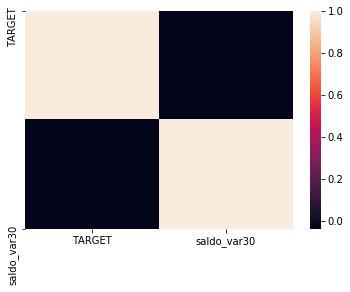

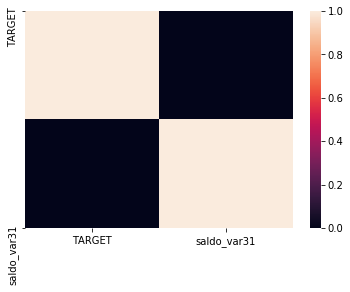

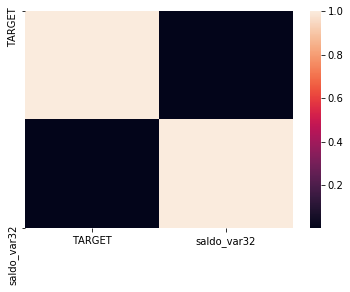

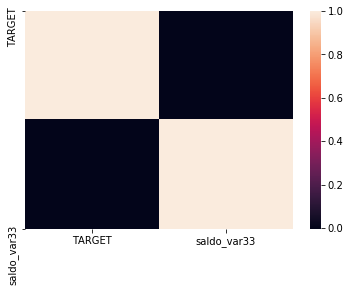

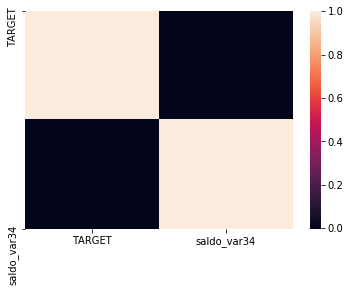

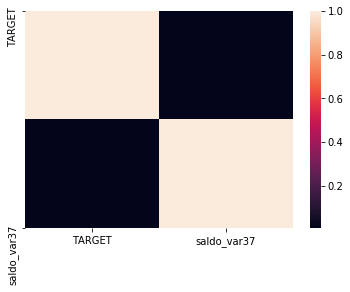

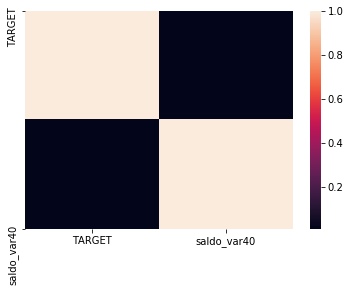

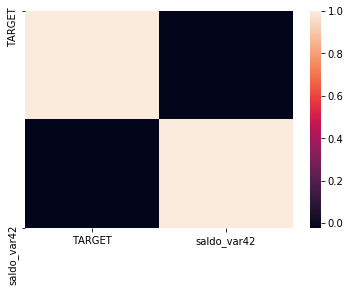

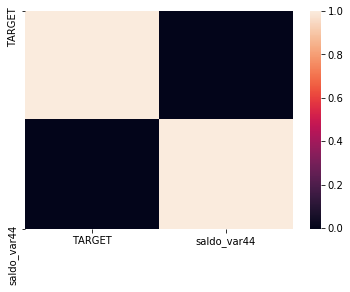

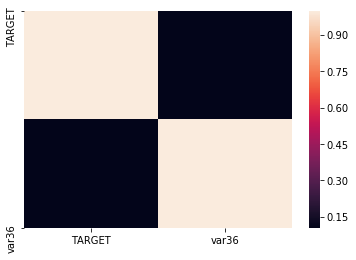

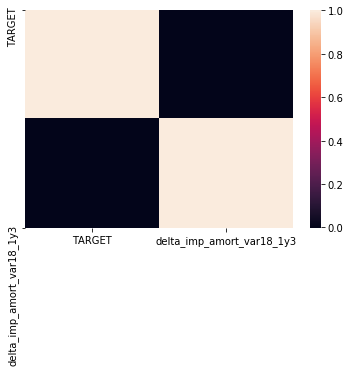

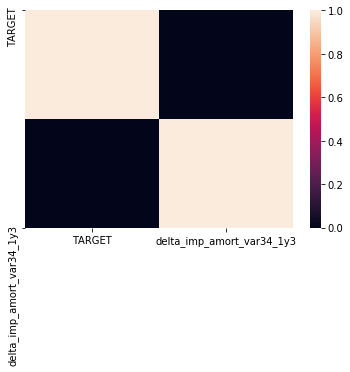

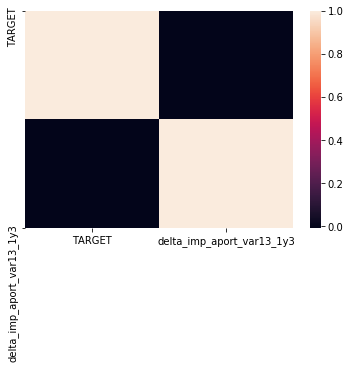

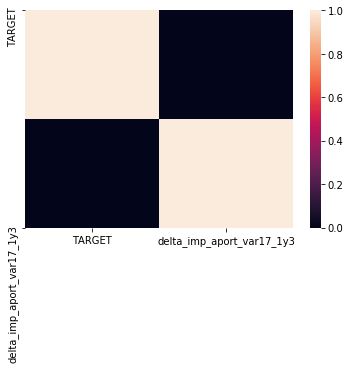

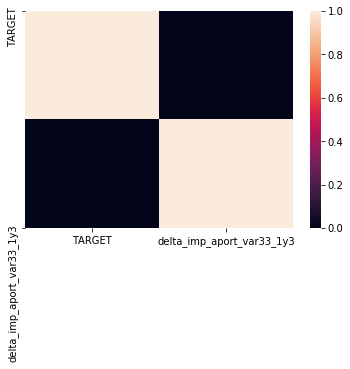

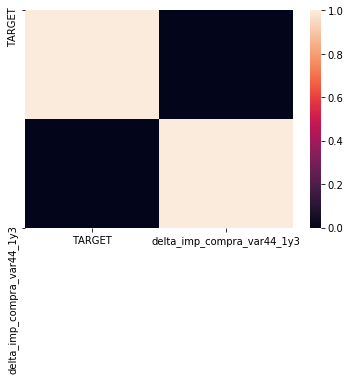

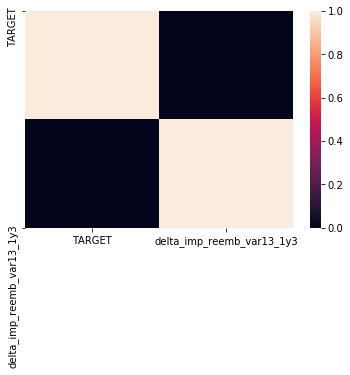

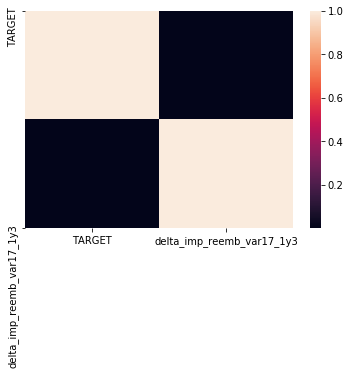

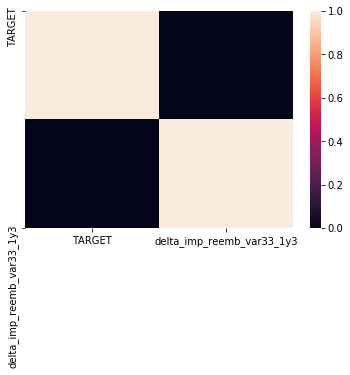

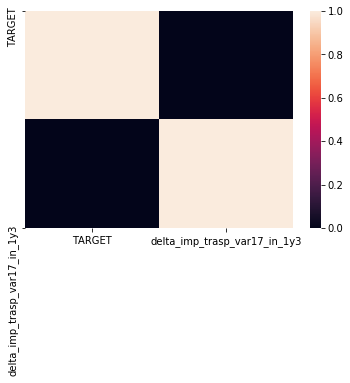

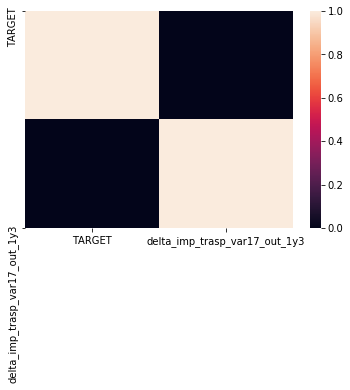

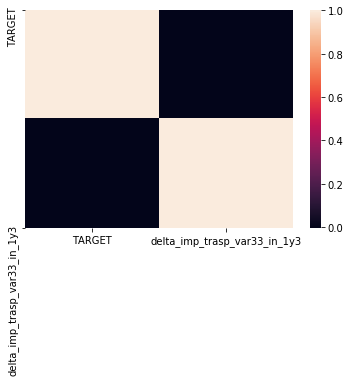

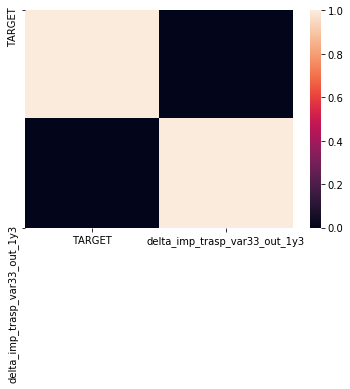

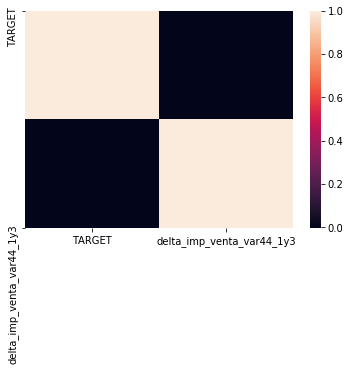

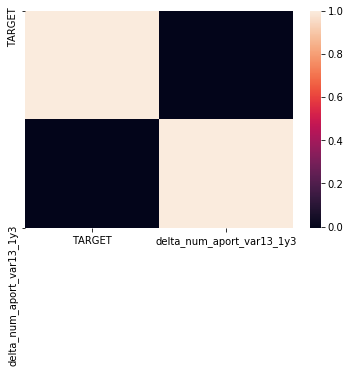

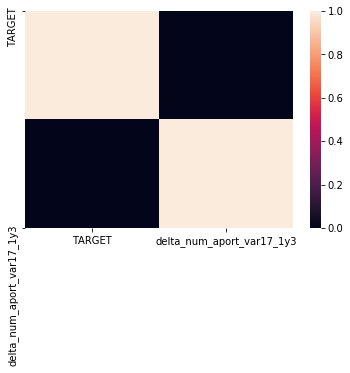

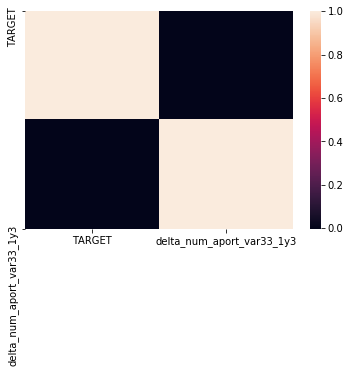

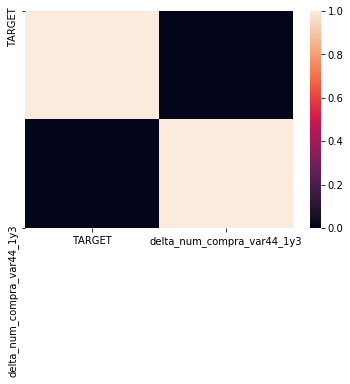

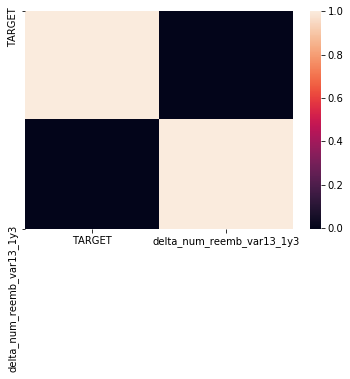

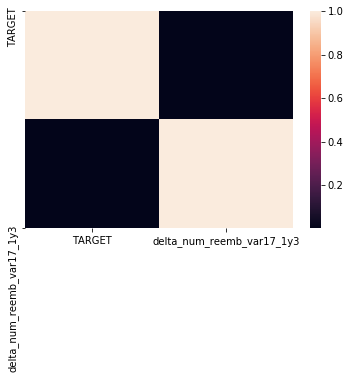

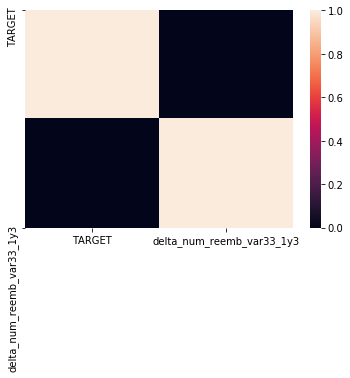

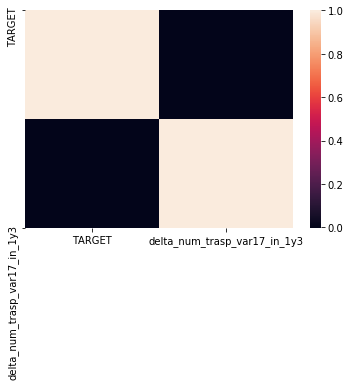

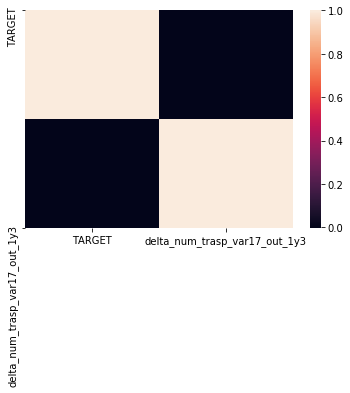

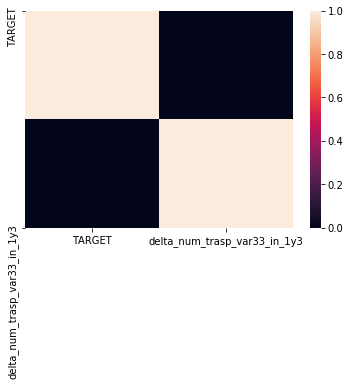

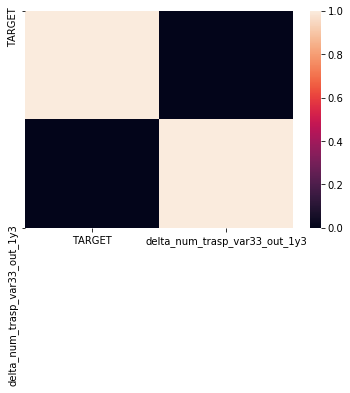

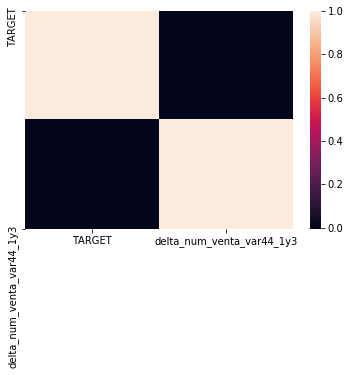

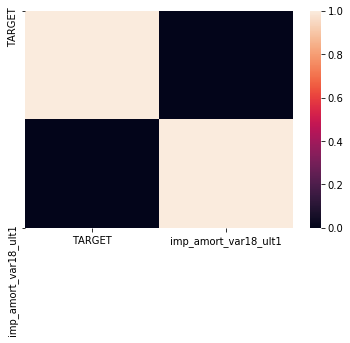

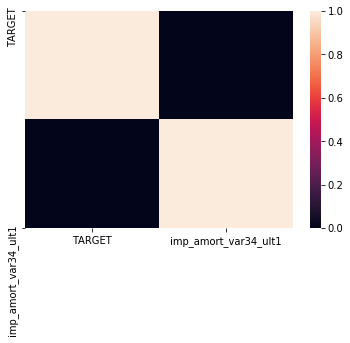

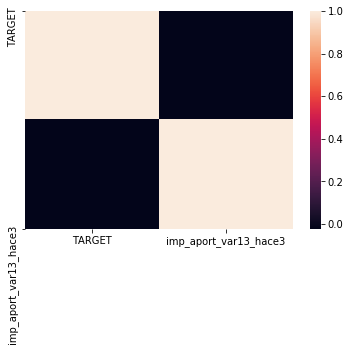

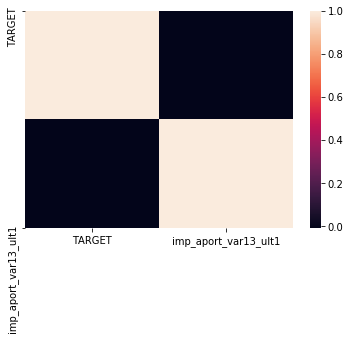

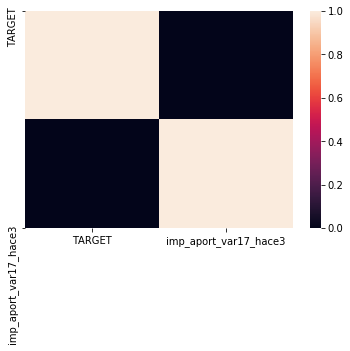

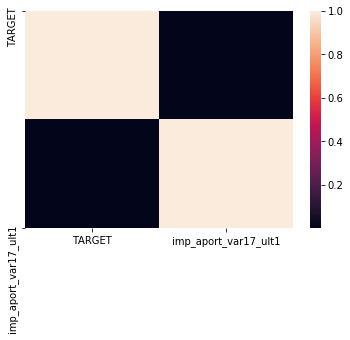

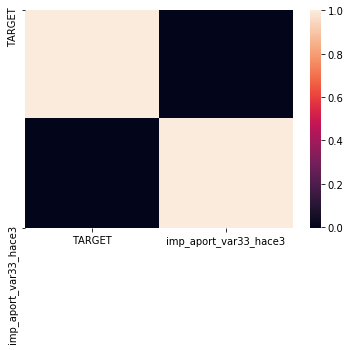

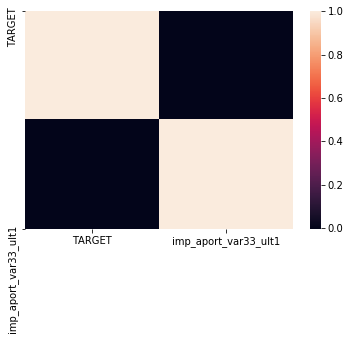

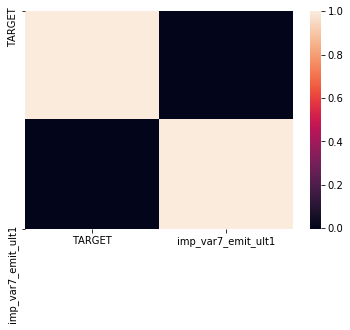

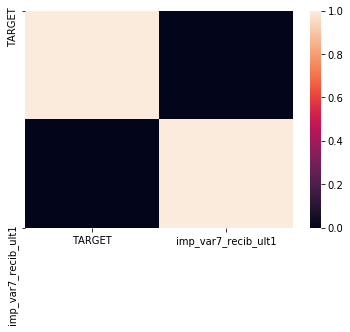

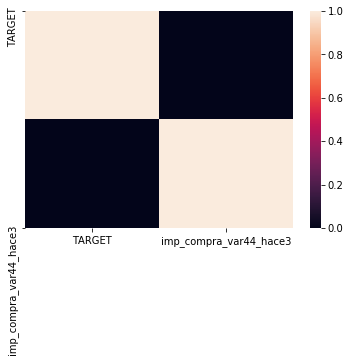

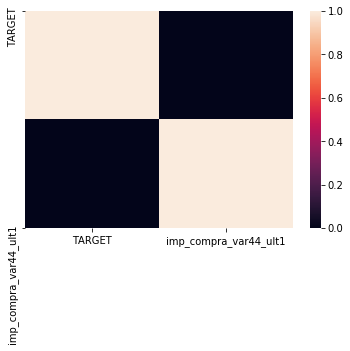

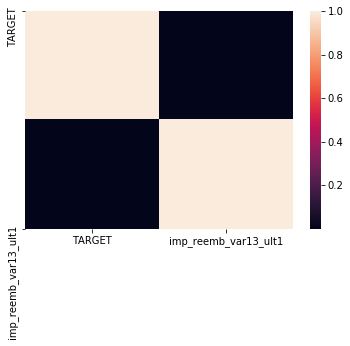

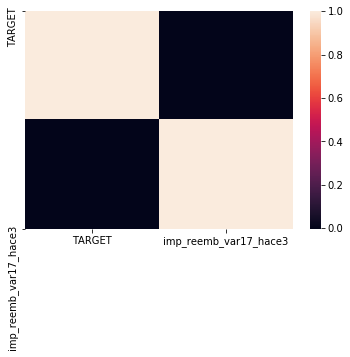

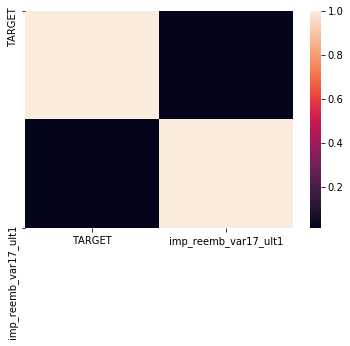

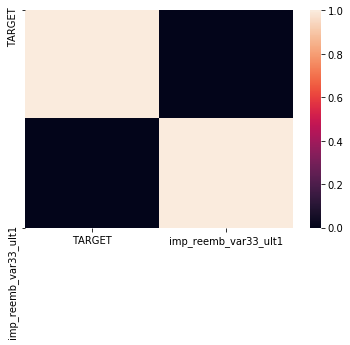

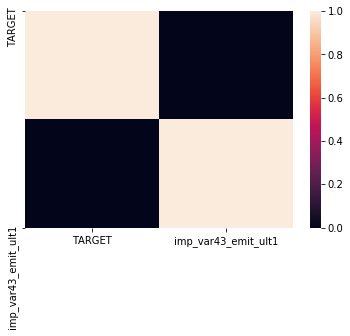

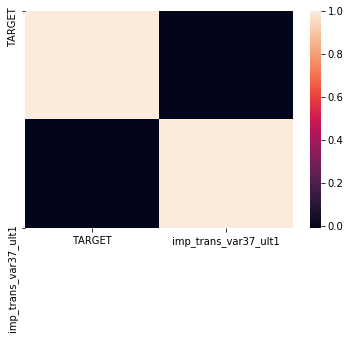

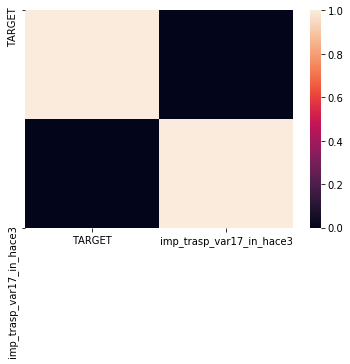

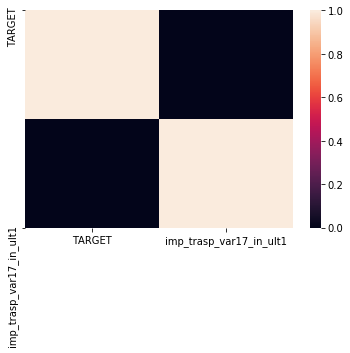

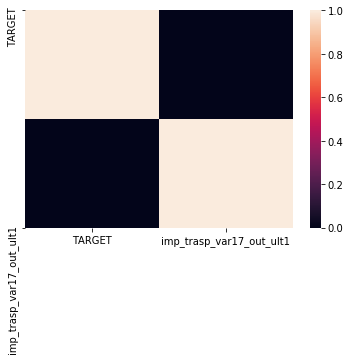

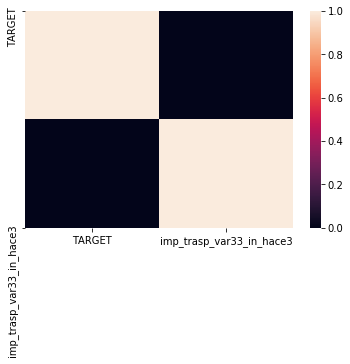

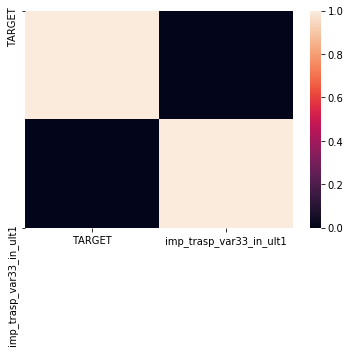

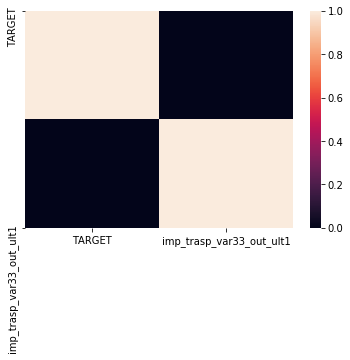

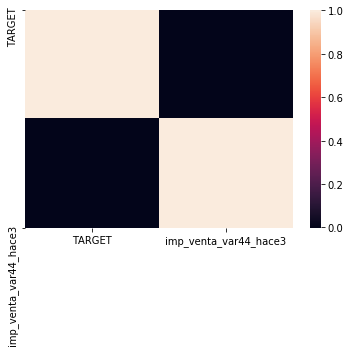

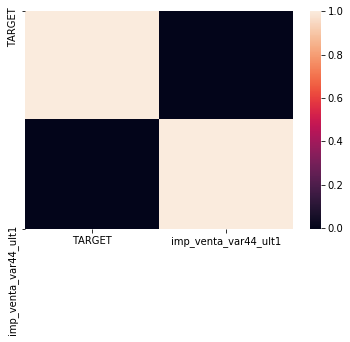

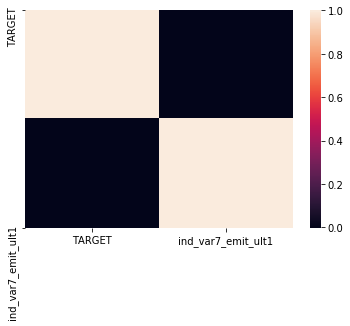

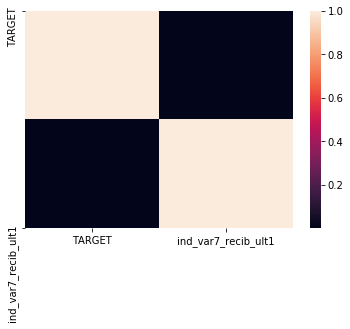

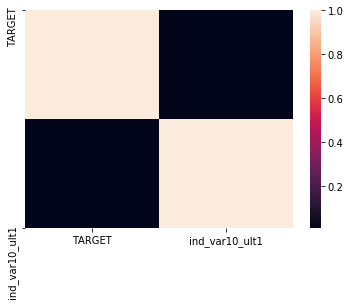

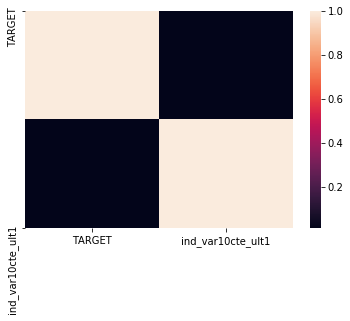

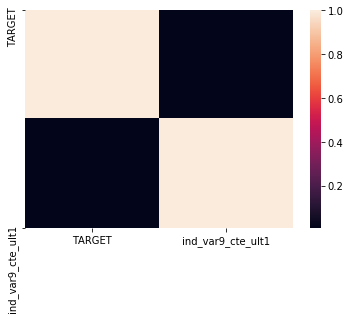

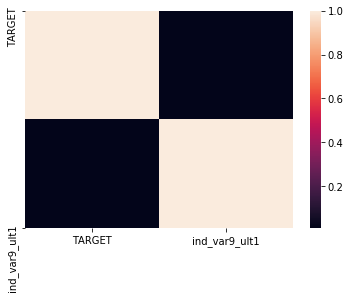

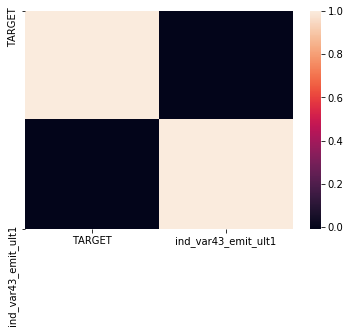

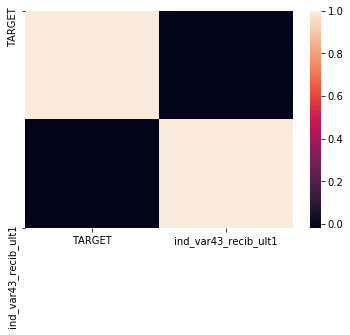

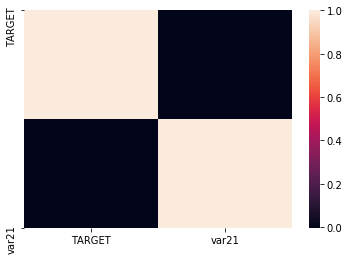

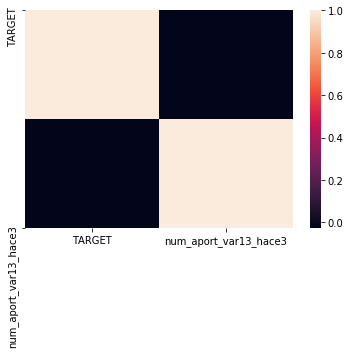

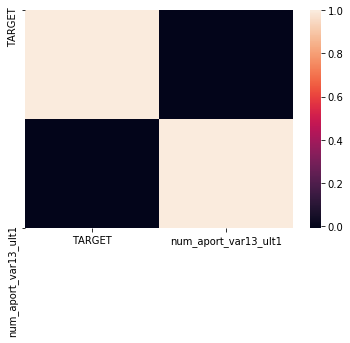

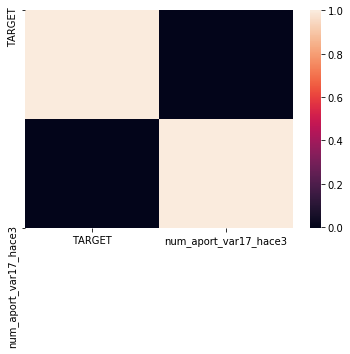

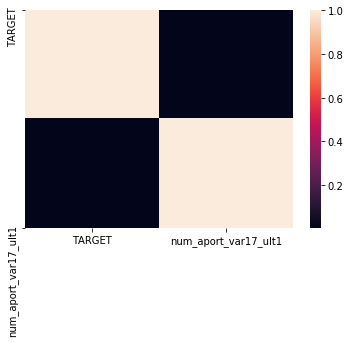

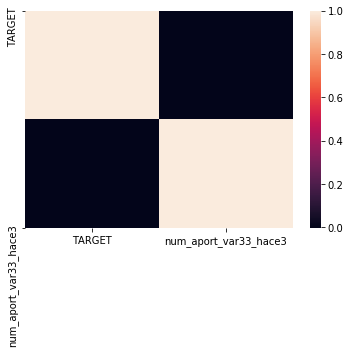

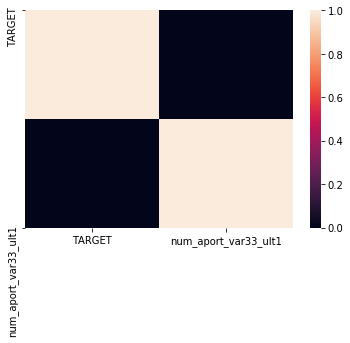

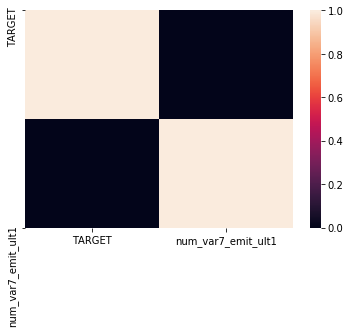

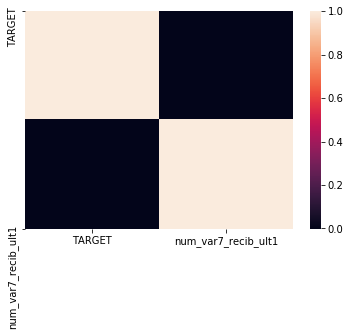

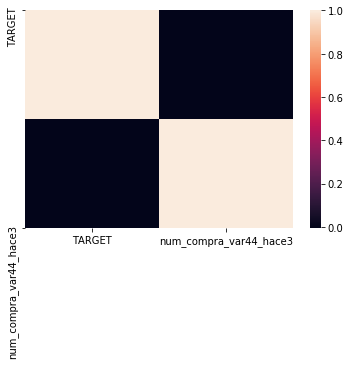

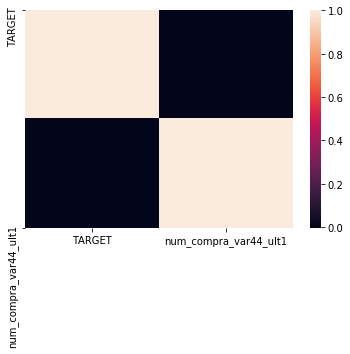

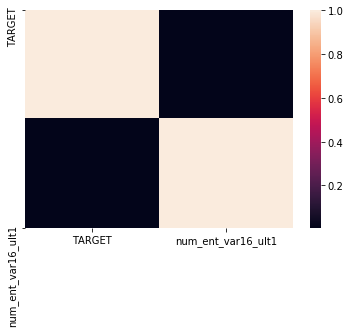

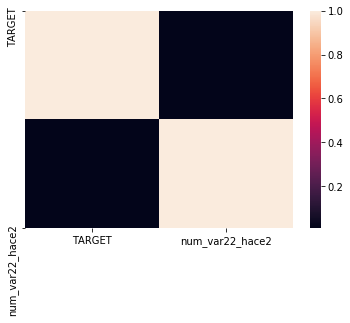

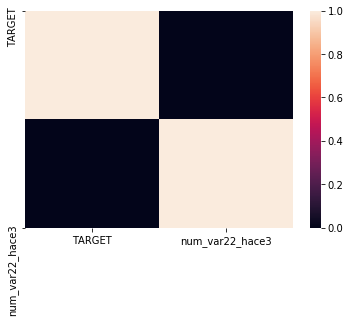

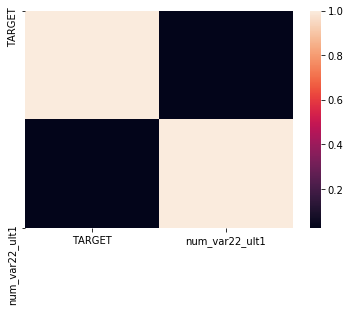

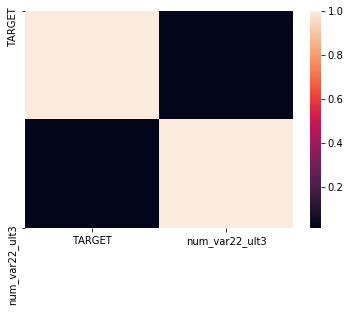

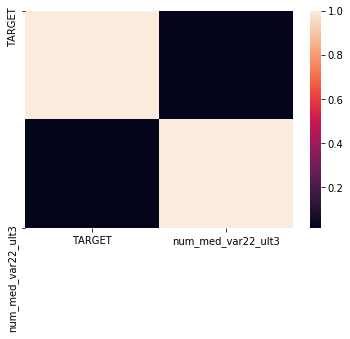

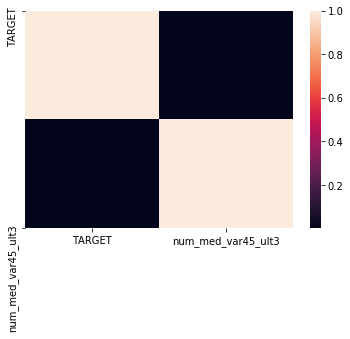

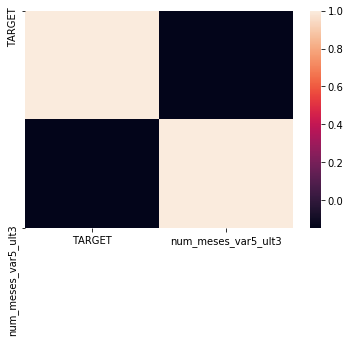

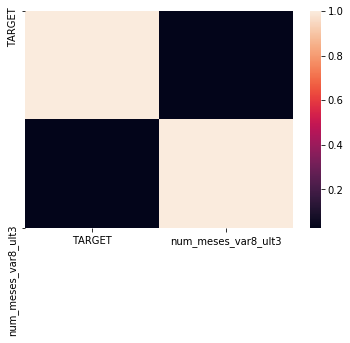

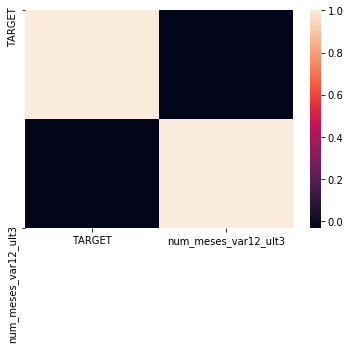

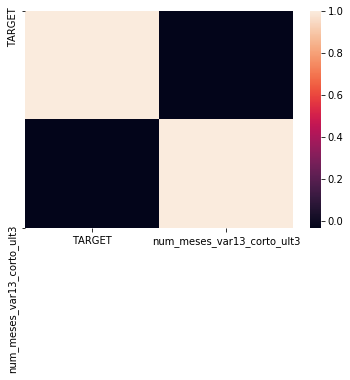

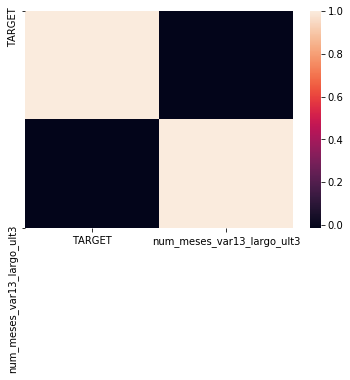

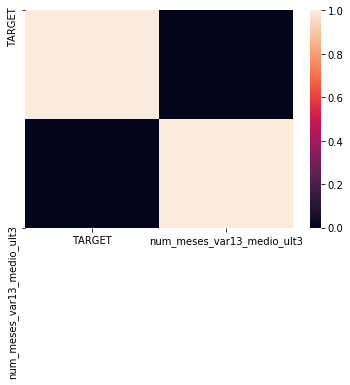

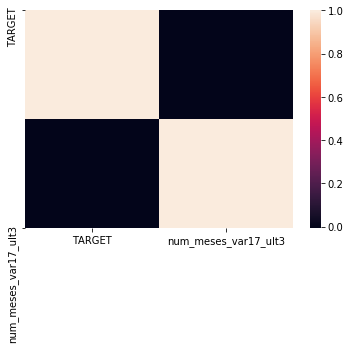

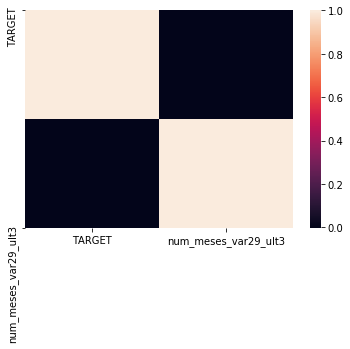

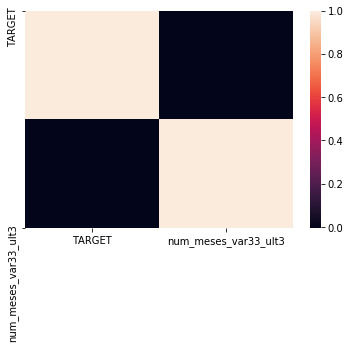

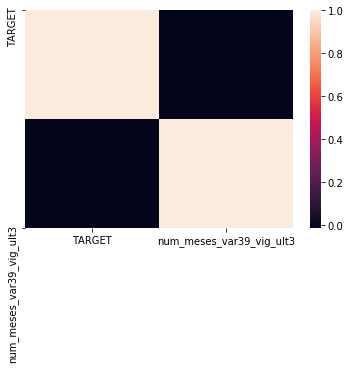

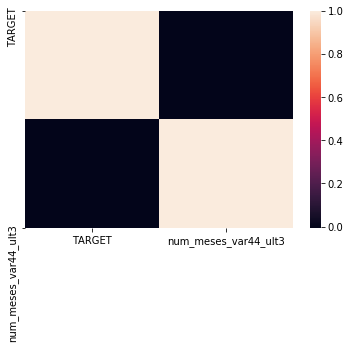

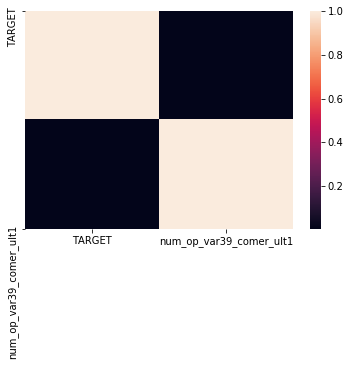

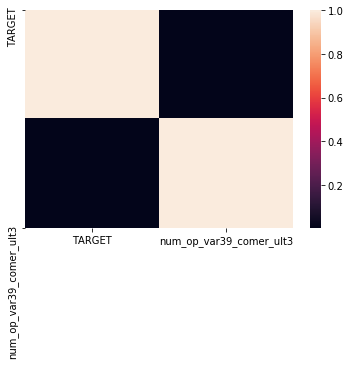

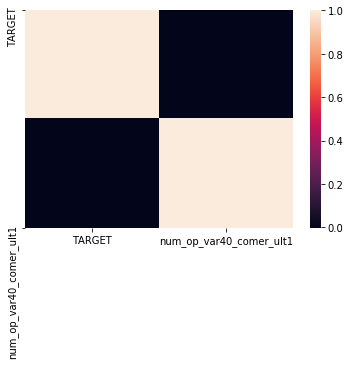

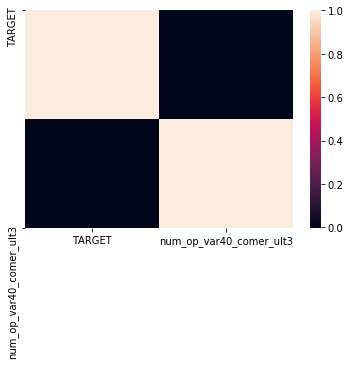

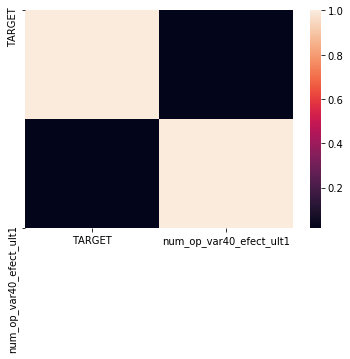

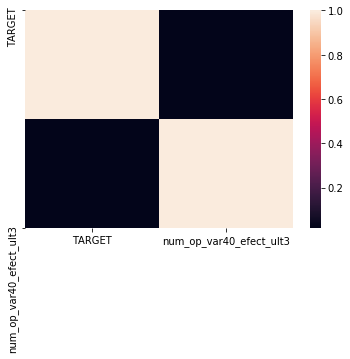

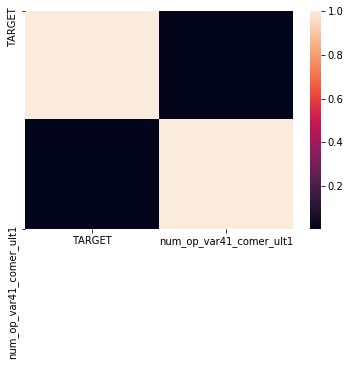

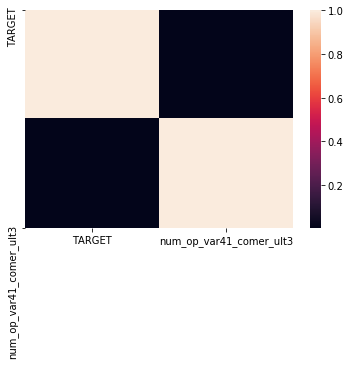

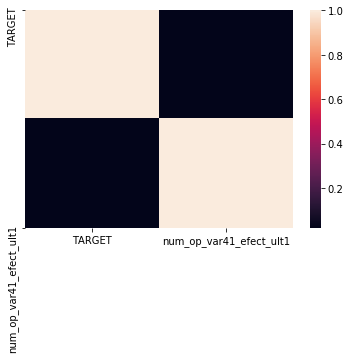

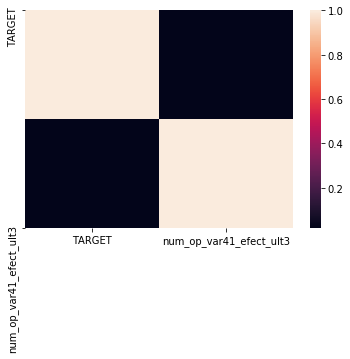

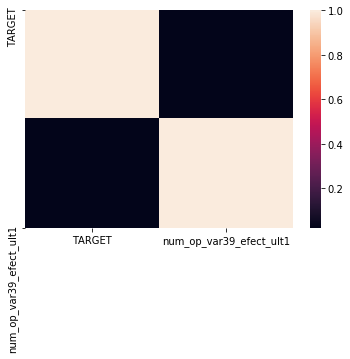

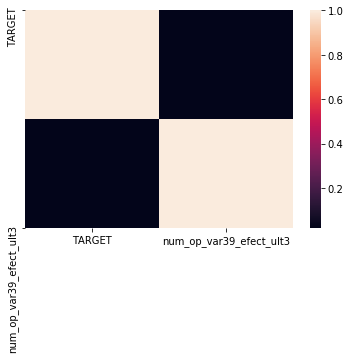

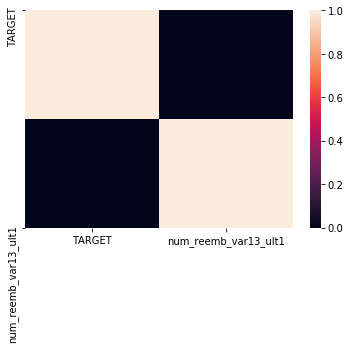

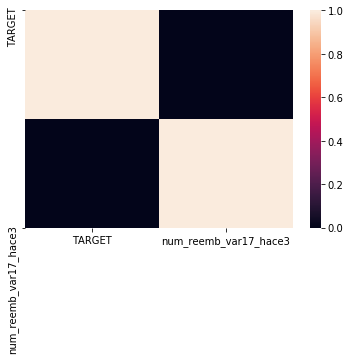

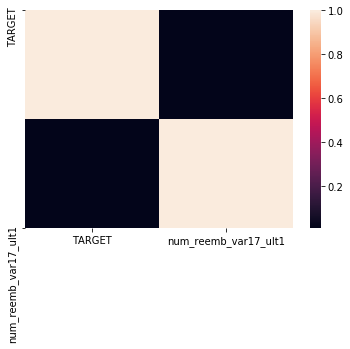

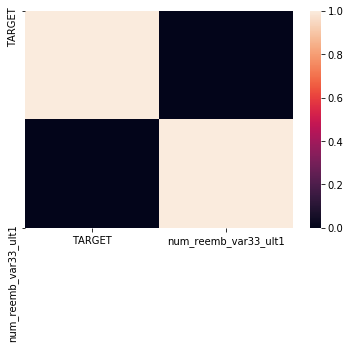

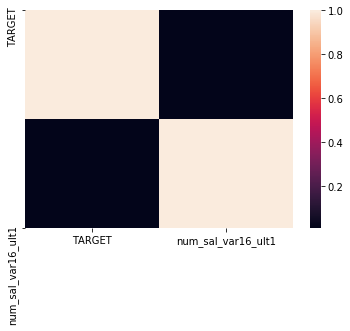

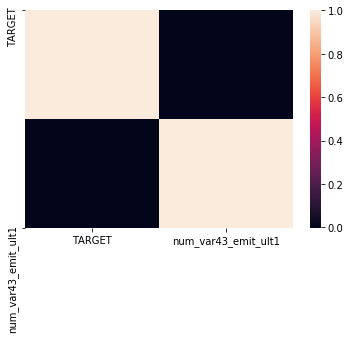

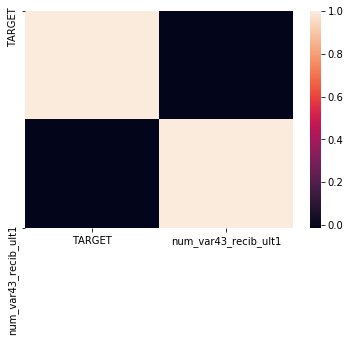

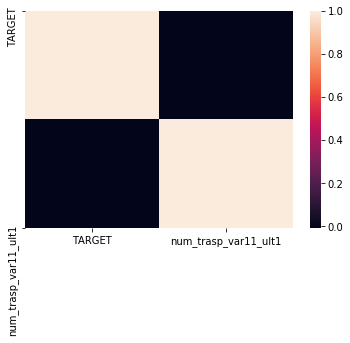

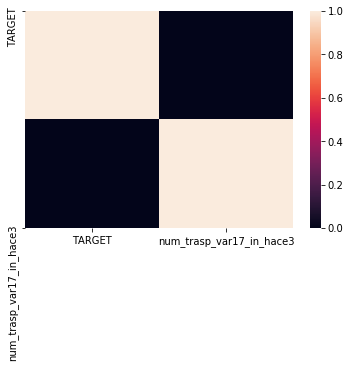

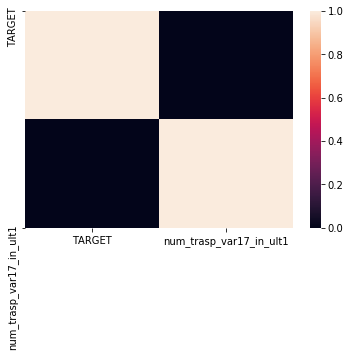

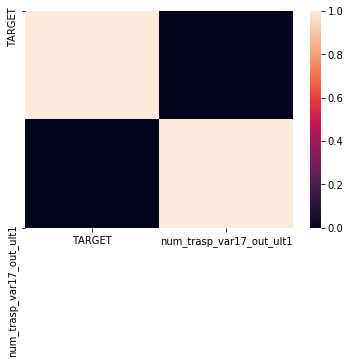

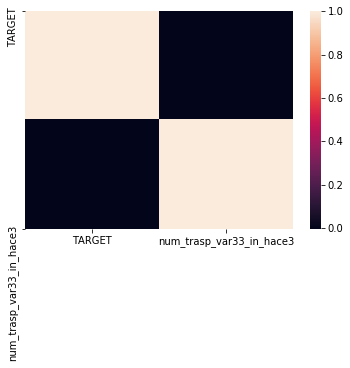

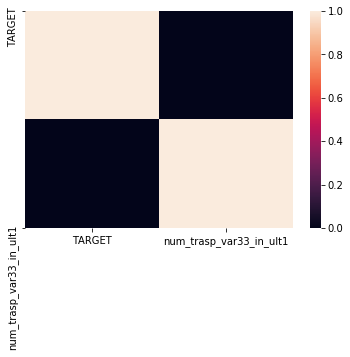

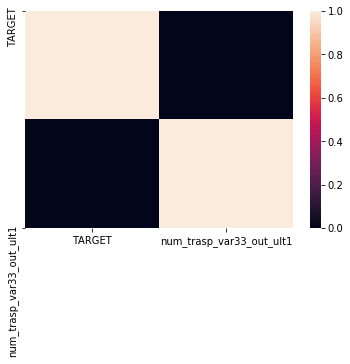

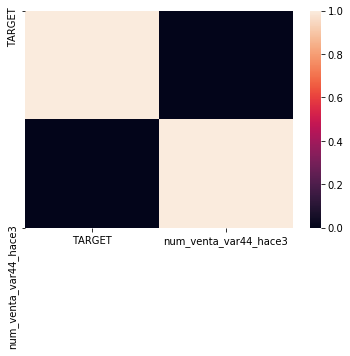

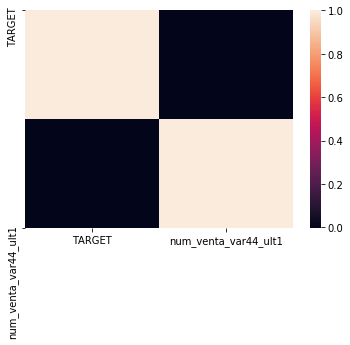

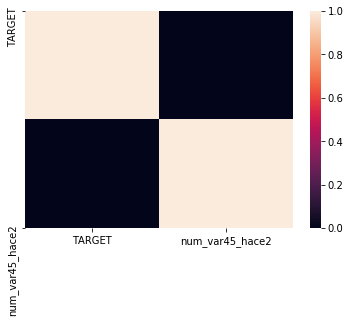

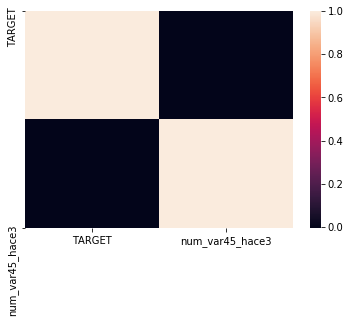

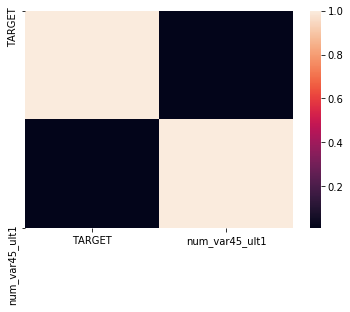

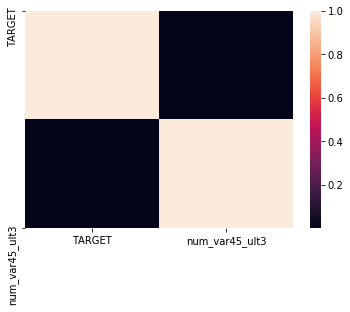

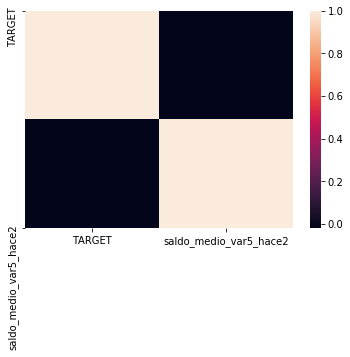

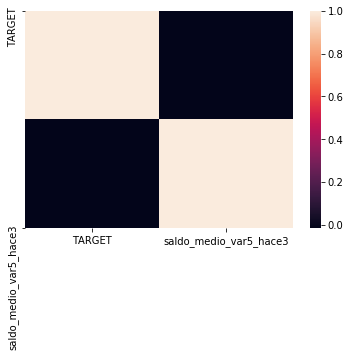

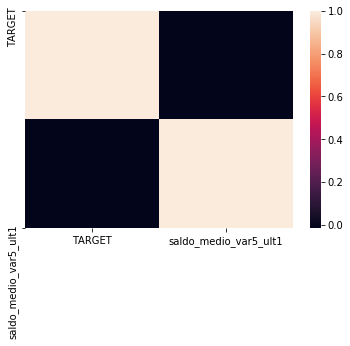

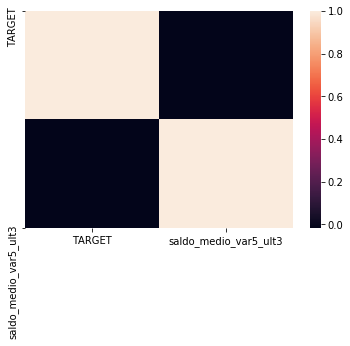

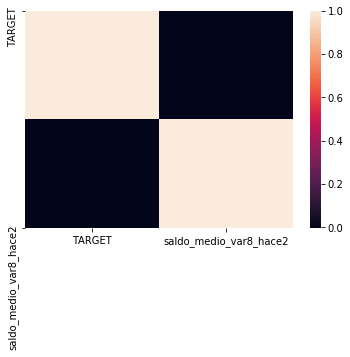

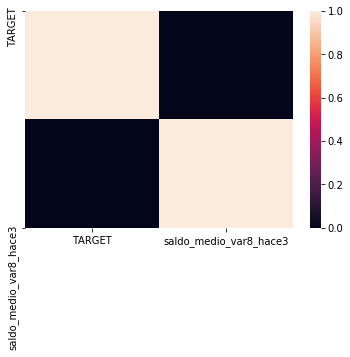

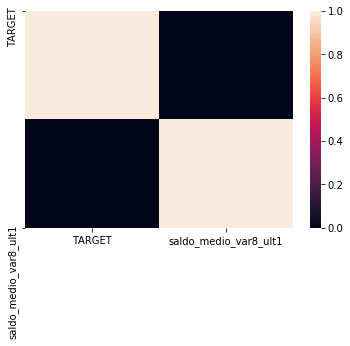

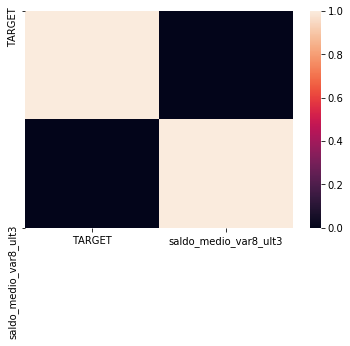

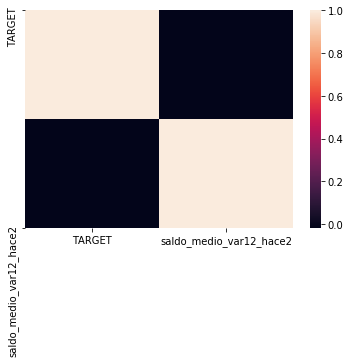

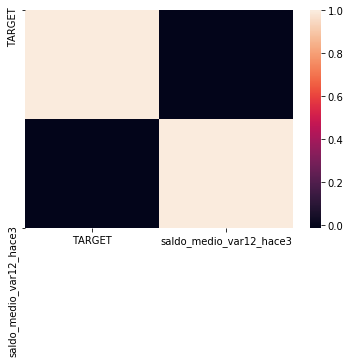

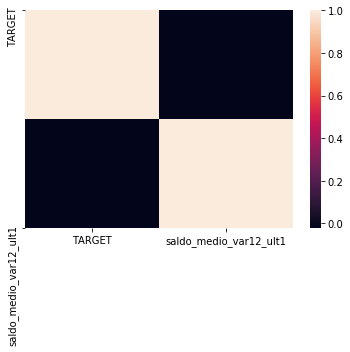

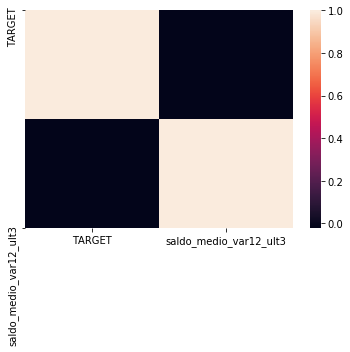

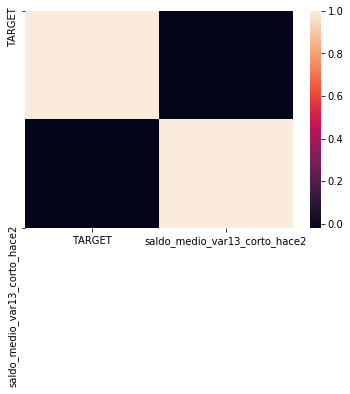

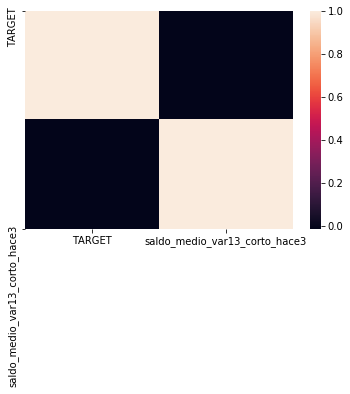

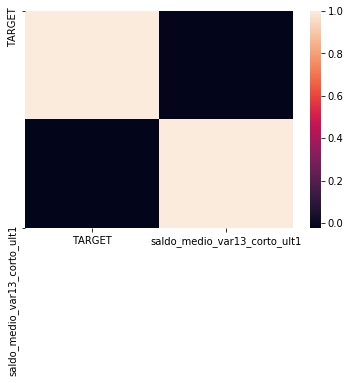

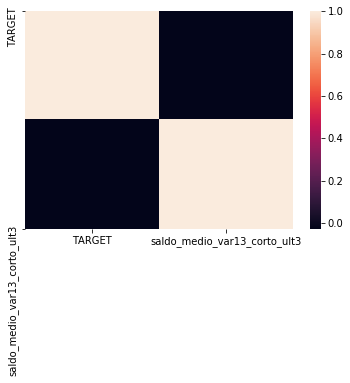

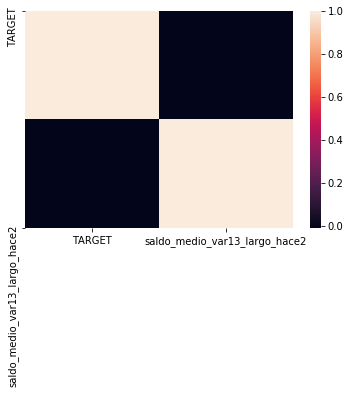

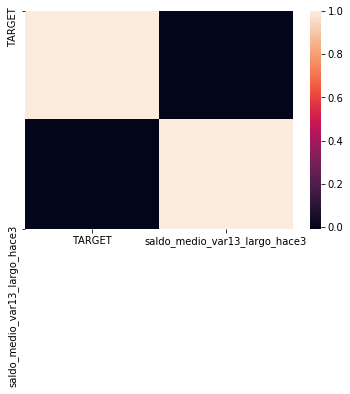

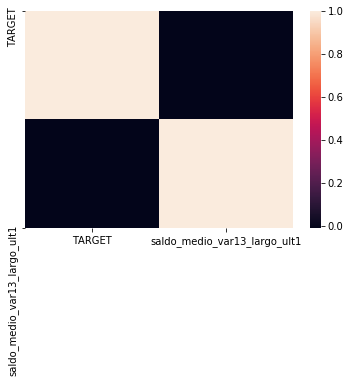

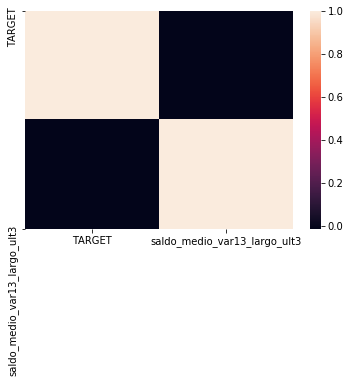

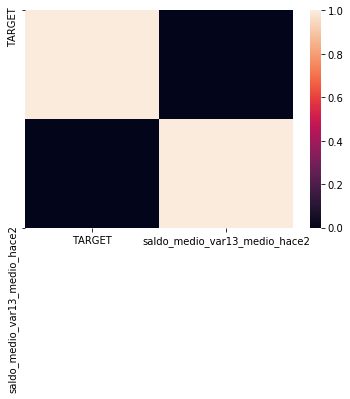

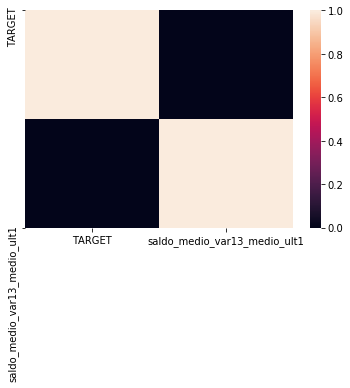

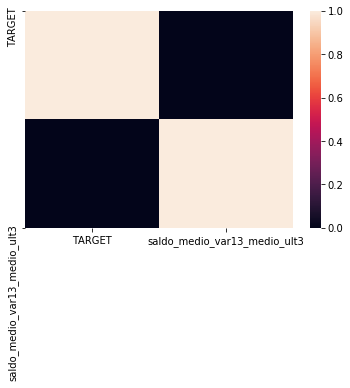

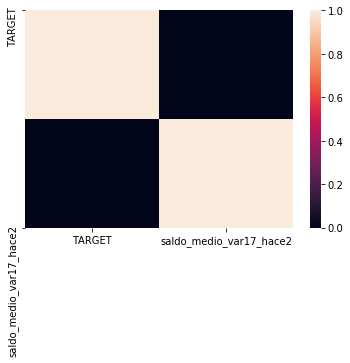

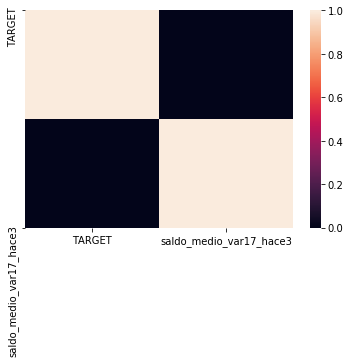

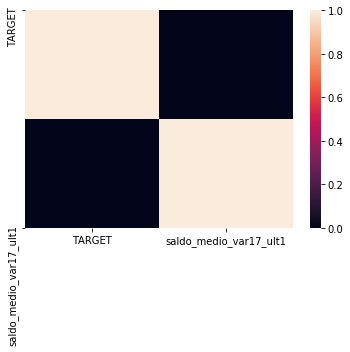

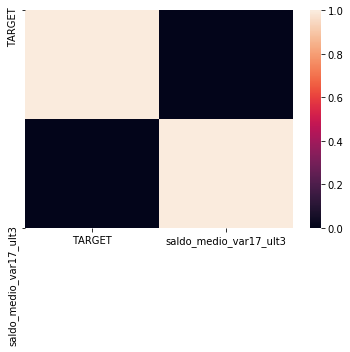

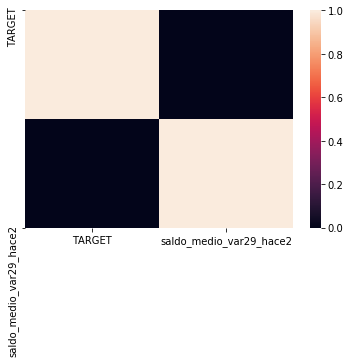

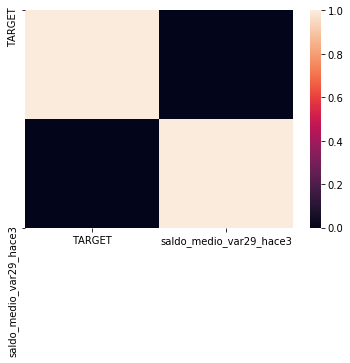

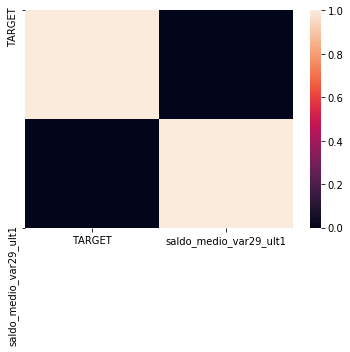

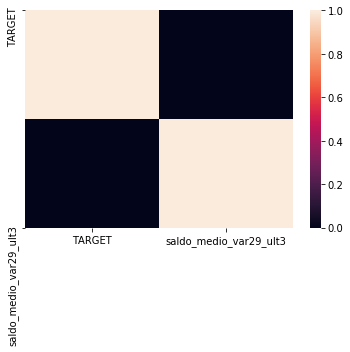

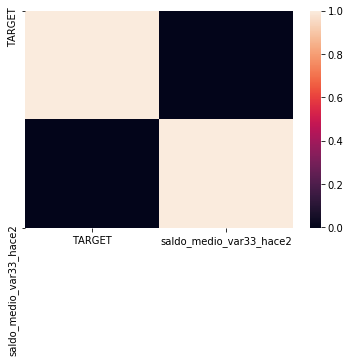

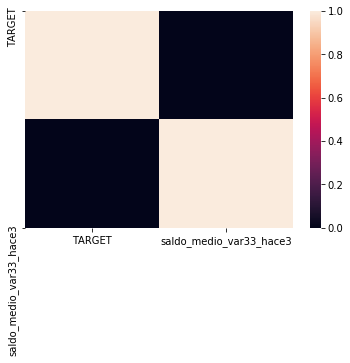

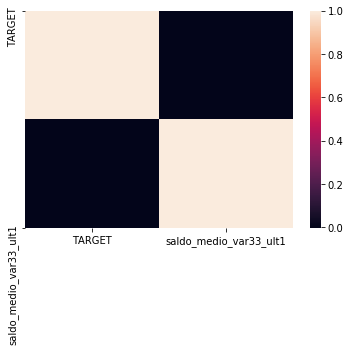

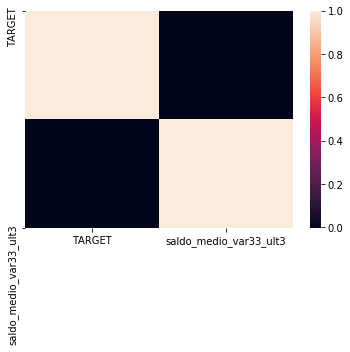

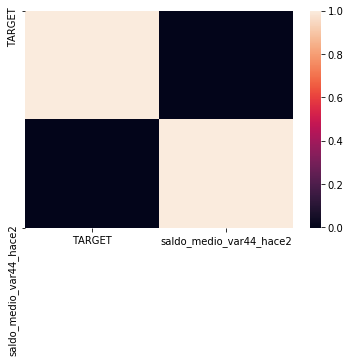

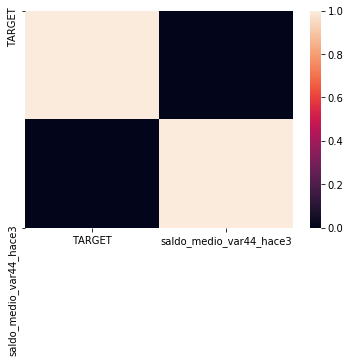

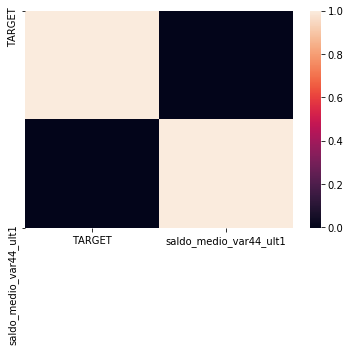

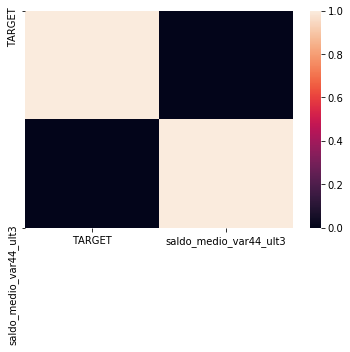

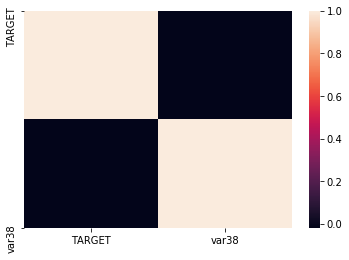

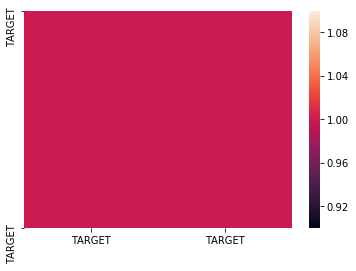

In [37]:
#Verificando correlação das variaveis com a variavel TARGET
for col in dados_treino.columns:
    sns.heatmap(dados_treino[['TARGET', col]].corr())
    plt.show()

In [17]:
qtd_col = len(dados_treino.columns)-1

In [18]:
qtd_col

335

In [19]:
#O dataset possui uma alta dimensionalidade, além dos dados precisarem normalização

#Normalizando os dados
#Transformando os dados para a mesma escala (entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler

# Separando o array em componentes de input (X) e output (Y) target
X = dados_treino.values[: , 0:qtd_col]
Y = dados_treino.values[: , qtd_col]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados_treino.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[2.00000000e+00 2.30000000e+01 0.00000000e+00 ... 0.00000000e+00
  3.92051700e+04 0.00000000e+00]
 [2.00000000e+00 3.40000000e+01 0.00000000e+00 ... 0.00000000e+00
  4.92780300e+04 0.00000000e+00]
 [2.00000000e+00 2.30000000e+01 0.00000000e+00 ... 0.00000000e+00
  6.73337700e+04 0.00000000e+00]
 ...
 [2.00000000e+00 2.30000000e+01 0.00000000e+00 ... 0.00000000e+00
  7.40281500e+04 0.00000000e+00]
 [2.00000000e+00 2.50000000e+01 0.00000000e+00 ... 0.00000000e+00
  8.42781600e+04 0.00000000e+00]
 [2.00000000e+00 4.60000000e+01 0.00000000e+00 ... 0.00000000e+00
  1.17310979e+05 0.00000000e+00]]

Dados Normalizados: 

 [[0.99976406 0.18       0.         ... 0.         0.         0.00154526]
 [0.99976406 0.29       0.         ... 0.         0.         0.0020025 ]
 [0.99976406 0.18       0.         ... 0.         0.         0.00282212]
 ...
 [0.99976406 0.18       0.         ... 0.         0.         0.003126  ]
 [0.99976406 0.2        0.         ... 0.         0.       

In [38]:
#Utilizando PCA para criação de componentes
from sklearn.decomposition import PCA

# Seleção de atributos
pca = PCA(n_components = 5)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.27154664 0.19262329 0.10112909 0.08260766 0.06761694]
[[ 1.73716195e-03  1.68017938e-02  4.44335017e-04 ...  9.31006583e-05
   1.09829483e-04 -3.03090629e-04]
 [-4.63170932e-04  3.44300011e-02  2.83013338e-04 ...  6.73298146e-05
   9.34273559e-05  1.90451384e-04]
 [ 6.45499372e-04  8.45067598e-02  5.17153279e-04 ...  6.43763828e-05
   9.48995696e-05  3.88831412e-04]
 [-2.35777110e-03  2.23088516e-02  1.79518139e-04 ...  5.66528076e-05
   9.63239576e-05 -4.63491885e-06]
 [ 4.84976611e-05 -3.76420116e-03  1.86450966e-04 ...  6.55401839e-05
   8.42714461e-05 -3.58896637e-05]]


In [39]:
#Aplicando a redução de dimensionalidade aos dados de X normalizados
X_pca = pca.transform(rescaledX)

In [40]:
X_pca[:,0]

array([-1.27454171, -0.10803772,  0.02793549, ..., -0.10621578,
        0.04857211, -1.27067838])

In [41]:
import numpy as np

In [52]:
seed = np.random.randint(1,100)
print('Seed utilizado: ', seed)

53

In [54]:
#Criando o primeiro modelo para treinamento
#Utilizando o SVM como modelo
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = SVC()

# Cross Validation
resultado = cross_val_score(modelo, X_pca, Y, cv = kfold)

# Print do resultado
print("Acurácia SVM: %.3f" % (resultado.mean() * 100))

Acurácia SVM: 96.043


In [55]:
resultado

array([0.96198369, 0.9558011 , 0.96303604, 0.95856354, 0.95895817,
       0.95948435, 0.9617206 , 0.96106288, 0.96106288, 0.96264141])

In [56]:
# Criando o modelo Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
modelo2 = KNeighborsClassifier()

# Cross Validation
resultado2 = cross_val_score(modelo2, X_pca, Y, cv = kfold)

# Print do resultado
print("Acurácia KNeighborsClassifier: %.3f" % (resultado2.mean() * 100))

Acurácia KNeighborsClassifier: 95.727


In [57]:
resultado2

array([0.95803736, 0.95277559, 0.9593528 , 0.95514338, 0.95645883,
       0.95645883, 0.95908971, 0.95737964, 0.95843199, 0.95961589])

In [58]:
from sklearn.tree import DecisionTreeClassifier
modelo3 = DecisionTreeClassifier()

# Cross Validation
resultado3 = cross_val_score(modelo3, X_pca, Y, cv = kfold)

# Print do resultado
print("Acurácia DecisionTreeClassifier: %.3f" % (resultado3.mean() * 100))

Acurácia DecisionTreeClassifier: 94.067


In [59]:
resultado3

array([0.94054196, 0.93554328, 0.94014733, 0.94396212, 0.93699027,
       0.93922652, 0.94488293, 0.94080505, 0.94264667, 0.94198895])

In [60]:
from sklearn.naive_bayes import GaussianNB
modelo4 = GaussianNB()

# Cross Validation
resultado4 = cross_val_score(modelo4, X_pca, Y, cv = kfold)

# Print do resultado
print("Acurácia GaussianNB: %.3f" % (resultado4.mean() * 100))

Acurácia GaussianNB: 95.988


In [61]:
resultado4

array([0.96198369, 0.9558011 , 0.96158906, 0.95856354, 0.95724809,
       0.9593528 , 0.96158906, 0.95922126, 0.96079979, 0.96264141])

<h5>Obs: Foi utilizada apenas estratégia com Cross Validation.

<h5>Como pode ser visto, o modelo SVC (SVM para classificação) apresentou uma melhor acurácia para o probelama apresentado: 96.043, comparada com os demais